<h1 align="center"><u>Machine Learning Project - 2020</u></h1>
<h4 align="center">By:</h4>
<h4 align="center"><b>Group 5 - Tal Eylon, Amihai Kalev, Avihoo Menahem</b></h4>

# Table of Contents

1. <font size=4>**[Data Exploration](#1.-Data-Exploration)**</font>
    * 1.1. [Individual Feature Exploration](#1.1.-Individual-Feature-Exploration)
<br/><br/>
2. <font size=4>**[Preprocessing](#2.-Preprocessing)**</font>
    * 2.1. [Handling Missing Values](#2.1.-Handling-Missing-Values)
    * 2.2. [Outliers Handling](#2.2.-Outliers-Handling)
    * 2.3. [Clustering + Math Transformations](#2.3.-Clustering-+-Math-Manipulations)
    * 2.4. [Normalization](#2.4.-Normalization)
    * 2.5. [Feature Selection and Dimensionality Reduction](#2.5.-Feature-Selection-and-Dimensionality-Reduction)
<br/><br/>
3. <font size=4>**[Bulilding Models](#3.-Bulilding-Models)**</font>
    * 3.1. **[Initial Models Setup](#3.1.-Initial-Models-Setup)**
        * 3.1.1. [(Gaussian) Naive Bayes](#3.1.1.-(Gaussian)-Naive-Bayes) 
        * 3.1.2. [Logistic Regression](#3.1.2.-Logistic-Regression)
    * 3.2. **[Advanced Models Setup](#3.2.-Advanced-Models-Setup)**
        * 3.2.1. <a href='#ann'>Multi-Layer Perceptron (ANN)</a>
        * 3.2.2. [Adaptive Boosting (AdaBoost)](#3.2.2.-Adaptive-Boosting-(AdaBoost))
<br/><br/>
4. <font size=4>**[Models Evaluation](#4.-Models-Evaluation)**</font>
    * 4.1. **[Initial Models Evaluation](#4.1.-Initial-Models-Evaluation)**
        * 4.1.1. [(Gaussian) Naive Bayes](#4.1.1.-Evaluating-(Gaussian)-Naive-Bayes)
        * 4.1.2. [Logistic Regression](#4.1.2.-Evaluating-Logistic-Regression)
    * 4.2. **[Advanced Models Evaluation](#4.2.-Advanced-Models-Evaluation)**
        * 4.2.1. [Multi-Layer Perceptron (ANN)](#4.2.1.-Evaluating-Multi-Layer-Perceptron-(ANN))
        * 4.2.2. [Adaptive Boosting (AdaBoost)](#4.2.2.-Evaluating-Adaptive-Boosting-(AdaBoost))
<br/><br/>
5. <font size=4>**[Chosen Model + Prediction Probabilities](#5.-Chosen-Model-+-Prediction-Probabilities)**</font>
    * 5.1. [Final Model Fitting](#5.1.-Final-Model-Fitting)

<hr>

# Assumptions and Principles
1. The preprocessing will place on the train set as well as the test set.
2. We assume and expect that the evaluated model with the best AUC value will also have the best accuracy.

---

**Imports and configurations:**

In [1]:
# basic imports
import pandas as pd
import numpy as np
from numpy import interp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Scikit-learn classifiers imports
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB                      # (Gaussian) Naive Bayes
from sklearn.neighbors import KNeighborsClassifier              # KNN
from sklearn.linear_model import LogisticRegression             # Logistic Regression
from sklearn.neural_network import MLPClassifier                # Artificial Neural Networks
from sklearn.ensemble import RandomForestClassifier             # Random Forest
from sklearn.ensemble import AdaBoostClassifier                 # Adaptive Boosting
from sklearn import svm                                         # Support Vector Machines


# pandas configuration
pd.set_option('display.max_columns', 999)

**Read the data:**

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test_without_target.csv")

**Initiate time counter:**

In [3]:
starting = time.time()

<hr><br/><br/><br/>

<h1>1. Data Exploration</h1><br/>
At first we will try to figure out the general behaviour of the given dataset, by showing each feature's behaviour.
<hr>
<h2>Test set</h2>

In [4]:
df_test.shape

(7387, 26)

In [5]:
df_test.head()

Unnamed: 0         0          1    2     3     4  5    6         7  \
0           0  1.534361  12.002415  2.6  67.0  97.0  F  a11  1.600000   
1           1  1.632953  14.821694  3.6  72.0  78.0  M  a18  1.942857   
2           2  2.330694  21.399766  5.4  64.0  53.0  A  a20  1.864286   
3           3  2.560304  21.744331  5.8  20.0  71.0  N  a18  2.457143   
4           4  1.391859  18.158369  4.8  44.0  42.0  F   a3  1.285714   

          8   9        10      11      12 13      14     15    16    17 18 19  \
0  0.650000   3  0.212177  1022.1  1026.2  0   0.2mm  105.0  21.5  12.2  F  H   
1  1.328571   4  0.126069  1013.2  1016.3  0   0.2mm   34.0  25.0  24.3  P  D   
2  0.992857   8  0.263743  1017.2  1020.7  0   0.0mm  102.0  23.7  22.8  C  O   
3  1.257143  11  0.182740  1007.0  1011.4  1  16.6mm  124.0  33.7  26.0  N  I   
4  0.892857   9  0.241681  1020.7  1023.5  0   0.0mm   84.0  16.1  15.4  M  M   

     20    21    22     23          24  
0  52.0  33.0  2012   70.0  354.720533  
1  24.0  11.0  2012   40.0  120.529466  
2  39.0  31.0  2011   70.0  294.533370  
3  35.0  13.0  2012   60.0   57.037532  
4  43.0  20.0  2012  200.0  178.457573

<ul>- We can see that there's an unnecessary column: "Unnamed: 0". Let's drop it.</ul>

In [6]:
df_test.drop(['Unnamed: 0'],axis=1,inplace = True) # select first column, drop it and save the changes
df_test.head()

0          1    2     3     4  5    6         7         8   9  \
0  1.534361  12.002415  2.6  67.0  97.0  F  a11  1.600000  0.650000   3   
1  1.632953  14.821694  3.6  72.0  78.0  M  a18  1.942857  1.328571   4   
2  2.330694  21.399766  5.4  64.0  53.0  A  a20  1.864286  0.992857   8   
3  2.560304  21.744331  5.8  20.0  71.0  N  a18  2.457143  1.257143  11   
4  1.391859  18.158369  4.8  44.0  42.0  F   a3  1.285714  0.892857   9   

         10      11      12 13      14     15    16    17 18 19    20    21  \
0  0.212177  1022.1  1026.2  0   0.2mm  105.0  21.5  12.2  F  H  52.0  33.0   
1  0.126069  1013.2  1016.3  0   0.2mm   34.0  25.0  24.3  P  D  24.0  11.0   
2  0.263743  1017.2  1020.7  0   0.0mm  102.0  23.7  22.8  C  O  39.0  31.0   
3  0.182740  1007.0  1011.4  1  16.6mm  124.0  33.7  26.0  N  I  35.0  13.0   
4  0.241681  1020.7  1023.5  0   0.0mm   84.0  16.1  15.4  M  M  43.0  20.0   

     22     23          24  
0  2012   70.0  354.720533  
1  2012   40.0  120.529466  
2  2011   70.0  294.533370  
3  2012   60.0   57.037532  
4  2012  200.0  178.457573

<b>Function for nulls checking:</b>

In [7]:
def nan_table(df):
    total_nans = {}
    for feature in df.columns:
        total_nans[feature] = df[feature].isna().sum()
    df_nans = pd.DataFrame([total_nans])
    return df_nans 

In [8]:
table = nan_table(df_test)
table

0  1  2   3   4    5  6  7  8  9  10  11  12  13  14   15  16  17  18   19  \
0  0  0  0  25  32  423  0  3  5  0   0  41  40   0   0  627  14  14  73  356   

    20  21  22  23  24  
0  423  31   0  29  29

In [9]:
df_test.shape

(7387, 25)

<hr><h2>Train set</h2>

In [10]:
df.shape

(22161, 26)

In [11]:
df.head()

0          1    2     3      4  5    6         7         8   9  \
0  1.170981   5.672133  0.6  80.0   76.0  D  a21  1.107143  0.692857   5   
1  2.595788  23.203289  6.4  43.0   64.0  N   a9  1.700000  0.614286  11   
2  0.972794   7.127348  0.4  63.0  100.0  C   a4  1.242857  0.428571   6   
3  1.891667  17.881507  4.2  65.0   71.0  K  a15  1.050000  0.671429  10   
4  1.965881  13.936969  3.2  40.0   62.0  F   a1  1.950000  1.085714   3   

         10      11      12 13     14     15    16    17 18   19    20    21  \
0  0.702957  1024.1  1025.9  0  0.6mm   32.0  13.9  12.2  D    D  28.0   7.0   
1  0.223911  1005.3  1008.1  0  0.0mm   50.0  18.6  16.5  N    I  61.0  43.0   
2  0.180848  1020.8  1026.5  0  0.0mm    NaN  16.5   9.6  M  NaN  15.0   7.0   
3  0.181289  1021.9  1019.8  0  0.8mm   88.0  14.2  11.4  K    D  39.0  24.0   
4  0.237347  1005.3  1007.8  0  0.0mm  112.0  26.6  23.4  C  NaN  30.0  20.0   

     22     23          24  label  
0  2011   40.0   15.420787      1  
1  2012  110.0  240.496883      0  
2  2012    0.0  224.282903      0  
3  2010  130.0   86.810830      0  
4  2011    0.0  120.642922      0

<hr/>

In [12]:
df.describe()

0             1             2             3             4  \
count  22161.000000  22161.000000  22161.000000  22102.000000  22057.000000   
mean       2.185958     19.797754      4.929620     51.547009     68.497982   
std        0.815080     10.763614      3.572644     20.184353     18.231315   
min       -0.490607      2.437300      0.000000      1.000000      3.000000   
25%        1.622068     12.268371      2.400000     37.000000     57.000000   
50%        2.167701     17.833216      4.200000     52.000000     69.000000   
75%        2.720341     25.196446      6.600000     65.000000     82.000000   
max        9.092011    248.877854     81.200000    100.000000    100.000000   

                  7             8             9            10            11  \
count  22154.000000  22143.000000  22161.000000  22161.000000  22055.000000   
mean       1.648476      0.888041      6.429358      0.228284   1015.347014   
std        0.480275      0.461375      3.381488      0.161565      7.011856   
min        0.450000     -0.492857      1.000000     -0.195661    984.500000   
25%        1.271429      0.542857      3.000000      0.136002   1010.600000   
50%        1.607143      0.864286      7.000000      0.206457   1015.300000   
75%        2.007143      1.242857      9.000000      0.278929   1020.000000   
max        3.435714      2.128571     12.000000      0.954076   1038.900000   

                 12            15            16            17            20  \
count  22048.000000  20290.000000  22133.000000  22109.000000  20816.000000   
mean    1017.708572     73.685017     21.617133     17.065837     39.995484   
std        7.085807     37.866780      6.602743      6.409174     13.150807   
min      983.700000      0.000000      3.900000     -0.700000     11.000000   
25%     1013.000000     45.000000     16.500000     12.100000     31.000000   
50%     1017.700000     82.000000     21.000000     16.600000     39.000000   
75%     1022.400000    104.000000     26.400000     21.800000     48.000000   
max     1040.900000    143.000000     46.100000     36.900000    135.000000   

                 21            22            23            24         label  
count  22062.000000  22161.000000  22061.000000  22061.000000  22161.000000  
mean      19.101577   2010.945264    146.971579    224.835441      0.236451  
std        8.546933      0.823740     86.609704    160.801099      0.424912  
min        0.000000   2010.000000      0.000000      0.001355      0.000000  
25%       13.000000   2010.000000     90.000000    100.144819      0.000000  
50%       19.000000   2011.000000    130.000000    199.866581      0.000000  
75%       24.000000   2012.000000    200.000000    316.118054      0.000000  
max       69.000000   2012.000000    670.000000   1426.459838      1.000000

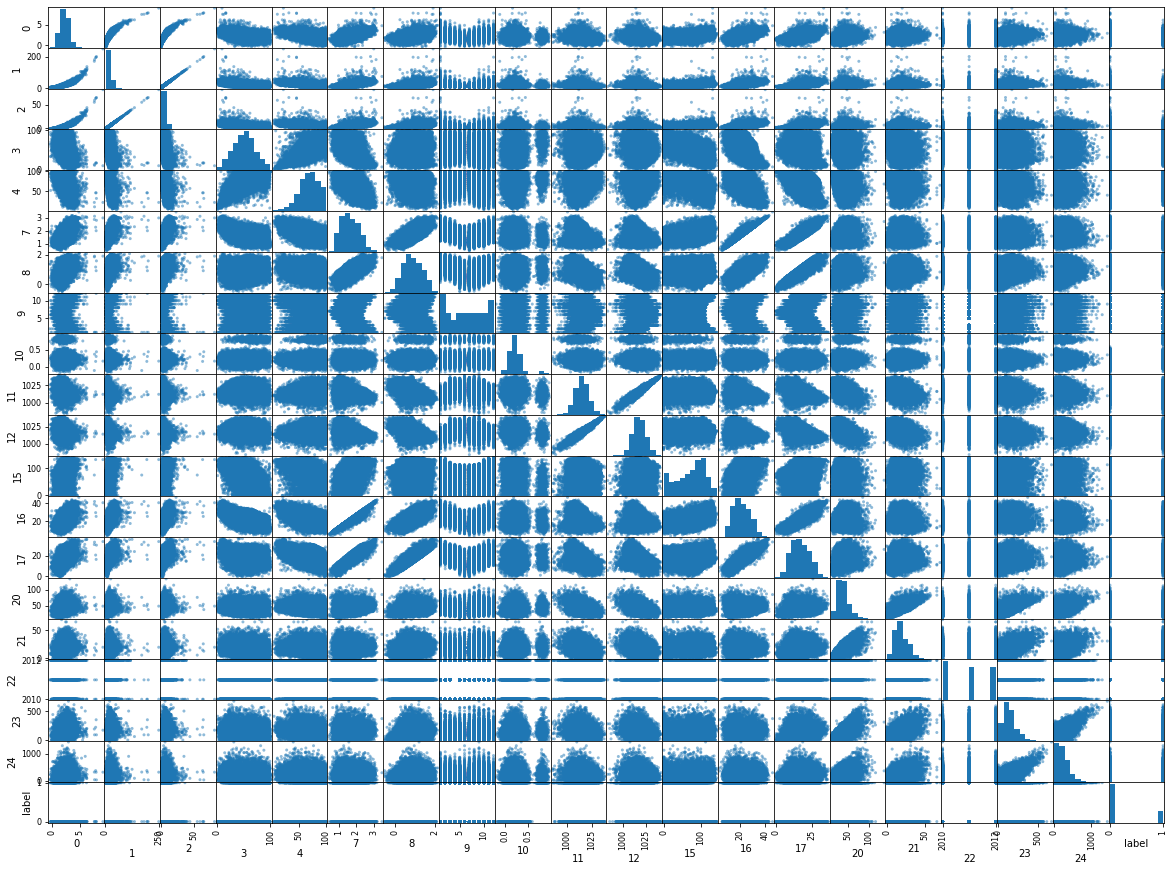

In [13]:
scatter_matrix(df, figsize=(20, 15))
plt.show()

In [14]:
# Display info and count the types of features we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22161 non-null  float64
 1   1       22161 non-null  float64
 2   2       22161 non-null  float64
 3   3       22102 non-null  float64
 4   4       22057 non-null  float64
 5   5       20812 non-null  object 
 6   6       22161 non-null  object 
 7   7       22154 non-null  float64
 8   8       22143 non-null  float64
 9   9       22161 non-null  int64  
 10  10      22161 non-null  float64
 11  11      22055 non-null  float64
 12  12      22048 non-null  float64
 13  13      22161 non-null  object 
 14  14      22161 non-null  object 
 15  15      20290 non-null  float64
 16  16      22133 non-null  float64
 17  17      22109 non-null  float64
 18  18      21951 non-null  object 
 19  19      21141 non-null  object 
 20  20      20816 non-null  float64
 21  21      22062 non-null  float64
 22

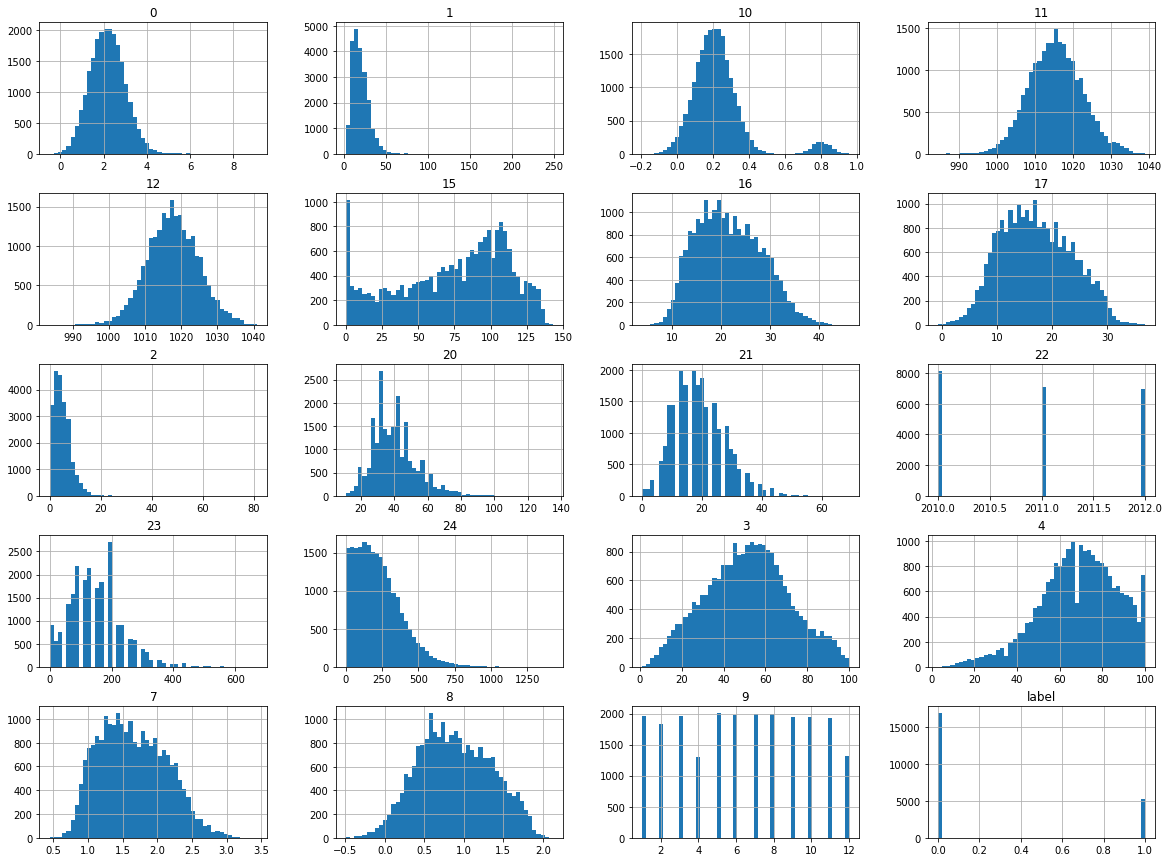

In [15]:
df.hist(figsize=(20, 15), bins=50)
plt.show()

<h2>1.1. Individual Feature Exploration</h2><br/>
Let's have a look at the features seperately, and examine each one of them.<br/><br/>
As we can see from the above analysis:<br/>
<ul><li>Feature '9' looks categorical. We will change it to be categorical instead of numeric.</li>
    <li>Feature '14' is numeric with "mm" at the end of each of the column's values (probably rainfall amount). Let's remove it.</li>
    <li>Feature '22' looks categorical. We will change it to be categorical instead of numeric.</li>
</ul>
We'll apply the changes to the train and the test set.

* **Train set update**

In [16]:
df['9'] = df['9'].astype('O')
df['14'] = df['14'].apply(lambda x: str(x).replace('mm','')).astype('float64') # remove 'mm' and change dtype to float64
df['22'] = df['22'].astype('O')
df.head(3)

0          1    2     3      4  5    6         7         8   9  \
0  1.170981   5.672133  0.6  80.0   76.0  D  a21  1.107143  0.692857   5   
1  2.595788  23.203289  6.4  43.0   64.0  N   a9  1.700000  0.614286  11   
2  0.972794   7.127348  0.4  63.0  100.0  C   a4  1.242857  0.428571   6   

         10      11      12 13   14    15    16    17 18   19    20    21  \
0  0.702957  1024.1  1025.9  0  0.6  32.0  13.9  12.2  D    D  28.0   7.0   
1  0.223911  1005.3  1008.1  0  0.0  50.0  18.6  16.5  N    I  61.0  43.0   
2  0.180848  1020.8  1026.5  0  0.0   NaN  16.5   9.6  M  NaN  15.0   7.0   

     22     23          24  label  
0  2011   40.0   15.420787      1  
1  2012  110.0  240.496883      0  
2  2012    0.0  224.282903      0

* **Test set update**

In [17]:
df_test['9'] = df_test['9'].astype('O')
df_test['14'] = df_test['14'].apply(lambda x: str(x).replace('mm','')).astype('float64') # remove 'mm' and change dtype to float64
df_test['22'] = df_test['22'].astype('O')
df_test.head(3)

0          1    2     3     4  5    6         7         8  9  \
0  1.534361  12.002415  2.6  67.0  97.0  F  a11  1.600000  0.650000  3   
1  1.632953  14.821694  3.6  72.0  78.0  M  a18  1.942857  1.328571  4   
2  2.330694  21.399766  5.4  64.0  53.0  A  a20  1.864286  0.992857  8   

         10      11      12 13   14     15    16    17 18 19    20    21  \
0  0.212177  1022.1  1026.2  0  0.2  105.0  21.5  12.2  F  H  52.0  33.0   
1  0.126069  1013.2  1016.3  0  0.2   34.0  25.0  24.3  P  D  24.0  11.0   
2  0.263743  1017.2  1020.7  0  0.0  102.0  23.7  22.8  C  O  39.0  31.0   

     22    23          24  
0  2012  70.0  354.720533  
1  2012  40.0  120.529466  
2  2011  70.0  294.533370

<br/><ul><li><b>Now we'll define a function for the desired feature exploration:</b></li></ul>

In [18]:
# define a function for feature exploration
def explore_feature(feature):
    print('Feature: %s' % (feature))
    print('------------------------')
    print(df[feature].describe())
    print('Total nulls: %s' %(df[feature].isna().sum()))
    
    # determine the feature's type:
    if df[feature].dtype == 'float64' or df[feature].dtype == 'int64': 
        type = 0                               # 0 for numeric features
    else:
        type = 1                               # 1 for categorical/binary features
    
    if feature == 'label': # label column is handled differently
        fig = plt.subplots(figsize=(17,3))
        sns.countplot(df[feature],palette="Blues_d")
        plt.show()
    else:
        
        if type == 0:                           # numeric feature
            fig, ax = plt.subplots(1,2,figsize=(17,5))
            sns.distplot(df[feature].dropna(), ax=ax[0]) # dsitribution
            sns.boxplot(x = df[feature].dropna(), data=df, ax=ax[1], orient='v') # boxplot
            plt.show()
            
            fig, ax = plt.subplots(1,3,figsize=(17,3))
            # distribution for the frequencies of label '0' and '1'
            sns.distplot(df[feature][df['label'] == 0].dropna(), color='r', kde_kws={"label": "label 0"}, ax=ax[0])
            sns.distplot(df[feature][df['label'] == 1].dropna(), color='g', kde_kws={"label": "label 1"}, ax=ax[1])
            sns.kdeplot(df[feature][df['label'] == 0].dropna(),  color='r', label = 'label 0', ax=ax[2], shade=True)  
            sns.kdeplot(df[feature][df['label'] == 1].dropna(), color='g', label = 'label 1', ax=ax[2], shade=True)
            plt.show()
        elif type == 1:                         # categorical/binary feature
            if feature=='6': # feature 6 has many categories so we handle it seperately
                fig, ax = plt.subplots(2,1,figsize=(17,8))
            else:
                fig, ax = plt.subplots(1,2,figsize=(17,3))
            order_by_categories = df[feature].value_counts().index.sort_values()
            sns.countplot(df[feature], order=order_by_categories, ax=ax[0]) # count the categories
            sns.countplot(x = feature, order=order_by_categories, hue = 'label', data = df, ax=ax[1]) # count the frequencies of label '0' and '1'
            plt.show()

Feature: 0
------------------------
count    22161.000000
mean         2.185958
std          0.815080
min         -0.490607
25%          1.622068
50%          2.167701
75%          2.720341
max          9.092011
Name: 0, dtype: float64
Total nulls: 0


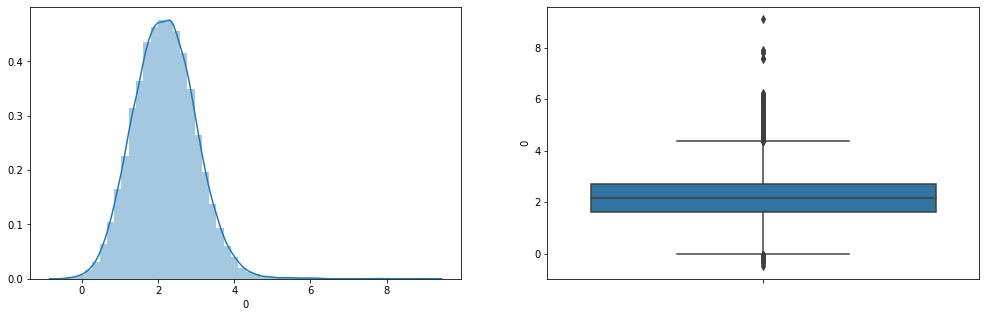

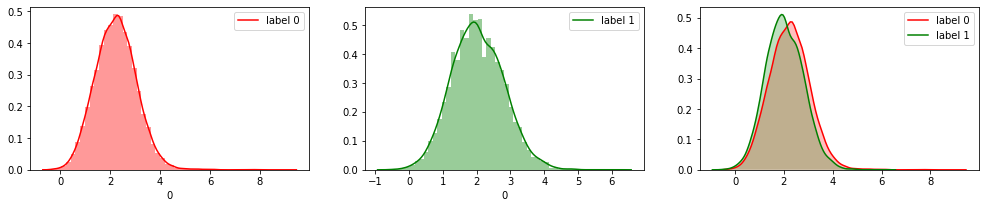

Feature: 1
------------------------
count    22161.000000
mean        19.797754
std         10.763614
min          2.437300
25%         12.268371
50%         17.833216
75%         25.196446
max        248.877854
Name: 1, dtype: float64
Total nulls: 0


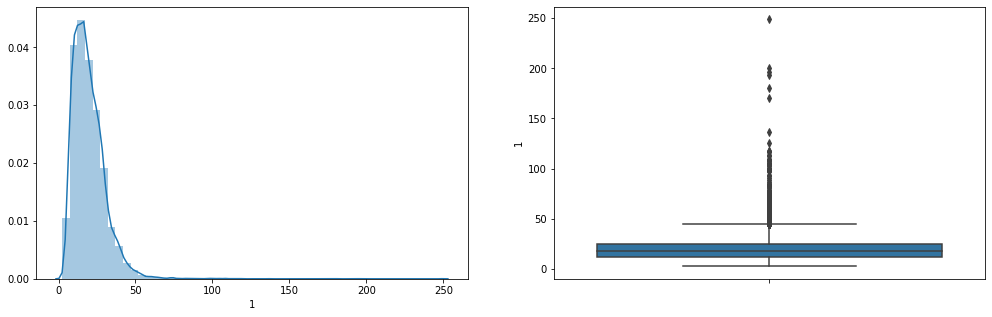

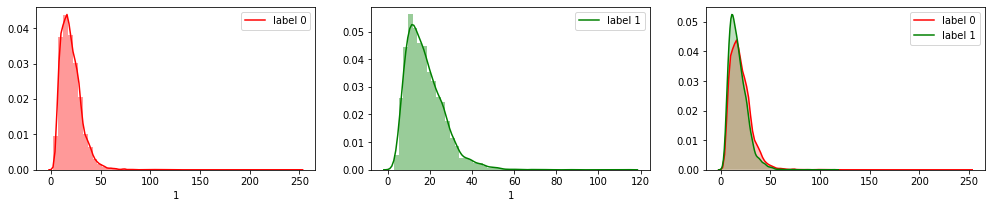

Feature: 2
------------------------
count    22161.000000
mean         4.929620
std          3.572644
min          0.000000
25%          2.400000
50%          4.200000
75%          6.600000
max         81.200000
Name: 2, dtype: float64
Total nulls: 0


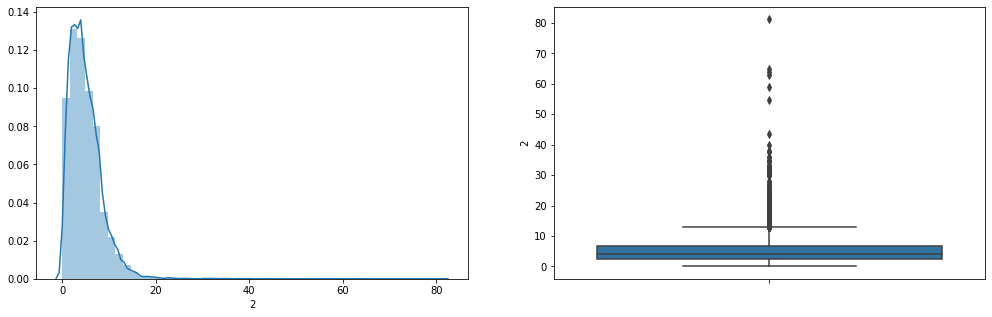

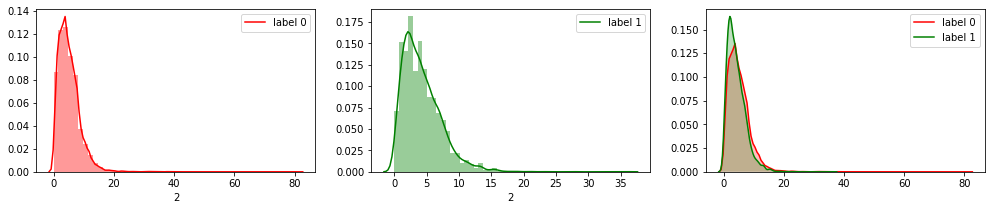

Feature: 3
------------------------
count    22102.000000
mean        51.547009
std         20.184353
min          1.000000
25%         37.000000
50%         52.000000
75%         65.000000
max        100.000000
Name: 3, dtype: float64
Total nulls: 59


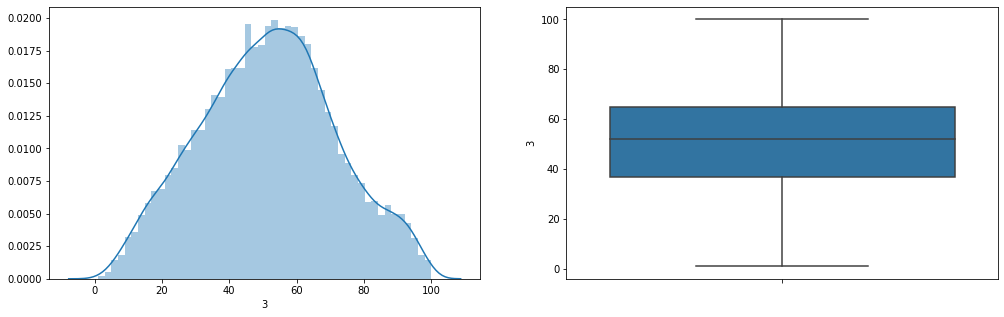

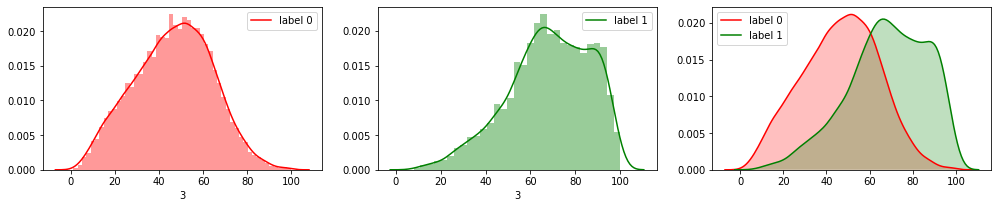

Feature: 4
------------------------
count    22057.000000
mean        68.497982
std         18.231315
min          3.000000
25%         57.000000
50%         69.000000
75%         82.000000
max        100.000000
Name: 4, dtype: float64
Total nulls: 104


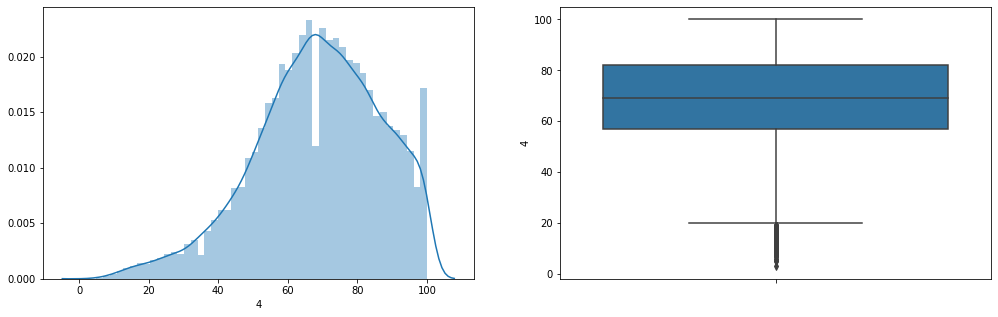

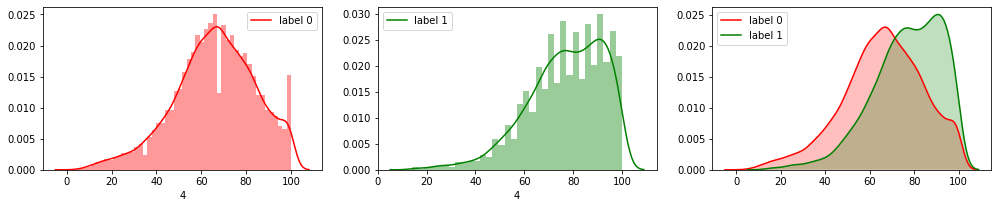

Feature: 5
------------------------
count     20812
unique       16
top           D
freq       1604
Name: 5, dtype: object
Total nulls: 1349


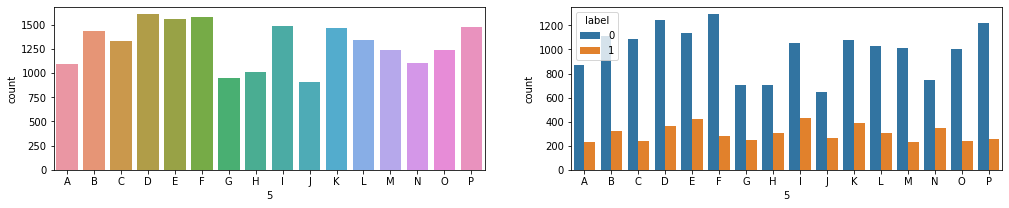

Feature: 6
------------------------
count     22161
unique       31
top          a6
freq        786
Name: 6, dtype: object
Total nulls: 0


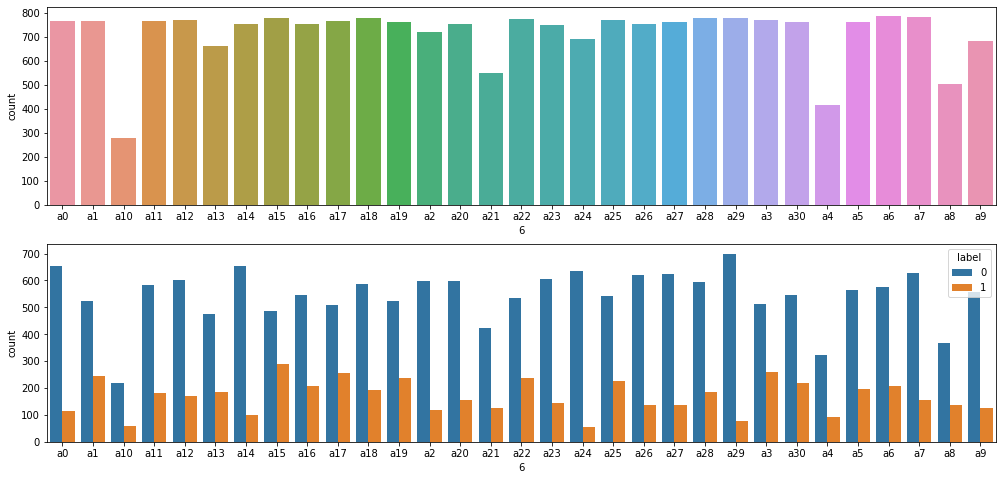

Feature: 7
------------------------
count    22154.000000
mean         1.648476
std          0.480275
min          0.450000
25%          1.271429
50%          1.607143
75%          2.007143
max          3.435714
Name: 7, dtype: float64
Total nulls: 7


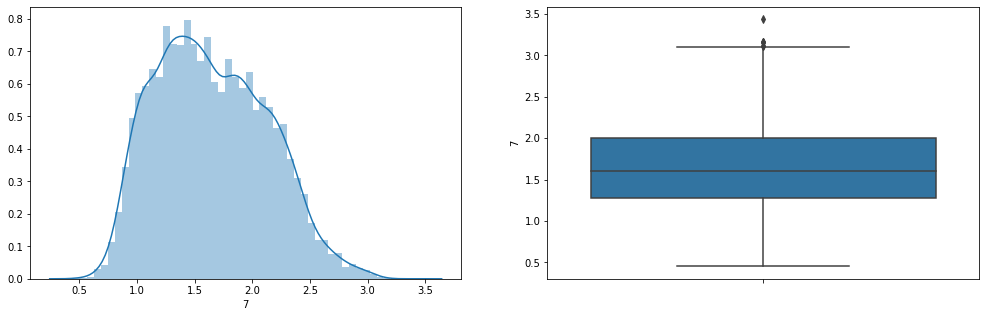

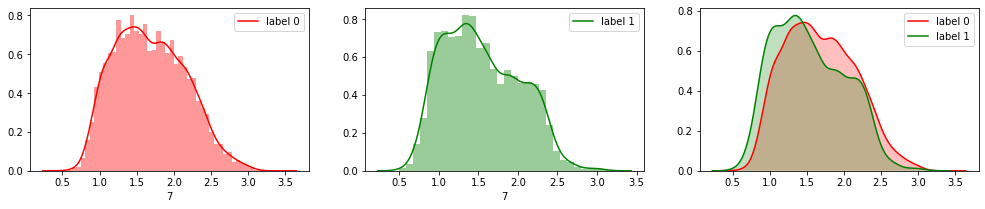

Feature: 8
------------------------
count    22143.000000
mean         0.888041
std          0.461375
min         -0.492857
25%          0.542857
50%          0.864286
75%          1.242857
max          2.128571
Name: 8, dtype: float64
Total nulls: 18


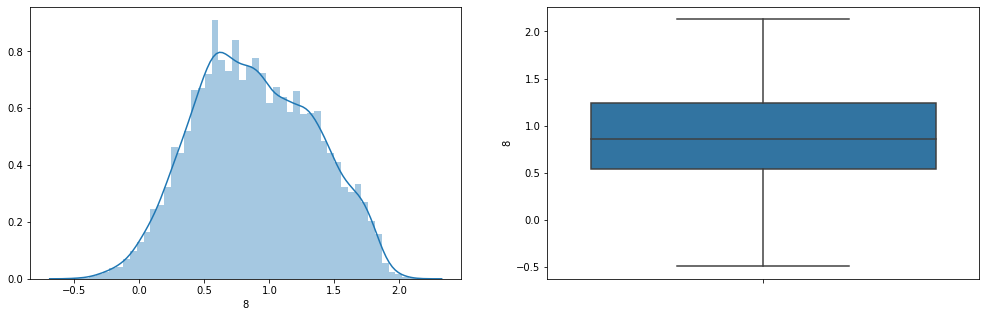

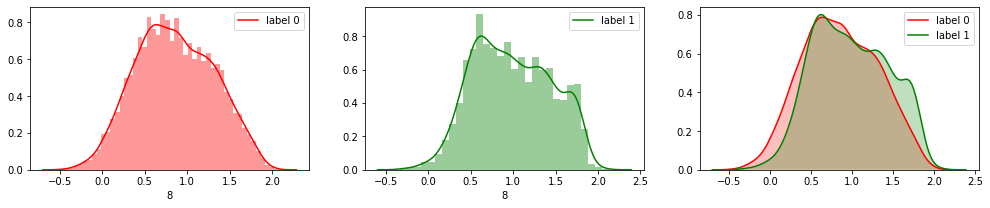

Feature: 9
------------------------
count     22161
unique       12
top           5
freq       2016
Name: 9, dtype: int64
Total nulls: 0


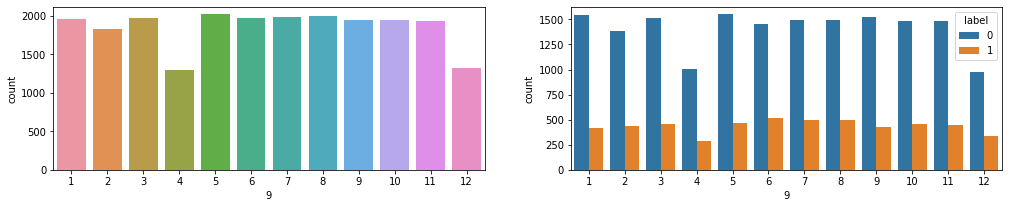

Feature: 10
------------------------
count    22161.000000
mean         0.228284
std          0.161565
min         -0.195661
25%          0.136002
50%          0.206457
75%          0.278929
max          0.954076
Name: 10, dtype: float64
Total nulls: 0


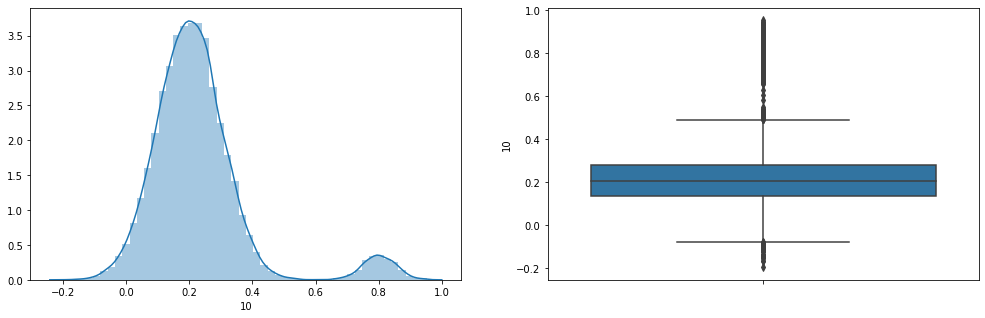

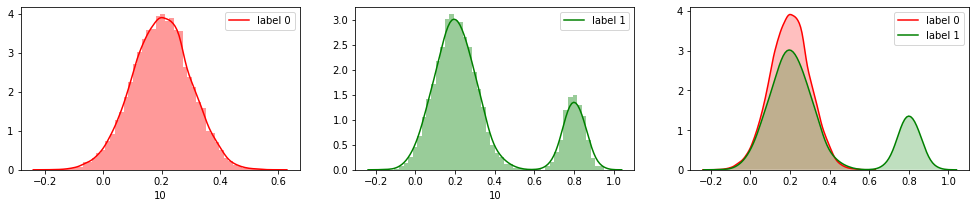

Feature: 11
------------------------
count    22055.000000
mean      1015.347014
std          7.011856
min        984.500000
25%       1010.600000
50%       1015.300000
75%       1020.000000
max       1038.900000
Name: 11, dtype: float64
Total nulls: 106


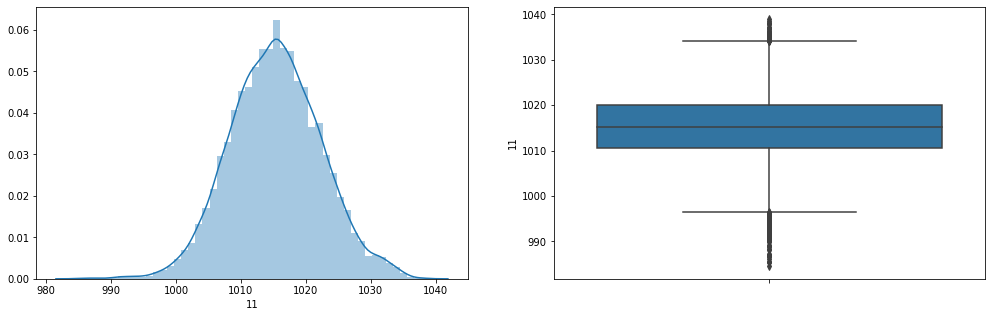

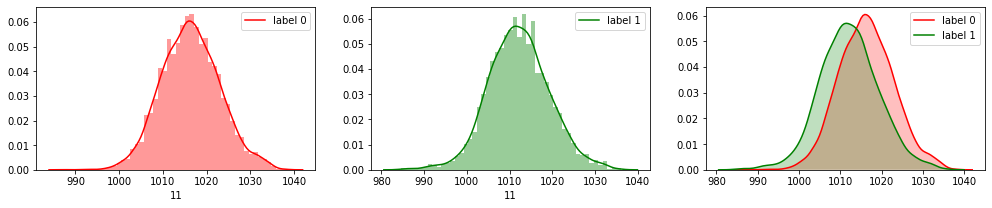

Feature: 12
------------------------
count    22048.000000
mean      1017.708572
std          7.085807
min        983.700000
25%       1013.000000
50%       1017.700000
75%       1022.400000
max       1040.900000
Name: 12, dtype: float64
Total nulls: 113


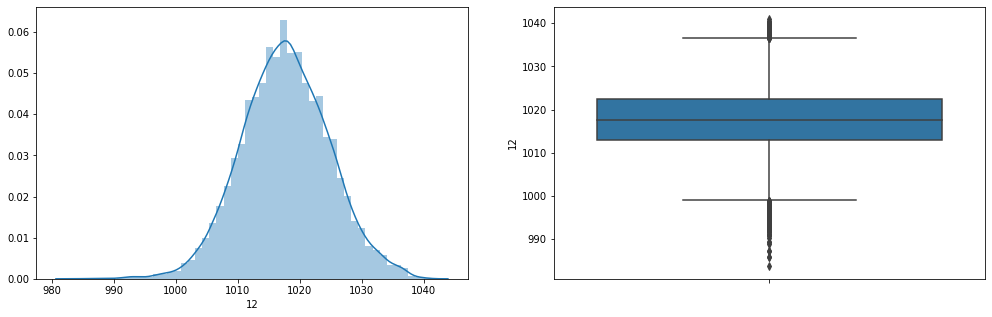

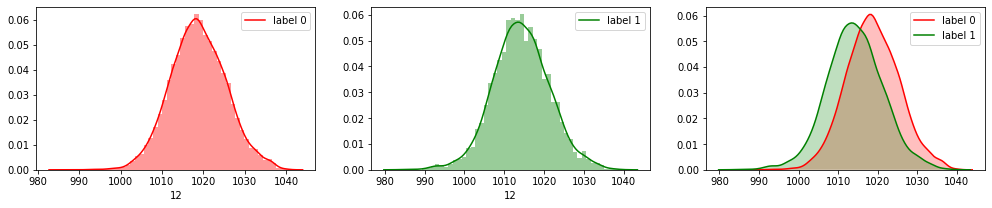

Feature: 13
------------------------
count     22161
unique        3
top           0
freq      16906
Name: 13, dtype: object
Total nulls: 0


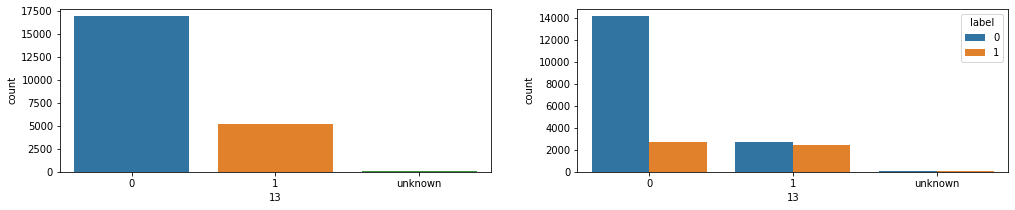

Feature: 14
------------------------
count    22080.000000
mean         2.289923
std          7.145425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        183.000000
Name: 14, dtype: float64
Total nulls: 81


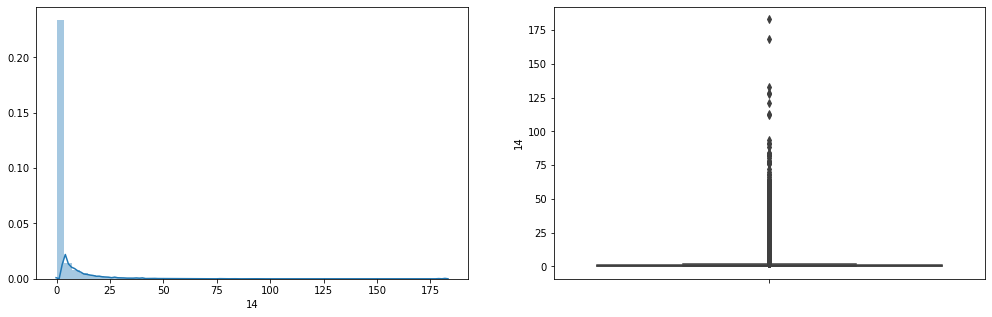

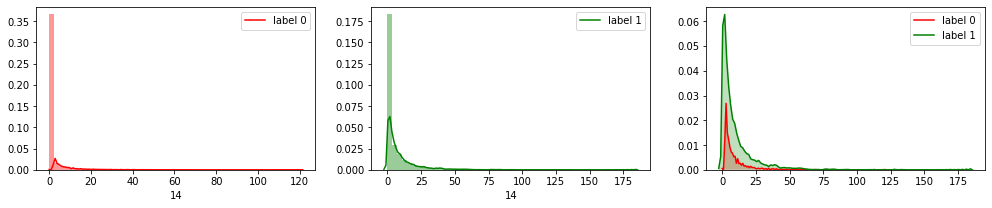

Feature: 15
------------------------
count    20290.000000
mean        73.685017
std         37.866780
min          0.000000
25%         45.000000
50%         82.000000
75%        104.000000
max        143.000000
Name: 15, dtype: float64
Total nulls: 1871


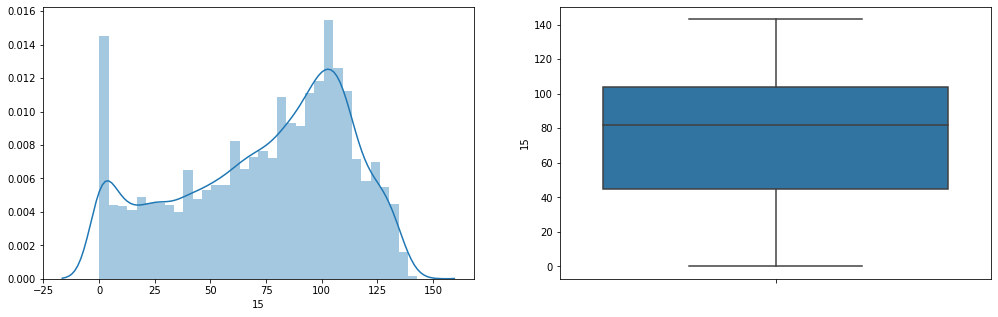

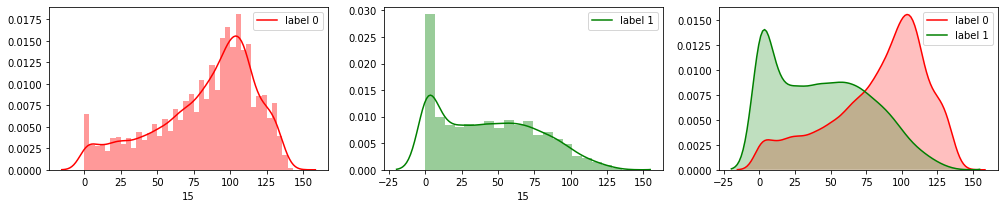

Feature: 16
------------------------
count    22133.000000
mean        21.617133
std          6.602743
min          3.900000
25%         16.500000
50%         21.000000
75%         26.400000
max         46.100000
Name: 16, dtype: float64
Total nulls: 28


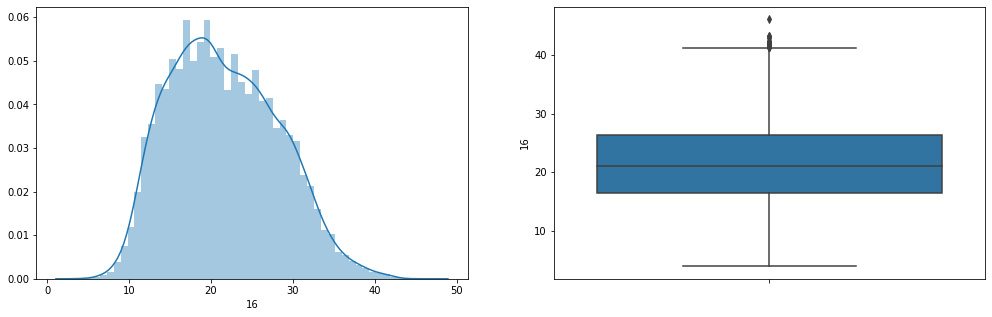

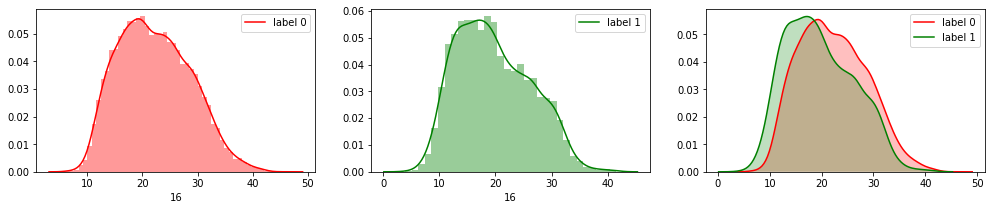

Feature: 17
------------------------
count    22109.000000
mean        17.065837
std          6.409174
min         -0.700000
25%         12.100000
50%         16.600000
75%         21.800000
max         36.900000
Name: 17, dtype: float64
Total nulls: 52


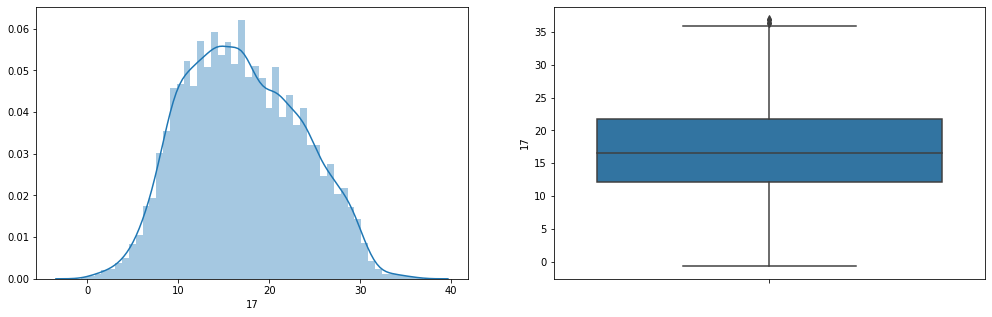

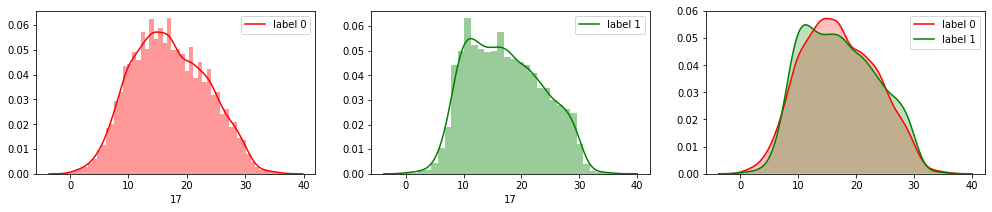

Feature: 18
------------------------
count     21951
unique       16
top           D
freq       1659
Name: 18, dtype: object
Total nulls: 210


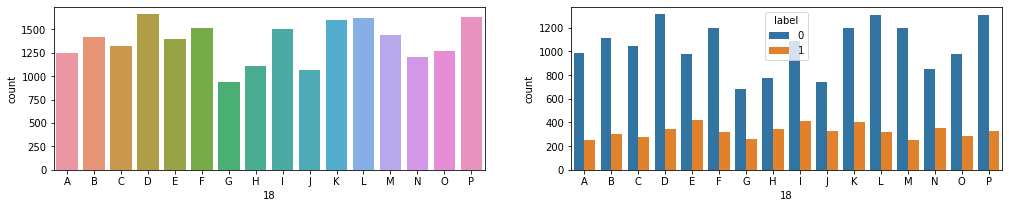

Feature: 19
------------------------
count     21141
unique       16
top           E
freq       1861
Name: 19, dtype: object
Total nulls: 1020


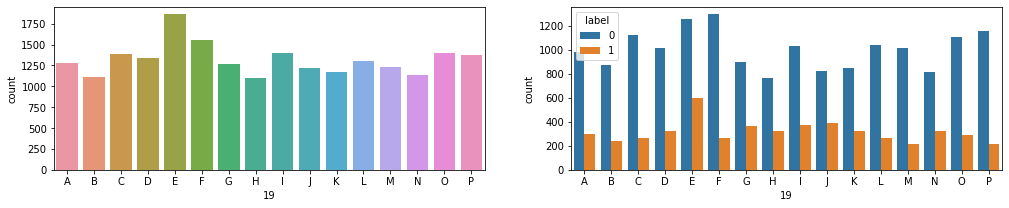

Feature: 20
------------------------
count    20816.000000
mean        39.995484
std         13.150807
min         11.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        135.000000
Name: 20, dtype: float64
Total nulls: 1345


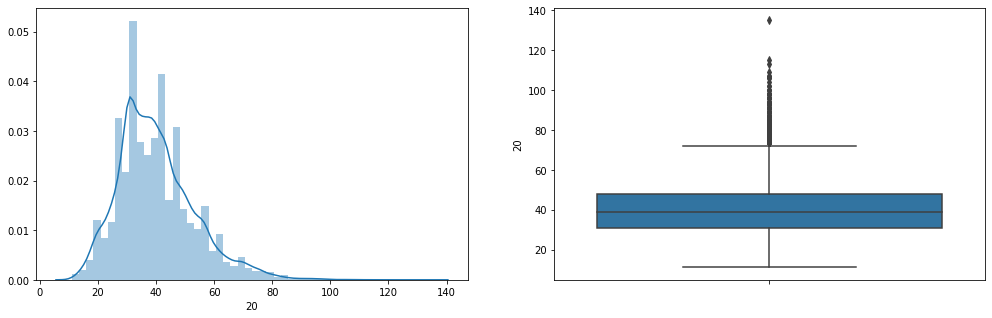

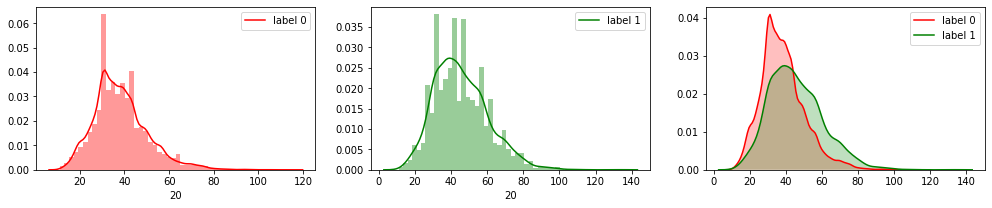

Feature: 21
------------------------
count    22062.000000
mean        19.101577
std          8.546933
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         69.000000
Name: 21, dtype: float64
Total nulls: 99


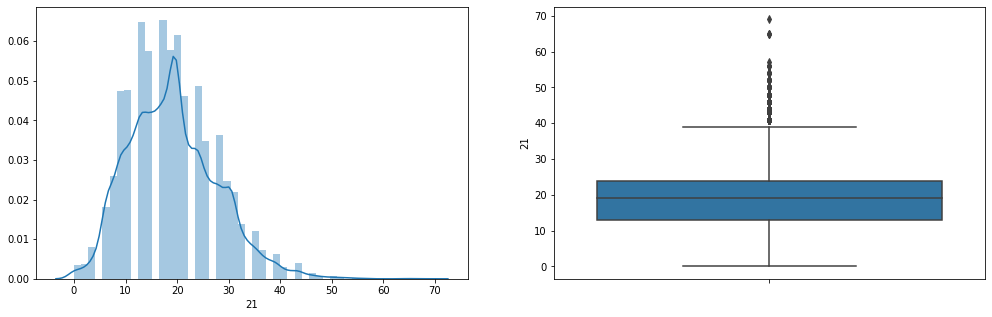

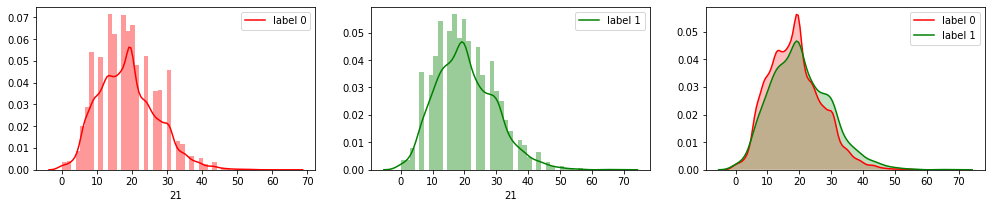

Feature: 22
------------------------
count     22161
unique        3
top        2010
freq       8158
Name: 22, dtype: int64
Total nulls: 0


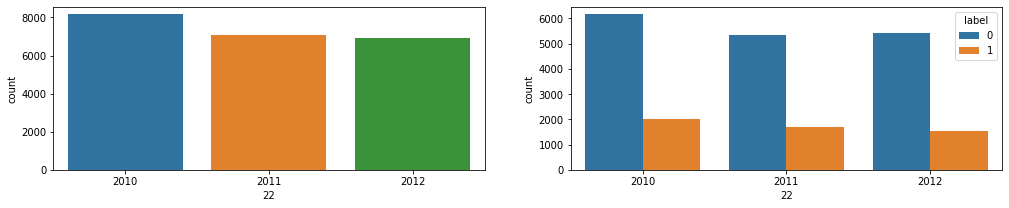

Feature: 23
------------------------
count    22061.000000
mean       146.971579
std         86.609704
min          0.000000
25%         90.000000
50%        130.000000
75%        200.000000
max        670.000000
Name: 23, dtype: float64
Total nulls: 100


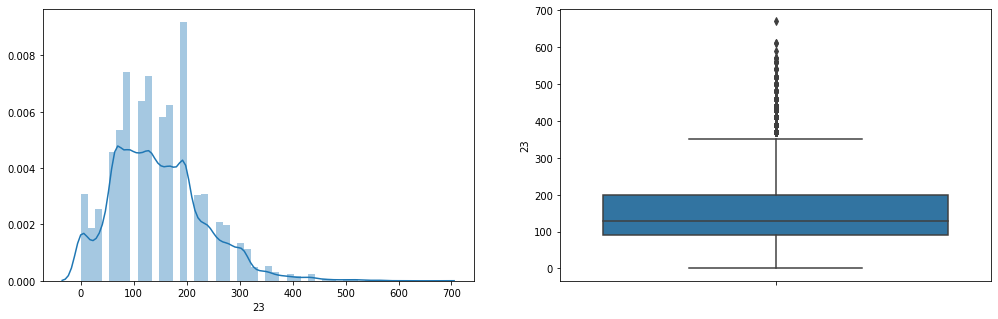

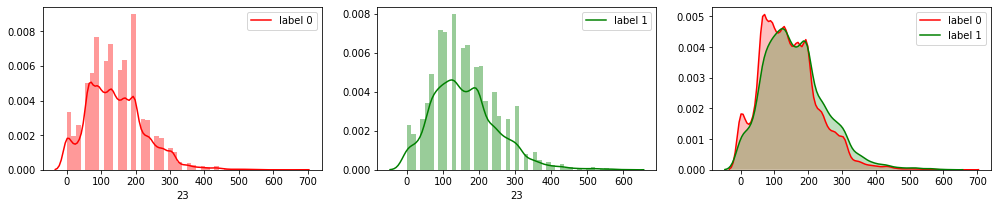

Feature: 24
------------------------
count    22061.000000
mean       224.835441
std        160.801099
min          0.001355
25%        100.144819
50%        199.866581
75%        316.118054
max       1426.459838
Name: 24, dtype: float64
Total nulls: 100


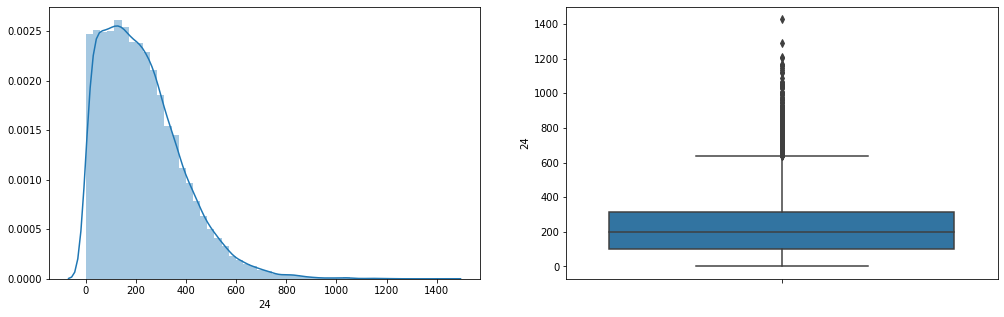

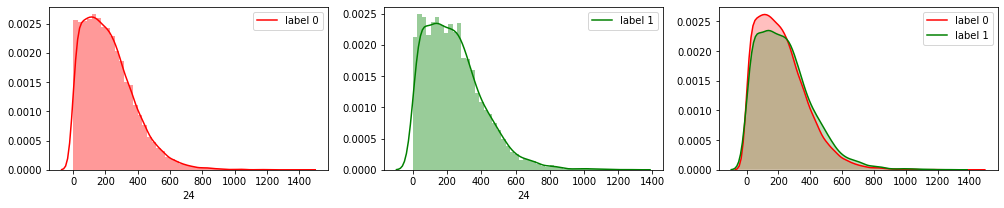

Feature: label
------------------------
count    22161.000000
mean         0.236451
std          0.424912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64
Total nulls: 0


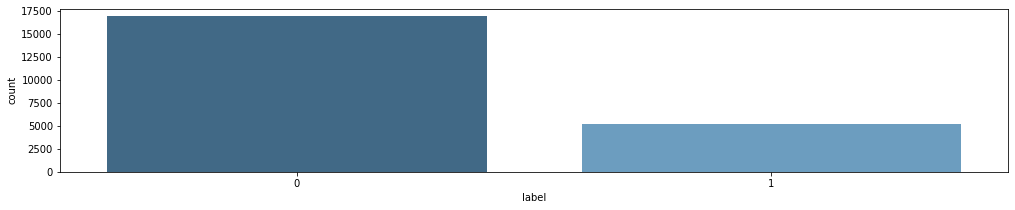

In [19]:
# Explore features in ascending order
for feature in df.columns:
    explore_feature(feature)

<h3>Heatmap of correlations</h3>

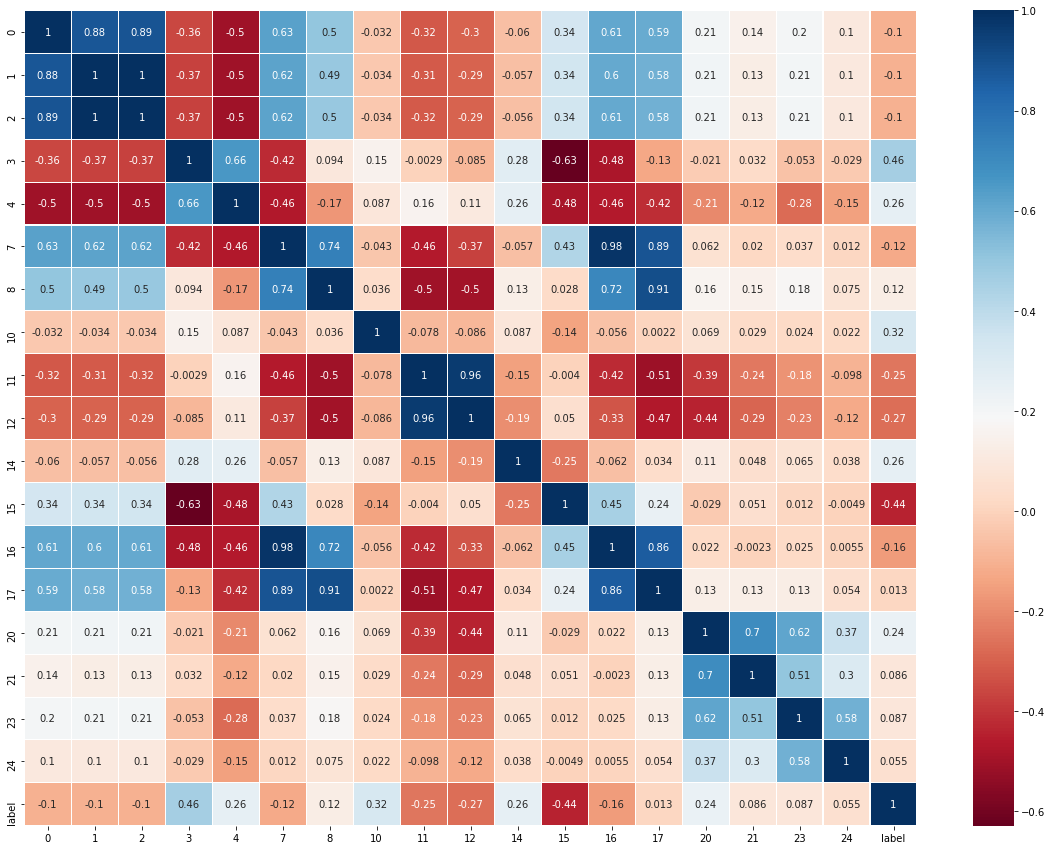

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),
           annot=True, linecolor='white', linewidth='0.05', cmap="RdBu")
plt.show()

<h3>Heatmap of Nans (not a number values)</h3>

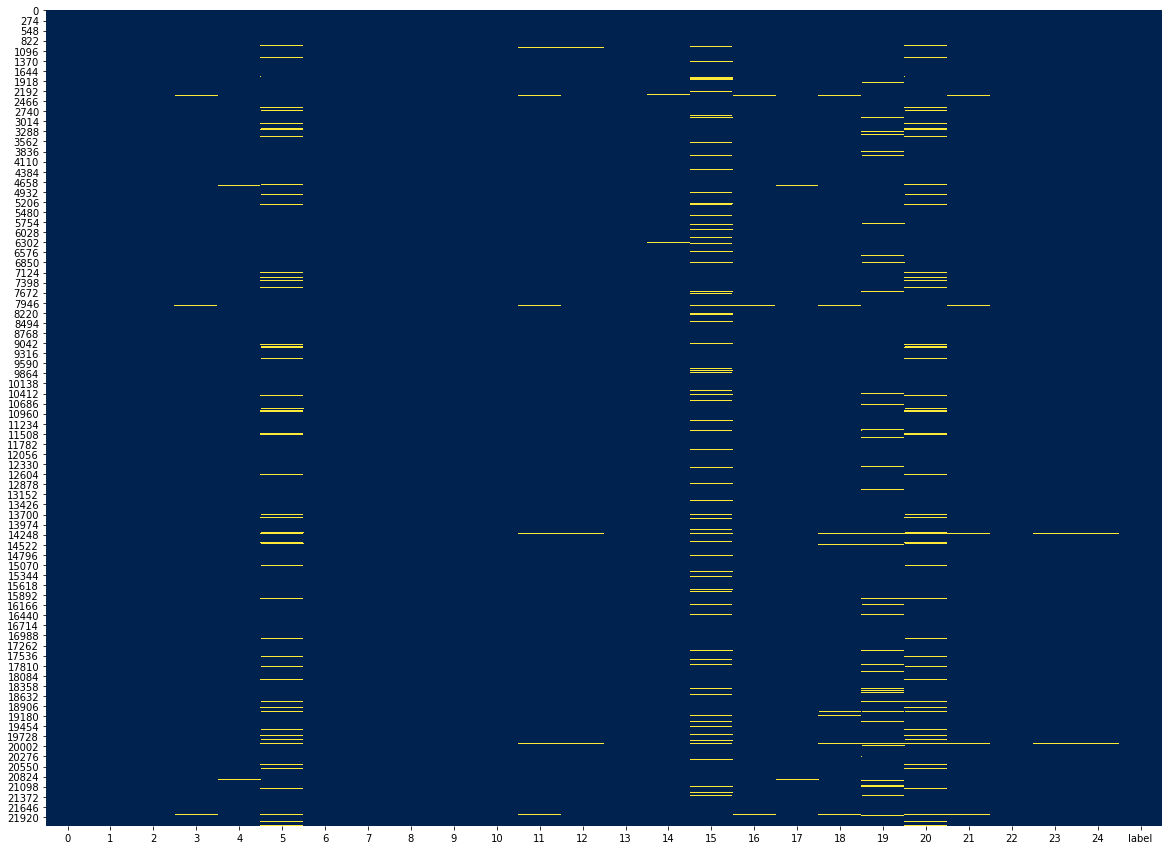

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False, cmap="cividis")
plt.show()

<h3>Total Nans by features</h3>

In [22]:
table = nan_table(df)
table

0  1  2   3    4     5  6  7   8  9  10   11   12  13  14    15  16  17  \
0  0  0  0  59  104  1349  0  7  18  0   0  106  113   0  81  1871  28  52   

    18    19    20  21  22   23   24  label  
0  210  1020  1345  99   0  100  100      0

<hr>

<br/><br/><br/>

<h1>2. Preprocessing</h1><h2>2.1. Handling Missing Values</h2>

Before continuing with the preprocessing, at first we need to decide what to do with the features that have missing values.<br/>For that matter, Features 5,6,9,13,18,19,22 are categorical, so let's handle them first.<br/>
<b>NOTE:</b> The changes made to the train set will also take place on the test set.

<h2>Categorical/Binaric Features</h2>

<h3><ul><li>Feature 5</li></ul></h3>

In [23]:
df['5'].value_counts(dropna=False)

D      1604
F      1575
E      1558
I      1485
P      1475
K      1469
B      1432
NaN    1349
L      1337
C      1330
O      1241
M      1239
N      1098
A      1097
H      1010
G       952
J       910
Name: 5, dtype: int64

<b>We can see that 1349 values are NaN, so it may be important to keep them as a category:</b>

In [24]:
df['5'].fillna('Other', inplace=True)
df['5'].value_counts(dropna=False)

D        1604
F        1575
E        1558
I        1485
P        1475
K        1469
B        1432
Other    1349
L        1337
C        1330
O        1241
M        1239
N        1098
A        1097
H        1010
G         952
J         910
Name: 5, dtype: int64

<b>In the data exploration we've noticed that features 5,18,19 have the same categories.</b><br/>
<b>After examination we have seen that we're getting better results when we drop this feature.</b><br/>
<b>We've kept here our try to concatinate the one-hot encoded feature.</b>

$\rightarrow$ **Update train set:**

In [25]:
feature_5_dummies = pd.get_dummies(df['5'])[df['5'].value_counts(dropna=False).index]
feature_5_dummies.head(3)

D  F  E  I  P  K  B  Other  L  C  O  M  N  A  H  G  J
0  1  0  0  0  0  0  0      0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  0  0      0  0  0  0  0  1  0  0  0  0
2  0  0  0  0  0  0  0      0  0  1  0  0  0  0  0  0  0

In [26]:
df.drop(['5'], axis=1, inplace=True)
#df = pd.concat([df,feature_5_dummies], axis=1)
#df.head(3)

In [27]:
df.shape

(22161, 25)

$\rightarrow$ **Update test set:**

In [28]:
df_test['5'].fillna('Other', inplace=True)
test_feature_5_dummies = pd.get_dummies(df_test['5'])[df_test['5'].value_counts(dropna=False).index]
test_feature_5_dummies.head(3)

F  D  E  B  P  L  I  K  O  C  M  Other  N  A  G  J  H
0  1  0  0  0  0  0  0  0  0  0  0      0  0  0  0  0  0
1  0  0  0  0  0  0  0  0  0  0  1      0  0  0  0  0  0
2  0  0  0  0  0  0  0  0  0  0  0      0  0  1  0  0  0

In [29]:
df_test.drop(['5'], axis=1, inplace=True) 
#df_test = pd.concat([df_test,test_feature_5_dummies], axis=1)
#df_test.head()

In [30]:
df_test.shape

(7387, 24)

<hr>
<h3><ul><li>Feature 6</ul></li></h3>

In [31]:
df['6'].value_counts(dropna=False)

a6     786
a7     785
a18    780
a28    779
a29    779
a15    778
a22    773
a12    771
a25    770
a3     769
a0     768
a1     768
a11    767
a17    766
a5     764
a27    762
a19    762
a30    762
a26    756
a20    755
a16    753
a14    753
a23    750
a2     719
a24    691
a9     684
a13    661
a21    550
a8     503
a4     417
a10    280
Name: 6, dtype: int64

**We can see that most of the values are the same, and there are no nulls here.<br/>So let's not change anything and try to one-hot encoding this feature:**

$\rightarrow$ **Update train set:**

In [32]:
feature_6_dummies = pd.get_dummies(df['6'])
feature_6_dummies.head(3)

a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    1   
1   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0  
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   1  
2    0    0    0    0    0    0    0    0   0    0   1   0   0   0   0   0

In [33]:
df.drop(['6'], axis=1, inplace=True)
df = pd.concat([df,feature_6_dummies], axis=1)
df.head(3)

0          1    2     3      4         7         8   9        10  \
0  1.170981   5.672133  0.6  80.0   76.0  1.107143  0.692857   5  0.702957   
1  2.595788  23.203289  6.4  43.0   64.0  1.700000  0.614286  11  0.223911   
2  0.972794   7.127348  0.4  63.0  100.0  1.242857  0.428571   6  0.180848   

       11      12 13   14    15    16    17 18   19    20    21    22     23  \
0  1024.1  1025.9  0  0.6  32.0  13.9  12.2  D    D  28.0   7.0  2011   40.0   
1  1005.3  1008.1  0  0.0  50.0  18.6  16.5  N    I  61.0  43.0  2012  110.0   
2  1020.8  1026.5  0  0.0   NaN  16.5   9.6  M  NaN  15.0   7.0  2012    0.0   

           24  label  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  \
0   15.420787      1   0   0    0    0    0    0    0    0    0    0    0   
1  240.496883      0   0   0    0    0    0    0    0    0    0    0    0   
2  224.282903      0   0   0    0    0    0    0    0    0    0    0    0   

   a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  \
0    0   0    0    1    0    0    0    0    0    0    0    0   0    0   0   0   
1    0   0    0    0    0    0    0    0    0    0    0    0   0    0   0   0   
2    0   0    0    0    0    0    0    0    0    0    0    0   0    0   1   0   

   a6  a7  a8  a9  
0   0   0   0   0  
1   0   0   0   1  
2   0   0   0   0

In [34]:
df.shape

(22161, 55)

$\rightarrow$ **Update test set:**

In [35]:
test_feature_6_dummies = pd.get_dummies(df_test['6'])
test_feature_6_dummies.head(3)

a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    1    0    0    0    0    0    0    0    0   0    0    0   
1   0   0    0    0    0    0    0    0    0    0    1    0   0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0   0    1    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0  
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0  
2    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0

In [36]:
df_test.drop(['6'], axis=1, inplace=True)
df_test = pd.concat([df_test,test_feature_6_dummies], axis=1)
df_test.head(3)

0          1    2     3     4         7         8  9        10  \
0  1.534361  12.002415  2.6  67.0  97.0  1.600000  0.650000  3  0.212177   
1  1.632953  14.821694  3.6  72.0  78.0  1.942857  1.328571  4  0.126069   
2  2.330694  21.399766  5.4  64.0  53.0  1.864286  0.992857  8  0.263743   

       11      12 13   14     15    16    17 18 19    20    21    22    23  \
0  1022.1  1026.2  0  0.2  105.0  21.5  12.2  F  H  52.0  33.0  2012  70.0   
1  1013.2  1016.3  0  0.2   34.0  25.0  24.3  P  D  24.0  11.0  2012  40.0   
2  1017.2  1020.7  0  0.0  102.0  23.7  22.8  C  O  39.0  31.0  2011  70.0   

           24  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  \
0  354.720533   0   0    0    1    0    0    0    0    0    0    0    0   0   
1  120.529466   0   0    0    0    0    0    0    0    0    0    1    0   0   
2  294.533370   0   0    0    0    0    0    0    0    0    0    0    0   0   

   a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  \
0    0    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   
1    0    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   
2    1    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   

   a8  a9  
0   0   0  
1   0   0  
2   0   0

In [37]:
df_test.shape

(7387, 54)

<hr>
<h3><ul><li>Feature 9</li></ul></h3>

In [38]:
df['9'].value_counts(dropna=False)

5     2016
8     1992
7     1987
6     1974
3     1966
1     1963
9     1949
10    1943
11    1932
2     1828
12    1316
4     1295
Name: 9, dtype: int64

**It seems that the count of each category in this feature is almost the same.<br/>
At first, we've tried to apply one-hot encoding on the whole feature.<br/> Then we've seen that taking only the top 5 of the most frequent categories gave us better results, so we'll use here one-hot encoding also and take only the top 5 frequent categories:**

$\rightarrow$ **Update train set:**

In [39]:
masking = df['9'].value_counts(dropna=False)[:5].index
feature_9_dummies = pd.get_dummies(df['9'])[masking]
feature_9_dummies = feature_9_dummies.add_prefix('feature_9_')
feature_9_dummies.head(3)

feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3
0            1            0            0            0            0
1            0            0            0            0            0
2            0            0            0            1            0

In [40]:
df.drop(['9'], axis=1, inplace=True)
df = pd.concat([df,feature_9_dummies], axis=1)
df.head(3)

0          1    2     3      4         7         8        10  \
0  1.170981   5.672133  0.6  80.0   76.0  1.107143  0.692857  0.702957   
1  2.595788  23.203289  6.4  43.0   64.0  1.700000  0.614286  0.223911   
2  0.972794   7.127348  0.4  63.0  100.0  1.242857  0.428571  0.180848   

       11      12 13   14    15    16    17 18   19    20    21    22     23  \
0  1024.1  1025.9  0  0.6  32.0  13.9  12.2  D    D  28.0   7.0  2011   40.0   
1  1005.3  1008.1  0  0.0  50.0  18.6  16.5  N    I  61.0  43.0  2012  110.0   
2  1020.8  1026.5  0  0.0   NaN  16.5   9.6  M  NaN  15.0   7.0  2012    0.0   

           24  label  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  \
0   15.420787      1   0   0    0    0    0    0    0    0    0    0    0   
1  240.496883      0   0   0    0    0    0    0    0    0    0    0    0   
2  224.282903      0   0   0    0    0    0    0    0    0    0    0    0   

   a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  \
0    0   0    0    1    0    0    0    0    0    0    0    0   0    0   0   0   
1    0   0    0    0    0    0    0    0    0    0    0    0   0    0   0   0   
2    0   0    0    0    0    0    0    0    0    0    0    0   0    0   1   0   

   a6  a7  a8  a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  \
0   0   0   0   0            1            0            0            0   
1   0   0   0   1            0            0            0            0   
2   0   0   0   0            0            0            0            1   

   feature_9_3  
0            0  
1            0  
2            0

In [41]:
df.shape

(22161, 59)

$\rightarrow$ **Update test set:**

In [42]:
test_feature_9_dummies = pd.get_dummies(df_test['9'])[masking]
test_feature_9_dummies = test_feature_9_dummies.add_prefix('feature_9_')
test_feature_9_dummies.head(3)

feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3
0            0            0            0            0            1
1            0            0            0            0            0
2            0            1            0            0            0

In [43]:
df_test.drop(['9'], axis=1, inplace=True)
df_test = pd.concat([df_test,test_feature_9_dummies], axis=1)

In [44]:
df_test.shape

(7387, 58)

<hr>
<h3><ul><li>Feature 13</ul></li></h3>

In [45]:
df['13'].value_counts(dropna=False)

0          16906
1           5174
unknown       81
Name: 13, dtype: int64

**We can see that we have a very small number of 'unkown' values. <br/>
We tried to use 3 methods:**
1. Replace the unknown values with '0'
2. Replace the unknown values with '1'
3. Replace the unknown values using the forward-fill method (last valid observation)

**Among all of the options we got our best results with replacing the unknown values with '0'.**

$\rightarrow$ **Update train set:**

In [46]:
df['13'].replace('unknown',np.nan, inplace=True)
df['13'].fillna(0, inplace=True)
df['13'] = df['13'].astype('int64')
df['13'].value_counts(dropna=False)
#df.drop(['13'], axis=1, inplace=True)

0    16987
1     5174
Name: 13, dtype: int64

$\rightarrow$ **Update test set:**

In [47]:
df_test['13'].replace('unknown',np.nan, inplace=True)
df_test['13'].fillna(0, inplace=True)
df_test['13'] = df_test['13'].astype('int64')
df_test['13'].value_counts(dropna=False)
#df_test.drop(['13'], axis=1, inplace=True)

0    5628
1    1759
Name: 13, dtype: int64

<hr>
<h3><ul><li>Feature 18</ul></li></h3>

In [48]:
df['18'].value_counts(dropna=False)

D      1659
P      1634
L      1626
K      1599
F      1517
I      1502
M      1444
B      1416
E      1399
C      1319
O      1266
A      1244
N      1206
H      1114
J      1068
G       938
NaN     210
Name: 18, dtype: int64

**We can see that there is a small number of NaN values. so, let's combine (G+Nan) to a column 'Other':**

$\rightarrow$ **Update train set:**

In [49]:
df['18'].fillna('Other', inplace=True)
df['18'].replace('G', 'Other', inplace=True)
df['18'].value_counts(dropna=False)

D        1659
P        1634
L        1626
K        1599
F        1517
I        1502
M        1444
B        1416
E        1399
C        1319
O        1266
A        1244
N        1206
Other    1148
H        1114
J        1068
Name: 18, dtype: int64

**Now use one-hot encoding:**

In [50]:
feature_18_dummies = pd.get_dummies(df['18'])[df['18'].value_counts(dropna=False).index]
feature_18_dummies = feature_18_dummies.add_prefix('feature_18_')
df.drop(['18'], axis=1, inplace=True)
df = pd.concat([df,feature_18_dummies], axis=1)
df.head(3)

0          1    2     3      4         7         8        10  \
0  1.170981   5.672133  0.6  80.0   76.0  1.107143  0.692857  0.702957   
1  2.595788  23.203289  6.4  43.0   64.0  1.700000  0.614286  0.223911   
2  0.972794   7.127348  0.4  63.0  100.0  1.242857  0.428571  0.180848   

       11      12  13   14    15    16    17   19    20    21    22     23  \
0  1024.1  1025.9   0  0.6  32.0  13.9  12.2    D  28.0   7.0  2011   40.0   
1  1005.3  1008.1   0  0.0  50.0  18.6  16.5    I  61.0  43.0  2012  110.0   
2  1020.8  1026.5   0  0.0   NaN  16.5   9.6  NaN  15.0   7.0  2012    0.0   

           24  label  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  \
0   15.420787      1   0   0    0    0    0    0    0    0    0    0    0   
1  240.496883      0   0   0    0    0    0    0    0    0    0    0    0   
2  224.282903      0   0   0    0    0    0    0    0    0    0    0    0   

   a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  \
0    0   0    0    1    0    0    0    0    0    0    0    0   0    0   0   0   
1    0   0    0    0    0    0    0    0    0    0    0    0   0    0   0   0   
2    0   0    0    0    0    0    0    0    0    0    0    0   0    0   1   0   

   a6  a7  a8  a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  \
0   0   0   0   0            1            0            0            0   
1   0   0   0   1            0            0            0            0   
2   0   0   0   0            0            0            0            1   

   feature_9_3  feature_18_D  feature_18_P  feature_18_L  feature_18_K  \
0            0             1             0             0             0   
1            0             0             0             0             0   
2            0             0             0             0             0   

   feature_18_F  feature_18_I  feature_18_M  feature_18_B  feature_18_E  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   

   feature_18_C  feature_18_O  feature_18_A  feature_18_N  feature_18_Other  \
0             0             0             0             0                 0   
1             0             0             0             1                 0   
2             0             0             0             0                 0   

   feature_18_H  feature_18_J  
0             0             0  
1             0             0  
2             0             0

In [51]:
df.shape

(22161, 74)

$\rightarrow$ **Update test set:**

In [52]:
df_test['18'].fillna('Other', inplace=True)
df_test['18'].replace('G', 'Other', inplace=True)
df_test['18'].value_counts(dropna=False)

L        564
P        553
D        551
K        546
I        520
F        512
M        499
B        484
C        476
E        452
O        444
N        401
Other    371
A        342
J        340
H        332
Name: 18, dtype: int64

In [53]:
test_feature_18_dummies = pd.get_dummies(df_test['18'])[df_test['18'].value_counts(dropna=False).index]
test_feature_18_dummies = test_feature_18_dummies.add_prefix('feature_18_')
df_test.drop(['18'], axis=1, inplace=True)
df_test = pd.concat([df_test,test_feature_18_dummies], axis=1)
df_test.head(3)

0          1    2     3     4         7         8        10      11  \
0  1.534361  12.002415  2.6  67.0  97.0  1.600000  0.650000  0.212177  1022.1   
1  1.632953  14.821694  3.6  72.0  78.0  1.942857  1.328571  0.126069  1013.2   
2  2.330694  21.399766  5.4  64.0  53.0  1.864286  0.992857  0.263743  1017.2   

       12  13   14     15    16    17 19    20    21    22    23          24  \
0  1026.2   0  0.2  105.0  21.5  12.2  H  52.0  33.0  2012  70.0  354.720533   
1  1016.3   0  0.2   34.0  25.0  24.3  D  24.0  11.0  2012  40.0  120.529466   
2  1020.7   0  0.0  102.0  23.7  22.8  O  39.0  31.0  2011  70.0  294.533370   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    1    0    0    0    0    0    0    0    0   0    0    0   
1   0   0    0    0    0    0    0    0    0    0    1    0   0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0   0    1    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
2    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            0            0            0            0            1   
1            0            0            0            0            0   
2            0            1            0            0            0   

   feature_18_L  feature_18_P  feature_18_D  feature_18_K  feature_18_I  \
0             0             0             0             0             0   
1             0             1             0             0             0   
2             0             0             0             0             0   

   feature_18_F  feature_18_M  feature_18_B  feature_18_C  feature_18_E  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             1             0   

   feature_18_O  feature_18_N  feature_18_Other  feature_18_A  feature_18_J  \
0             0             0                 0             0             0   
1             0             0                 0             0             0   
2             0             0                 0             0             0   

   feature_18_H  
0             0  
1             0  
2             0

In [54]:
df_test.shape

(7387, 73)

<hr>
<h3><ul><li>Feature 19</li></ul></h3>

In [55]:
df['19'].value_counts(dropna=False)

E      1861
F      1559
I      1405
O      1396
C      1385
P      1373
D      1343
L      1303
A      1276
G      1272
M      1235
J      1216
K      1174
N      1139
B      1108
H      1096
NaN    1020
Name: 19, dtype: int64

**Like in feature 5, we will try to add the NaN as a new category 'Other':**

In [56]:
df['19'].fillna('Other', inplace=True)
df['19'].value_counts(dropna=False)

E        1861
F        1559
I        1405
O        1396
C        1385
P        1373
D        1343
L        1303
A        1276
G        1272
M        1235
J        1216
K        1174
N        1139
B        1108
H        1096
Other    1020
Name: 19, dtype: int64

<b>In the data exploration we've noticed that features 5,18,19 have the same categories.</b><br/>
<b>After examination we have seen that we're getting better results when we drop this feature.</b><br/>
<b>We've kept here our try to concatinate the one-hot encoded feature.</b>

$\rightarrow$ **Update train set:**

In [57]:
feature_19_dummies = pd.get_dummies(df['19'])[df['19'].value_counts(dropna=False).index]
feature_19_dummies = feature_19_dummies.add_prefix('feature_19_')
feature_19_dummies.head()

feature_19_E  feature_19_F  feature_19_I  feature_19_O  feature_19_C  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   feature_19_P  feature_19_D  feature_19_L  feature_19_A  feature_19_G  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   feature_19_M  feature_19_J  feature_19_K  feature_19_N  feature_19_B  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   feature_19_H  feature_19_Other  
0             0                 0  
1             0                 0  
2             0                 1  
3             0                 0  
4             0                 1

In [58]:
df.drop(['19'], axis=1, inplace=True)
#df = pd.concat([df,feature_19_dummies], axis=1)
#df.head(3)

In [59]:
df.shape

(22161, 73)

$\rightarrow$ **Update test set:**

In [60]:
df_test['19'].fillna('Other', inplace=True)
test_feature_19_dummies = pd.get_dummies(df_test['19'])[df_test['19'].value_counts(dropna=False).index] # take only top 10
test_feature_19_dummies = test_feature_19_dummies.add_prefix('feature_19_')
df_test.drop(['19'], axis=1, inplace=True)
#df_test = pd.concat([df_test,test_feature_19_dummies], axis=1)
#df_test.head(3)

In [61]:
df_test.shape

(7387, 72)

<hr>
<h3><ul><li>Feature 22</li></ul></h3>

In [62]:
df['22'].value_counts(dropna=False)

2010    8158
2011    7058
2012    6945
Name: 22, dtype: int64

**Let's use one-hot encoding:**

$\rightarrow$ **Update train set:**

In [63]:
feature_22_dummies = pd.get_dummies(df['22'], prefix='feature_22')
df.drop(['22'], axis=1, inplace=True)
df = pd.concat([df,feature_22_dummies], axis=1)
df.head(3)

0          1    2     3      4         7         8        10  \
0  1.170981   5.672133  0.6  80.0   76.0  1.107143  0.692857  0.702957   
1  2.595788  23.203289  6.4  43.0   64.0  1.700000  0.614286  0.223911   
2  0.972794   7.127348  0.4  63.0  100.0  1.242857  0.428571  0.180848   

       11      12  13   14    15    16    17    20    21     23          24  \
0  1024.1  1025.9   0  0.6  32.0  13.9  12.2  28.0   7.0   40.0   15.420787   
1  1005.3  1008.1   0  0.0  50.0  18.6  16.5  61.0  43.0  110.0  240.496883   
2  1020.8  1026.5   0  0.0   NaN  16.5   9.6  15.0   7.0    0.0  224.282903   

   label  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  \
0      1   0   0    0    0    0    0    0    0    0    0    0    0   0    0   
1      0   0   0    0    0    0    0    0    0    0    0    0    0   0    0   
2      0   0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  \
0    1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   
2    0    0    0    0    0    0    0    0    0   0    0   1   0   0   0   0   

   a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0   0            1            0            0            0            0   
1   1            0            0            0            0            0   
2   0            0            0            0            1            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             1             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   
1             0             0             1                 0             0   
2             0             0             0                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                1                0  
1             0                0                0                1  
2             0                0                0                1

In [64]:
df.shape

(22161, 75)

$\rightarrow$ **Update test set:**

In [65]:
df_test['22'].value_counts(dropna=False)

2010    2659
2011    2443
2012    2285
Name: 22, dtype: int64

In [66]:
test_feature_22_dummies = pd.get_dummies(df_test['22'], prefix='feature_22')
df_test.drop(['22'], axis=1, inplace=True)
df_test = pd.concat([df_test,test_feature_22_dummies], axis=1)
df_test.head(3)

0          1    2     3     4         7         8        10      11  \
0  1.534361  12.002415  2.6  67.0  97.0  1.600000  0.650000  0.212177  1022.1   
1  1.632953  14.821694  3.6  72.0  78.0  1.942857  1.328571  0.126069  1013.2   
2  2.330694  21.399766  5.4  64.0  53.0  1.864286  0.992857  0.263743  1017.2   

       12  13   14     15    16    17    20    21    23          24  a0  a1  \
0  1026.2   0  0.2  105.0  21.5  12.2  52.0  33.0  70.0  354.720533   0   0   
1  1016.3   0  0.2   34.0  25.0  24.3  24.0  11.0  40.0  120.529466   0   0   
2  1020.7   0  0.0  102.0  23.7  22.8  39.0  31.0  70.0  294.533370   0   0   

   a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  a22  a23  \
0    0    1    0    0    0    0    0    0    0    0   0    0    0    0    0   
1    0    0    0    0    0    0    0    0    1    0   0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0   0    1    0    0    0   

   a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  feature_9_5  \
0    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   
1    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   
2    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   

   feature_9_8  feature_9_7  feature_9_6  feature_9_3  feature_18_L  \
0            0            0            0            1             0   
1            0            0            0            0             0   
2            1            0            0            0             0   

   feature_18_P  feature_18_D  feature_18_K  feature_18_I  feature_18_F  \
0             0             0             0             0             1   
1             1             0             0             0             0   
2             0             0             0             0             0   

   feature_18_M  feature_18_B  feature_18_C  feature_18_E  feature_18_O  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   

   feature_18_N  feature_18_Other  feature_18_A  feature_18_J  feature_18_H  \
0             0                 0             0             0             0   
1             0                 0             0             0             0   
2             0                 0             0             0             0   

   feature_22_2010  feature_22_2011  feature_22_2012  
0                0                0                1  
1                0                0                1  
2                0                1                0

In [67]:
df_test.shape

(7387, 74)

<hr>

<h2>Numeric Features</h2>

<hr>
<h3><ul><li><span>Feature 14</span></li></ul></h3>

In [68]:
df['14'].describe()

count    22080.000000
mean         2.289923
std          7.145425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        183.000000
Name: 14, dtype: float64

<b>We can see from the data exploration analysis that this feature has a sagnificant amount of zeros.<br/>
After thorough examination we've also noticed a connection between this feature and feature 13.<br/><br/>
While trying to find a correlation between the two, we've seen that when the value of the row at feature 14 is greater than 1mm, the value in feature 13 is 1, and when the value of the row at feature 14 is lower than or equal to 1mm, the value in feature 13 is 0.<br/>
Becuase of the sagnificant amount of zeros, we've decided to make feature 14 a binary one: (0) $\rightarrow$ 0, (>0) $\rightarrow$ 1. We tried to handle the missing values in the same methods as feature 13,<br/>
Here we've found that the best results are given when we are filling the missing values with '1'.<br/><br/>
However, as a result of the findings, we've tried the following:</b>
1. Dropping feature 14
2. Dropping feature 13
3. Keeping them both
4. Dropping them both

<b>We've seen that the best results are given when we are keeping them both.<br/></b>

$\rightarrow$ **Update train set:**

In [69]:
#df['14'].fillna(0, inplace=True)
#df['14'].fillna(method='ffill', inplace=True)
df['14'].fillna(1,inplace=True)
df['14'] = [0 if i==0.0 else 1 for i in df['14']]
df['14'].value_counts(dropna=False)
#df.drop(['14'], axis=1, inplace=True)

0    13816
1     8345
Name: 14, dtype: int64

$\rightarrow$ **Update test set:**

In [70]:
#df_test['14'].fillna(0, inplace=True)
#df_test['14'].fillna(method='ffill', inplace=True)
df_test['14'].fillna(1,inplace=True)
df_test['14'] = [0 if i==0.0 else 1 for i in df_test['14']]
df_test['14'].value_counts(dropna=False)
#df_test.drop(['14'], axis=1, inplace=True)

0    4571
1    2816
Name: 14, dtype: int64

<b>According to the features' behaviour, we decided to handle the missing values differently:</b>

<h3><ul><li>Features: 3,4,7,8,11,12,15,17,24</li></ul></h3>

**We'll replace missing values with the <u>median</u> value of each of these numeric features:**

In [71]:
features = ['3','4','7','8','11','12','15','17','24']

# train set and test set update
for feature in features:
    df[feature].fillna(df[feature].median(),inplace=True)           # update train set
    df_test[feature].fillna(df_test[feature].median(),inplace=True) # update test set

<hr>
<h3><ul><li>Features: 16,20,21,23</li></ul></h3>

**We'll replace missing values with the <u>mean</u> value of each of these numeric features:**

In [72]:
features = ['16','20','21','23']

# train set and test set update
for feature in features:
    df[feature].fillna(df[feature].mean(), inplace=True)           # update train set
    df_test[feature].fillna(df_test[feature].mean(), inplace=True) # update test set

<hr>
<h2>Train & Test set Nans check</h2>

Check that we haven't missed something.

In [73]:
nan_table(df)

0  1  2  3  4  7  8  10  11  12  13  14  15  16  17  20  21  23  24  label  \
0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0      0   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                0                0

In [74]:
nan_table(df_test)

0  1  2  3  4  7  8  10  11  12  13  14  15  16  17  20  21  23  24  a0  \
0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  a22  \
0   0    0    0    0    0    0    0    0    0    0    0   0    0    0    0   

   a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            0            0            0            0            0   

   feature_18_L  feature_18_P  feature_18_D  feature_18_K  feature_18_I  \
0             0             0             0             0             0   

   feature_18_F  feature_18_M  feature_18_B  feature_18_C  feature_18_E  \
0             0             0             0             0             0   

   feature_18_O  feature_18_N  feature_18_Other  feature_18_A  feature_18_J  \
0             0             0                 0             0             0   

   feature_18_H  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                0                0

<hr>
<h2>2.2. Outliers Handling</h2><br/>
Now each feature doesn't have any missing values.<br/>
So, the next step is to overview the numeric features and identify outliers. For identifying outliers, we use Interquartile Range:<br/><br/>
<center>$ IQR = Q_3 - Q_1 $ </center><br/><br/>
if $ (x_i < Q_1 - 1.5 \cdot IQR) $ or $ (x_i > Q_3 + 1.5 \cdot IQR) $ then $ x_i $ will be classified as an outlier.<br/><br/>
The following function will find all the places of these outliers:


In [75]:
def outliers_detector(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_places = (df[feature] < (Q1-1.5*IQR)) | (df[feature] > (Q3+1.5*IQR))
    print("Total number of %s outliers have been detected for feature %s" %(outliers_places.sum(),feature))
    
    return outliers_places

**Please pay attention:**
1. In this process we <b>remove</b> outliers <b>only from the train set</b>.
2. On some of the features we <b>apply log transform</b>. In this case we apply the log transform <b>on both train set and test set</b>.

<b>Now let's overview each numeric feature:</b><br/>

* <h3>Feature 0</h3>

In [76]:
outliers = outliers_detector('0')
print(df['0'][outliers].value_counts())

Total number of 172 outliers have been detected for feature 0
-0.362195    1
 4.546625    1
 5.067780    1
 4.675431    1
 4.932533    1
            ..
 4.607829    1
 6.195760    1
-0.105352    1
 4.388858    1
 4.864781    1
Name: 0, Length: 172, dtype: int64


<b>We can see that:<br/>
    1. The feature is normal-distributed from the graphs.
    2. The outliers are not grouped, they are scattered.
So let's remove them.</b>

In [77]:
df['0'] = df['0'][~outliers]  # '~' means to keep values except the masked ones.

* <h3>Feature 1</h3>

In [78]:
outliers = outliers_detector('1')
print(df['1'][outliers].value_counts())

Total number of 499 outliers have been detected for feature 1
52.821640     1
45.593147     1
48.383619     1
44.964048     1
74.895785     1
             ..
46.370354     1
48.364510     1
100.904691    1
76.707957     1
51.472888     1
Name: 1, Length: 499, dtype: int64


<b>We can see from the graphs that the feature has a log-normal distribution from the graphs.<br/>
    After log transforming the feature we can see that now the feature has a normal distribution and less outliers:</b>

Feature: 1
------------------------
count    22161.000000
mean         3.510274
std          0.272544
min          2.858612
25%          3.305727
50%          3.491441
75%          3.693779
max          5.575486
Name: 1, dtype: float64
Total nulls: 0


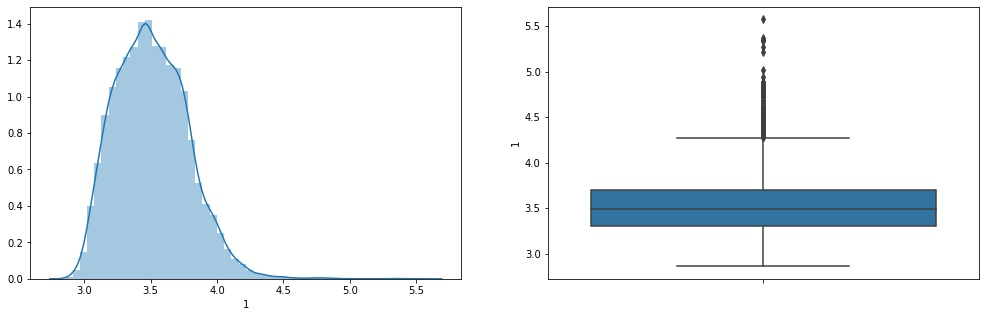

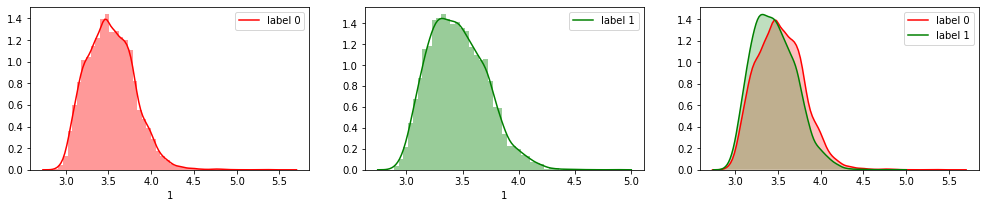

In [79]:
df['1'] = np.log(df['1']+15)           # update train set
df_test['1'] = np.log(df_test['1']+15) # update test set

explore_feature('1')

<b>So we won't remove the outliers.</b>

In [80]:
#df['1'] = df['1'][~outliers]  # '~' means to keep values except the masked ones.
 # updating in the test set

* <h3>Feature 2</h3>

In [81]:
outliers = outliers_detector('2')
print(df['2'][outliers].value_counts())

Total number of 564 outliers have been detected for feature 2
13.2    58
13.0    37
13.4    33
14.4    29
15.0    27
        ..
23.1     1
81.2     1
19.6     1
23.8     1
33.4     1
Name: 2, Length: 95, dtype: int64


<b>We can see that:
    1. The outliers are not scatterd, and a suspected number of outliers with the value '13.2' were found.
    2. Also, the feature looks like a tail of a distribution.
We tried to apply log transform to the feature, but we've seen that it lowered the models performance.<br/>
So we've decided to keep the feature as it is.</b>

In [82]:
#df['2'] = np.log(df['1']+15)
#df_test['2'] = np.log(df_test['1']+15)

* <h3>Feature 3</h3>

In [83]:
outliers = outliers_detector('3')
print(df['3'][outliers].value_counts())

Total number of 0 outliers have been detected for feature 3
Series([], Name: 3, dtype: int64)


<b>No outliers here!</b>

* <h3>Feature 4</h3>

In [84]:
outliers = outliers_detector('4')
print(df['4'][outliers].value_counts())

Total number of 235 outliers have been detected for feature 4
17.0    34
16.0    32
18.0    26
14.0    23
19.0    23
13.0    18
15.0    18
12.0    16
11.0    13
10.0    10
9.0      7
8.0      6
7.0      4
5.0      2
6.0      2
3.0      1
Name: 4, dtype: int64


<b>We can see that:<br/>
    1. The feature is has a normal-like distribution from the graphs.
    2. The outliers are gruoped.
So for now, we'll <u>not</u> remove them.</b>

* <h3>Feature 7</h3>

In [85]:
outliers = outliers_detector('7')
print(df['7'][outliers].value_counts())

Total number of 6 outliers have been detected for feature 7
3.157143    2
3.114286    2
3.435714    1
3.164286    1
Name: 7, dtype: int64


<b>We can see that:<br/>
    1. The feature is almost like a normal-distributed feature from the graphs.
    2. The outliers are far from the center.
So let's remove them.</b>

In [86]:
df['7'] = df['7'][~outliers]  # '~' means to keep values except the masked ones.

* <h3>Feature 8</h3>

In [87]:
outliers = outliers_detector('8')
print(df['8'][outliers].value_counts())

Total number of 0 outliers have been detected for feature 8
Series([], Name: 8, dtype: int64)


<b>No outliers were found!</b>

* <h3>Feature 10</h3>

In [88]:
outliers = outliers_detector('10')
print(df['10'][outliers].value_counts())

Total number of 1144 outliers have been detected for feature 10
 0.793729    1
 0.727093    1
 0.814579    1
 0.863058    1
 0.842744    1
            ..
 0.895949    1
 0.812613    1
 0.769879    1
 0.807727    1
-0.101374    1
Name: 10, Length: 1144, dtype: int64


<b>As we can see in the graph, it looks like that this feature has 2 different distributions, both normal-like. The outliers given here are part of the second distribution - so we will not make any change to this feature.

* <h3>Feature 11</h3>

In [89]:
outliers = outliers_detector('11')
print(df['11'][outliers].value_counts())

Total number of 170 outliers have been detected for feature 11
1035.0    6
1034.8    6
1035.7    5
1035.2    5
1034.4    5
         ..
990.9     1
1038.9    1
1038.2    1
986.2     1
1036.7    1
Name: 11, Length: 96, dtype: int64


<b>We can see that the feature is almost like a normal-distributed feature from the graphs, so we wanted to remove them at first, but we have seen that with removing these outliers our models performance are lower.<br/>So we decided to keep it</b>

In [90]:
#df['11'] = df['11'][~outliers]  # '~' means to keep values except the masked ones.

* <h3>Feature 12</h3>

In [91]:
outliers = outliers_detector('12')
print(df['12'][outliers].value_counts())

Total number of 218 outliers have been detected for feature 12
1036.7    12
1036.6     8
998.6      7
1037.2     6
1036.8     5
          ..
987.3      1
996.6      1
997.7      1
992.3      1
998.9      1
Name: 12, Length: 101, dtype: int64


<b>This feature behaves almost like feature 11, so we wanted to remove the outliers, but we have seen that the results are better when we are keeping the feature as it is, so we won't remove them.</b>

In [92]:
#df['12'] = df['12'][~outliers]  # '~' means to keep values except the masked ones.

* <h3>Feature 15</h3>

In [93]:
outliers = outliers_detector('15')
print(df['15'][outliers].value_counts())

Total number of 0 outliers have been detected for feature 15
Series([], Name: 15, dtype: int64)


<b>No outliers here, but we tried to log transform this feature and it gave us better peformance results.</b>
<h4>Log transform</h4>

In [94]:
df['15'] = np.log(df['15']+30)
df_test['15'] = np.log(df_test['15']+30)

* <h3>Feature 16</h3>

In [95]:
outliers = outliers_detector('16')
print(df['16'][outliers].value_counts())

Total number of 26 outliers have been detected for feature 16
41.8    4
41.3    4
42.2    3
41.4    3
41.9    2
41.5    2
43.3    1
42.3    1
42.4    1
43.2    1
46.1    1
42.9    1
41.6    1
42.0    1
Name: 16, dtype: int64


<b>We can see at the graph that these outliers are grouped, so for now we won't remove them.</b>

* <h3>Feature 17</h3>

In [96]:
outliers = outliers_detector('17')
print(df['17'][outliers].value_counts())

Total number of 4 outliers have been detected for feature 17
36.4    2
36.9    1
36.8    1
Name: 17, dtype: int64


<b>Let's remove these outliers.</b>

In [97]:
df['17'] = df['17'][~outliers]  # '~' means to keep values except the masked ones.

* <h3>Feature 20</h3>

In [98]:
outliers = outliers_detector('20')
print(df['20'][outliers].value_counts())

Total number of 795 outliers have been detected for feature 20
72.0     126
69.0     125
70.0     114
74.0      96
76.0      96
78.0      47
80.0      38
83.0      28
81.0      26
85.0      19
87.0      13
93.0      12
91.0      11
89.0      10
96.0       8
98.0       8
94.0       4
100.0      3
102.0      2
107.0      2
106.0      2
109.0      1
113.0      1
104.0      1
115.0      1
135.0      1
Name: 20, dtype: int64


<b>The outliers are grouped, so we won't remove them.</b>

* <h3>Feature 21</h3>

In [99]:
outliers = outliers_detector('21')
print(df['21'][outliers].value_counts())

Total number of 333 outliers have been detected for feature 21
41.0    92
43.0    78
44.0    46
46.0    44
48.0    23
50.0    18
52.0    15
54.0     8
56.0     4
65.0     3
57.0     1
69.0     1
Name: 21, dtype: int64


<b>The outliers are grouped, so we won't remove them.</b>

* <h3>Feature 23</h3>

In [100]:
outliers = outliers_detector('23')
print(df['23'][outliers].value_counts())

Total number of 383 outliers have been detected for feature 23
370.0    89
390.0    70
410.0    52
430.0    46
440.0    30
460.0    24
520.0    19
500.0    16
480.0    15
560.0     9
540.0     6
570.0     3
610.0     2
590.0     1
670.0     1
Name: 23, dtype: int64


<b>The outliers here are grouped, as can be seen in the data exploration,<br/> so we won't remove them.</b>

* <h3>Feature 24</h3>

In [101]:
outliers = outliers_detector('24')
print(df['24'][outliers].value_counts())

Total number of 407 outliers have been detected for feature 24
795.628122     1
697.290696     1
678.789732     1
792.125312     1
883.651990     1
              ..
947.365790     1
801.017161     1
750.866957     1
842.595441     1
1030.228045    1
Name: 24, Length: 407, dtype: int64


<b>This feature looks like a tail of a distribution, more like a log-normal distribution.<br/>
    so we log-transform it.</b><br/>
<h4>$\rightarrow$ Log transform</h4>

In [102]:
df['24'] = np.log(df['24']+10)           # train set update
df_test['24'] = np.log(df_test['24']+10) # test set update

* <h3>Rest of the features</h3>

The rest of the features are binary, so in these features we won't check for outliers.

* <h3>Nans check</h3>

In [103]:
nan_table(df)

0  1  2  3  4  7  8  10  11  12  13  14  15  16  17  20  21  23  24  \
0  172  0  0  0  0  6  0   0   0   0   0   0   0   0   4   0   0   0   0   

   label  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  \
0      0   0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  \
0    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   

   a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0   0            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                0                0

<b>Now, after we have removed the outliers, we drop the rows in which we have NaN values in them:</b>

In [104]:
df.dropna(inplace=True)

<b>Now we have to reset the index in order to preserve the sequence:</b>

In [105]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

0         1    2     3      4         7         8        10      11  \
0  1.170981  3.028787  0.6  80.0   76.0  1.107143  0.692857  0.702957  1024.1   
1  2.595788  3.642922  6.4  43.0   64.0  1.700000  0.614286  0.223911  1005.3   
2  0.972794  3.096814  0.4  63.0  100.0  1.242857  0.428571  0.180848  1020.8   
3  1.891667  3.492910  4.2  65.0   71.0  1.050000  0.671429  0.181289  1021.9   
4  1.965881  3.365120  3.2  40.0   62.0  1.950000  1.085714  0.237347  1005.3   

       12  13  14        15    16    17    20    21     23        24  label  \
0  1025.9   0   1  4.127134  13.9  12.2  28.0   7.0   40.0  3.235567      1   
1  1008.1   0   0  4.382027  18.6  16.5  61.0  43.0  110.0  5.523446      0   
2  1026.5   0   0  4.718499  16.5   9.6  15.0   7.0    0.0  5.456529      0   
3  1019.8   0   1  4.770685  14.2  11.4  39.0  24.0  130.0  4.572759      0   
4  1007.8   0   0  4.955827  26.6  23.4  30.0  20.0    0.0  4.872468      0   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    1   
1   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   
3   0   0    0    0    0    0    0    1    0    0    0    0   0    0    0   
4   0   1    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   1   
2    0    0    0    0    0    0    0    0   0    0   1   0   0   0   0   0   
3    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
4    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            1            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            1            0   
3            0            0            0            0            0   
4            0            0            0            0            1   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             1             0   
4             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             1             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   
1             0             0             1                 0             0   
2             0             0             0                 0             0   
3             0             0             0                 0             0   
4             0             0             0                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                1                0  
1             0                0                0                1  
2             0                0                0                1  
3             0                1          

In [106]:
df.shape

(21982, 75)

* <h3>Nans check once again</h3>

In [107]:
table = nan_table(df)
table

0  1  2  3  4  7  8  10  11  12  13  14  15  16  17  20  21  23  24  label  \
0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0      0   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                0                0

---

<h2>2.3. Clustering + Math Manipulations</h2>

<br/>
We'll build another train set with some new features.<br/>
Later we will compare the data sets and its results

<h3>$\rightarrow$ Train set</h3>

In [108]:
df1 = df.copy()

In [109]:
df1['2*0+1-2'] = 2*df1['0']+df['1']-df['2']
df1['(15*17)/100'] = (1/100)*df1['15']*df1['17']
df1['20-21+23'] = (df1['20']-df1['21'])+df1['23']
df1['7/8'] = df1['7']/df1['8']
df1.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.170981  3.028787  0.6  80.0  76.0  1.107143  0.692857  0.702957  1024.1   
1  2.595788  3.642922  6.4  43.0  64.0  1.700000  0.614286  0.223911  1005.3   

       12  13  14        15    16    17    20    21     23        24  label  \
0  1025.9   0   1  4.127134  13.9  12.2  28.0   7.0   40.0  3.235567      1   
1  1008.1   0   0  4.382027  18.6  16.5  61.0  43.0  110.0  5.523446      0   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    1   
1   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   1   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            1            0            0            0            0   
1            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             1             0             0             0             0   
1             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   
1             0             0             1                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012   2*0+1-2  \
0             0                0                1                0  4.770748   
1             0                0                0                1  2.434497   

   (15*17)/100  20-21+23       7/8  
0     0.503510      61.0  1.597938  
1     0.723034     128.0  2.767442

<h3>$\rightarrow$ Test set</h3>

In [110]:
df1_test = df_test.copy()

In [111]:
df1_test['2*0+1-2'] = 2*df1_test['0']+df_test['1']-df_test['2']
df1_test['(15*17)/100'] = (1/100)*df1_test['15']*df1_test['17']
df1_test['20-21+23'] = (df1_test['20']-df1_test['21'])+df1_test['23']
df1_test['7/8'] = df1_test['7']/df1_test['8']
df1_test.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.534361  3.295926  2.6  67.0  97.0  1.600000  0.650000  0.212177  1022.1   
1  1.632953  3.395236  3.6  72.0  78.0  1.942857  1.328571  0.126069  1013.2   

       12  13  14        15    16    17    20    21    23        24  a0  a1  \
0  1026.2   0   1  4.905275  21.5  12.2  52.0  33.0  70.0  5.899131   0   0   
1  1016.3   0   1  4.158883  25.0  24.3  24.0  11.0  40.0  4.871599   0   0   

   a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  a22  a23  \
0    0    1    0    0    0    0    0    0    0    0   0    0    0    0    0   
1    0    0    0    0    0    0    0    0    1    0   0    0    0    0    0   

   a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  feature_9_5  \
0    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   
1    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   

   feature_9_8  feature_9_7  feature_9_6  feature_9_3  feature_18_L  \
0            0            0            0            1             0   
1            0            0            0            0             0   

   feature_18_P  feature_18_D  feature_18_K  feature_18_I  feature_18_F  \
0             0             0             0             0             1   
1             1             0             0             0             0   

   feature_18_M  feature_18_B  feature_18_C  feature_18_E  feature_18_O  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_N  feature_18_Other  feature_18_A  feature_18_J  feature_18_H  \
0             0                 0             0             0             0   
1             0                 0             0             0             0   

   feature_22_2010  feature_22_2011  feature_22_2012   2*0+1-2  (15*17)/100  \
0                0                0                1  3.764647     0.598444   
1                0                0                1  3.061142     1.010609   

   20-21+23       7/8  
0      89.0  2.461538  
1      53.0  1.462366

In [112]:
df.shape,df_test.shape

((21982, 75), (7387, 74))

In [113]:
df1.shape,df1_test.shape

((21982, 79), (7387, 78))

<hr>
<h2>Numeric & Categorical Data Splitting</h2><br/>
Let's split the data to binary and numeric, so we could appropriately apply either standartization and diemnsion reduction techniques on the numeric features. After doing that we will concat the features again.


* <h3>Train set</h3>

In [114]:
df.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.170981  3.028787  0.6  80.0  76.0  1.107143  0.692857  0.702957  1024.1   
1  2.595788  3.642922  6.4  43.0  64.0  1.700000  0.614286  0.223911  1005.3   

       12  13  14        15    16    17    20    21     23        24  label  \
0  1025.9   0   1  4.127134  13.9  12.2  28.0   7.0   40.0  3.235567      1   
1  1008.1   0   0  4.382027  18.6  16.5  61.0  43.0  110.0  5.523446      0   

   a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  \
0   0   0    0    0    0    0    0    0    0    0    0    0   0    0    1   
1   0   0    0    0    0    0    0    0    0    0    0    0   0    0    0   

   a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  \
0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   1   

   feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0            1            0            0            0            0   
1            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             1             0             0             0             0   
1             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   
1             0             0             1                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                1                0  
1             0                0                0                1

<b>$\rightarrow$ Binary Features</b>

In [115]:
data_binary = df.select_dtypes(exclude=['float64'])
data_binary = data_binary.drop('label', axis=1)  # remove label from dimension reduction
data_binary.head(2)

13  14  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  \
0   0   1   0   0    0    0    0    0    0    0    0    0    0    0   0    0   
1   0   0   0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  \
0    1    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   

   a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0   0            1            0            0            0            0   
1   1            0            0            0            0            0   

   feature_18_D  feature_18_P  feature_18_L  feature_18_K  feature_18_F  \
0             1             0             0             0             0   
1             0             0             0             0             0   

   feature_18_I  feature_18_M  feature_18_B  feature_18_E  feature_18_C  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_O  feature_18_A  feature_18_N  feature_18_Other  feature_18_H  \
0             0             0             0                 0             0   
1             0             0             1                 0             0   

   feature_18_J  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                1                0  
1             0                0                0                1

<b>$\rightarrow$ Numeric Features</b>

In [116]:
data_numeric = df.select_dtypes(include=['float64'])
data_numeric.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.170981  3.028787  0.6  80.0  76.0  1.107143  0.692857  0.702957  1024.1   
1  2.595788  3.642922  6.4  43.0  64.0  1.700000  0.614286  0.223911  1005.3   

       12        15    16    17    20    21     23        24  
0  1025.9  4.127134  13.9  12.2  28.0   7.0   40.0  3.235567  
1  1008.1  4.382027  18.6  16.5  61.0  43.0  110.0  5.523446

In [117]:
data_binary.shape,data_numeric.shape

((21982, 57), (21982, 17))

* <h3>Test set</h3>

In [118]:
df_test.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.534361  3.295926  2.6  67.0  97.0  1.600000  0.650000  0.212177  1022.1   
1  1.632953  3.395236  3.6  72.0  78.0  1.942857  1.328571  0.126069  1013.2   

       12  13  14        15    16    17    20    21    23        24  a0  a1  \
0  1026.2   0   1  4.905275  21.5  12.2  52.0  33.0  70.0  5.899131   0   0   
1  1016.3   0   1  4.158883  25.0  24.3  24.0  11.0  40.0  4.871599   0   0   

   a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  a21  a22  a23  \
0    0    1    0    0    0    0    0    0    0    0   0    0    0    0    0   
1    0    0    0    0    0    0    0    0    1    0   0    0    0    0    0   

   a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  a9  feature_9_5  \
0    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   
1    0    0    0    0    0    0   0    0   0   0   0   0   0   0            0   

   feature_9_8  feature_9_7  feature_9_6  feature_9_3  feature_18_L  \
0            0            0            0            1             0   
1            0            0            0            0             0   

   feature_18_P  feature_18_D  feature_18_K  feature_18_I  feature_18_F  \
0             0             0             0             0             1   
1             1             0             0             0             0   

   feature_18_M  feature_18_B  feature_18_C  feature_18_E  feature_18_O  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_N  feature_18_Other  feature_18_A  feature_18_J  feature_18_H  \
0             0                 0             0             0             0   
1             0                 0             0             0             0   

   feature_22_2010  feature_22_2011  feature_22_2012  
0                0                0                1  
1                0                0                1

<b>$\rightarrow$ Binary Features</b>

In [119]:
data_binary_test = df_test.select_dtypes(exclude=['float64'])
data_binary_test.head(2)

13  14  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  a18  a19  a2  a20  \
0   0   1   0   0    0    1    0    0    0    0    0    0    0    0   0    0   
1   0   1   0   0    0    0    0    0    0    0    0    0    1    0   0    0   

   a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  a4  a5  a6  a7  a8  \
0    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   
1    0    0    0    0    0    0    0    0    0   0    0   0   0   0   0   0   

   a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  feature_9_3  \
0   0            0            0            0            0            1   
1   0            0            0            0            0            0   

   feature_18_L  feature_18_P  feature_18_D  feature_18_K  feature_18_I  \
0             0             0             0             0             0   
1             0             1             0             0             0   

   feature_18_F  feature_18_M  feature_18_B  feature_18_C  feature_18_E  \
0             1             0             0             0             0   
1             0             0             0             0             0   

   feature_18_O  feature_18_N  feature_18_Other  feature_18_A  feature_18_J  \
0             0             0                 0             0             0   
1             0             0                 0             0             0   

   feature_18_H  feature_22_2010  feature_22_2011  feature_22_2012  
0             0                0                0                1  
1             0                0                0                1

<b>$\rightarrow$ Numeric Features</b>

In [120]:
data_numeric_test = df_test.select_dtypes(include=['float64'])
data_numeric_test.head(2)

0         1    2     3     4         7         8        10      11  \
0  1.534361  3.295926  2.6  67.0  97.0  1.600000  0.650000  0.212177  1022.1   
1  1.632953  3.395236  3.6  72.0  78.0  1.942857  1.328571  0.126069  1013.2   

       12        15    16    17    20    21    23        24  
0  1026.2  4.905275  21.5  12.2  52.0  33.0  70.0  5.899131  
1  1016.3  4.158883  25.0  24.3  24.0  11.0  40.0  4.871599

In [121]:
data_binary_test.shape,data_numeric_test.shape

((7387, 57), (7387, 17))

---

<h1>2.4. Normalization</h1>

**We've tried to normalize the data by using the methods:**
1. Z-Score Standard Scaling
2. Min-Max Scaler

**We've found that the best results are given with the standard scaler.**

<b>$\rightarrow$ Apply Standard Scaler on the train set</b>

In [122]:
standard_scaler = StandardScaler()                                           # initiate Z-score scaler
standard_scaler.fit(data_numeric)                                            # fit the numeric data
scaled_data_numeric = pd.DataFrame(standard_scaler.transform(data_numeric))  # save the scaled numeric data
scaled_data_numeric.head(3)

0         1         2         3         4         5         6  \
0 -1.285630 -1.826405 -1.352989  1.409001  0.407751 -1.126703 -0.418407   
1  0.547874  0.531332  0.510946 -0.433090 -0.256283  0.116807 -0.589220   
2 -1.540666 -1.565238 -1.417263  0.562635  1.735818 -0.842044 -0.992960   

          7         8         9        10        11        12        13  \
0  2.934596  1.247829  1.155579 -0.976083 -1.169149 -0.756571 -0.938730   
1 -0.027995 -1.440125 -1.363119 -0.405939 -0.451887 -0.081833  1.654575   
2 -0.294315  0.776007  1.240479  0.346684 -0.772366 -1.164551 -1.960334   

         14        15        16  
0 -1.417103 -1.236430 -2.244145  
1  2.801661 -0.425872  0.414776  
2 -1.417103 -1.699606  0.337007

<b>$\rightarrow$ Apply Standard Scaler on the test set</b>

In [123]:
standard_scaler = StandardScaler()                                                     # initiate Z-score scaler
standard_scaler.fit(data_numeric_test)                                                 # fit the numeric data
scaled_data_numeric_test = pd.DataFrame(standard_scaler.transform(data_numeric_test))  # save the scaled numeric data
scaled_data_numeric_test.head(3)

0         1         2         3         4         5         6  \
0 -0.784622 -0.768432 -0.619773  0.752873  1.566918 -0.091028 -0.521114   
1 -0.664211 -0.405404 -0.349935  1.003694  0.502015  0.625860  0.957351   
2  0.187941  0.323234  0.135774  0.602380 -0.899173  0.461573  0.225900   

          7         8         9        10        11        12        13  \
0 -0.097998  0.960045  1.204081  0.769738 -0.010936 -0.757002  0.976330   
1 -0.643177 -0.316539 -0.207811 -0.880027  0.523029  1.134799 -1.246709   
2  0.228487  0.257207  0.419697  0.720066  0.324700  0.900278 -0.055795   

         14        15        16  
0  1.670721 -0.898276  0.853687  
1 -0.957071 -1.249057 -0.323381  
2  1.431831 -0.898276  0.647090

**<i>Min Max normalization - Not Used</i>**

In [124]:
"""
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data_numeric)
scaled_data_numeric = pd.DataFrame(min_max_scaler.transform(data_numeric))
scaled_data_numeric.head()
"""

'\nmin_max_scaler = MinMaxScaler()\nmin_max_scaler.fit(data_numeric)\nscaled_data_numeric = pd.DataFrame(min_max_scaler.transform(data_numeric))\nscaled_data_numeric.head()\n'

In [125]:
"""
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data_numeric_test)
scaled_data_numeric_test = pd.DataFrame(min_max_scaler.transform(data_numeric_test))
scaled_data_numeric_test.head()
"""

'\nmin_max_scaler = MinMaxScaler()\nmin_max_scaler.fit(data_numeric_test)\nscaled_data_numeric_test = pd.DataFrame(min_max_scaler.transform(data_numeric_test))\nscaled_data_numeric_test.head()\n'

<hr>
<h1>2.5. Feature Selection and Dimensionality Reduction</h1>

<b>We've chose PCA to apply dimensionality reduction.<br/>
Let's find out if we can reduced some of the dimensions of both numeric and binary features:</b>

Let's build a relevant function to see what number of components describe 95% of the total variance in both numeric and binary datasets:

In [126]:
def pca_explain(data):
    """
    This function plots a graph of total variance vs. number of components.
    The function returns the number of components (features) that explain 95% of the total variance.
    """
    pca = PCA().fit(data) # fitting the PCA on the data
    plt.figure(figsize=(8,5))
    explained_variance = pca.explained_variance_ratio_.cumsum()
    ideal_num_of_components = np.argwhere(explained_variance >= 0.95)[0] # at least 95% of the data
    plt.plot(explained_variance) # Accumulative sum of the variance
    plt.xlabel('Number of components')
    plt.ylabel('Variance')
    plt.title('Variance vs. Components')
    plt.axhline(0.95,c='r') # red line for 95% variance
    plt.show()
    print("%s components explains at least 95 percent of the variance in the data" 
         % (ideal_num_of_components))
    return int(ideal_num_of_components)

<h2>2.5.1. Numeric Data Dimensionality Reduction</h2>

<b>Let's see to what number of components can we reduce our numeric data:</b>

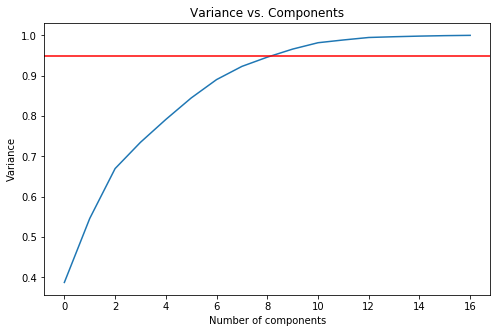

[9] components explains at least 95 percent of the variance in the data


In [127]:
num_of_components = pca_explain(scaled_data_numeric)

<b>We can see that 9 components describes at least 95% of the total variance.<br/>
Now we can reduce our scaled numeric data to just 9 components:</b>

<h3>$\rightarrow$ Train set</h3>

In [128]:
pca = PCA(n_components = num_of_components)
scaled_data_numeric_pca = pca.fit(scaled_data_numeric)
final_scaled_data_numeric = pd.DataFrame(scaled_data_numeric_pca.transform(scaled_data_numeric))
final_scaled_data_numeric.head(3)

0         1         2         3         4         5         6  \
0 -4.184433 -0.800851 -2.098874  0.679930  2.605150  0.800504 -1.224099   
1  1.354979  2.430907  1.049586 -1.264800  0.690361 -1.095793 -0.195910   
2 -4.172393 -1.759761 -1.170518 -0.190061 -0.707972  0.821928  0.586586   

          7         8  
0  1.155316 -0.548615  
1 -0.675204  1.851275  
2 -1.204634  0.068343

In [129]:
final_scaled_data_numeric.shape

(21982, 9)

<h3>$\rightarrow$ Test set</h3>

In [130]:
scaled_data_numeric_pca = pca.fit(scaled_data_numeric_test)
final_scaled_data_numeric_test = pd.DataFrame(scaled_data_numeric_pca.transform(scaled_data_numeric_test))
final_scaled_data_numeric_test.head(3)

0         1         2         3         4         5         6  \
0 -1.770678  0.621037  0.759420 -0.232723 -0.634585 -0.601021  1.535338   
1 -0.123224 -0.530261 -2.838999  0.080235 -1.205571 -0.138296 -0.108375   
2  0.992587 -0.129072  0.281755  0.087819 -0.204659 -0.703439  0.919072   

          7         8  
0  2.079814  1.277264  
1 -0.290904  0.184210  
2  0.767923  0.554919

In [131]:
final_scaled_data_numeric_test.shape

(7387, 9)

<h2>2.5.2. Binary Data Dimensionality Reduction</h2>

<b>Let's see to what number of components can we reduce our binaric data:</b>

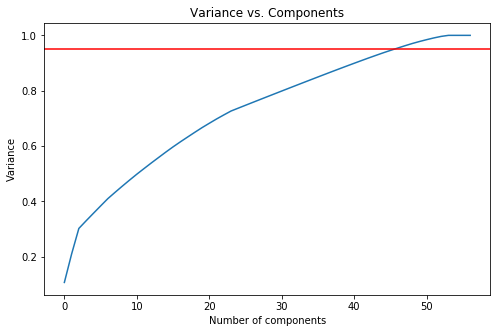

[46] components explains at least 95 percent of the variance in the data


In [132]:
num_of_components = pca_explain(data_binary)

<b>We can see that 46 components describes 95% of the total variance.<br/>
Now we can reduced our binary data to just 46 components:</b>

<h3>$\rightarrow$ Train set</h3>

In [133]:
pca = PCA(n_components = num_of_components)
data_binary_pca = pca.fit(data_binary)
final_data_binary = pd.DataFrame(data_binary_pca.transform(data_binary))
final_data_binary.columns = ['b_' + str(col) for col in final_data_binary.columns]
final_data_binary.head(3)

b_0       b_1       b_2       b_3       b_4       b_5       b_6  \
0  0.323988 -0.619957 -0.572718 -0.352887  0.823818 -0.049566 -0.197069   
1 -0.668057 -0.216748  0.637418  0.102180 -0.013104  0.001443 -0.020575   
2 -0.675278 -0.230681  0.630995 -0.053430 -0.116076 -0.001329  0.871009   

        b_7       b_8       b_9      b_10      b_11      b_12      b_13  \
0  0.650404 -0.443614 -0.397498 -0.124375 -0.053192 -0.216022  0.097879   
1 -0.032017  0.011125  0.029023 -0.041684  0.054750  0.054414  0.025696   
2 -0.138052 -0.151182  0.061671 -0.118681  0.076988  0.157921  0.542350   

       b_14      b_15      b_16      b_17      b_18      b_19      b_20  \
0  0.086368 -0.182749  0.408385  0.267340  0.180714  0.248956  0.060067   
1 -0.033558 -0.022325 -0.383248  0.629292 -0.339491  0.039573  0.582222   
2  0.671417  0.068810 -0.009947 -0.181416 -0.179063 -0.011717  0.012872   

       b_21      b_22      b_23      b_24      b_25      b_26      b_27  \
0 -0.031530 -0.000754 -0.218608  0.027859  0.006140 -0.016006  0.016458   
1  0.278003 -0.161048  0.260459  0.001602  0.025755 -0.020594 -0.051972   
2  0.002602  0.087178 -0.259041  0.019877 -0.030731 -0.009943 -0.004507   

       b_28      b_29      b_30      b_31      b_32      b_33      b_34  \
0  0.010563 -0.004184 -0.030330 -0.006336  0.005529  0.023917  0.014675   
1 -0.001904  0.011507 -0.019528 -0.012183  0.016443 -0.011824 -0.064355   
2 -0.004630  0.002336  0.013303 -0.027687 -0.014336  0.019897  0.053111   

       b_35      b_36      b_37      b_38      b_39      b_40      b_41  \
0  0.005444  0.053425  0.019904 -0.017642 -0.005744  0.128765 -0.006522   
1  0.013285 -0.021296  0.011155 -0.180737  0.139805 -0.368693  0.285132   
2  0.005598 -0.033134 -0.003203  0.004358  0.006926  0.028080  0.020690   

       b_42      b_43      b_44      b_45  
0 -0.056597  0.048659  0.034380  0.180887  
1 -0.259653  0.128552 -0.033522  0.186150  
2 -0.019356 -0.082243 -0.021221 -0.107345

<h3>$\rightarrow$ Test set</h3>

In [134]:
pca = PCA(n_components = num_of_components)

data_binary_pca = pca.fit(data_binary_test)

final_data_binary_test = pd.DataFrame(data_binary_pca.transform(data_binary_test))
final_data_binary_test.columns = ['b_' + str(col) for col in final_data_binary_test.columns]
final_data_binary_test.head(3)

b_0       b_1       b_2       b_3       b_4       b_5       b_6  \
0  0.068785  0.277603  0.863707  0.881948 -0.082154 -0.274077  0.011682   
1  0.069643  0.270810  0.857779  0.298931 -0.074278 -0.006641 -0.027017   
2 -0.541871  0.458901 -0.625698 -0.141440 -0.209222  0.347553  0.779813   

        b_7       b_8       b_9      b_10      b_11      b_12      b_13  \
0 -0.228141 -0.074082 -0.486873 -0.322447  0.471079  0.679287 -0.248276   
1  0.126177  0.664258  0.430415  0.206386 -0.022877  0.250556  0.193242   
2  0.145385  0.262574 -0.352789 -0.539631 -0.613131 -0.180046  0.621954   

       b_14      b_15      b_16      b_17      b_18      b_19      b_20  \
0 -0.318128  0.103163  0.309605  0.357737  0.227711 -0.056869  0.054172   
1 -0.057783  0.246959  0.151539  0.424445  0.158135 -0.011595 -0.211592   
2 -0.124613  0.071941  0.111864  0.066341 -0.026591 -0.140109  0.167941   

       b_21      b_22      b_23      b_24      b_25      b_26      b_27  \
0 -0.040931 -0.113972  0.130206 -0.030136 -0.003148  0.000897 -0.016260   
1  0.117025  0.100501 -0.011453  0.028458 -0.026617 -0.017402  0.027384   
2 -0.071674 -0.412301  0.092066 -0.086774 -0.025553  0.056451 -0.005684   

       b_28      b_29      b_30      b_31      b_32      b_33      b_34  \
0 -0.231227 -0.016055  0.071902 -0.204176 -0.227417 -0.361339 -0.268079   
1  0.010797  0.013141  0.135831 -0.000252 -0.026830  0.055225  0.042139   
2 -0.006456  0.028332  0.030359 -0.054213 -0.106351 -0.132617 -0.037003   

       b_35      b_36      b_37      b_38      b_39      b_40      b_41  \
0  0.147140 -0.349893 -0.021809 -0.011284  0.039034 -0.088949 -0.078785   
1 -0.086342  0.370763 -0.101719  0.731571  0.115958 -0.005006 -0.079468   
2 -0.000934 -0.047724 -0.125150 -0.230136  0.037840  0.076261 -0.028680   

       b_42      b_43      b_44      b_45  
0 -0.032900  0.177086 -0.075577  0.007231  
1 -0.159902  0.277231  0.069466  0.070487  
2  0.032426 -0.288279 -0.138253 -0.065487

<h2>2.5.3. Final train & test sets</h2>

**We tried to evaluate the models:**
    1. After applying PCA on both numeric features & binaric features
    2. After applying PCA only on the numeric features, while keeping the binary features untouched
**We have seen that our models have better performance when we are applying PCA only on the numeric data.**

<b>Now let's join both reduced numeric data (after PCA) and binary data:</b>

<h3>$\rightarrow$ Train set</h3>

In [135]:
final_train_set = pd.concat([final_scaled_data_numeric,data_binary],axis=1)
final_train_set.head(2)

0         1         2        3         4         5         6  \
0 -4.184433 -0.800851 -2.098874  0.67993  2.605150  0.800504 -1.224099   
1  1.354979  2.430907  1.049586 -1.26480  0.690361 -1.095793 -0.195910   

          7         8  13  14  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  \
0  1.155316 -0.548615   0   1   0   0    0    0    0    0    0    0    0    0   
1 -0.675204  1.851275   0   0   0   0    0    0    0    0    0    0    0    0   

   a18  a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  \
0    0    0   0    0    1    0    0    0    0    0    0    0    0   0    0   
1    0    0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a4  a5  a6  a7  a8  a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  \
0   0   0   0   0   0   0            1            0            0            0   
1   0   0   0   0   0   1            0            0            0            0   

   feature_9_3  feature_18_D  feature_18_P  feature_18_L  feature_18_K  \
0            0             1             0             0             0   
1            0             0             0             0             0   

   feature_18_F  feature_18_I  feature_18_M  feature_18_B  feature_18_E  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   feature_18_C  feature_18_O  feature_18_A  feature_18_N  feature_18_Other  \
0             0             0             0             0                 0   
1             0             0             0             1                 0   

   feature_18_H  feature_18_J  feature_22_2010  feature_22_2011  \
0             0             0                0                1   
1             0             0                0                0   

   feature_22_2012  
0                0  
1                1

<h3>$\rightarrow$ Test set</h3>

In [136]:
final_test_set = pd.concat([final_scaled_data_numeric_test,data_binary_test],axis=1)
final_test_set.head(2)

0         1         2         3         4         5         6  \
0 -1.770678  0.621037  0.759420 -0.232723 -0.634585 -0.601021  1.535338   
1 -0.123224 -0.530261 -2.838999  0.080235 -1.205571 -0.138296 -0.108375   

          7         8  13  14  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  \
0  2.079814  1.277264   0   1   0   0    0    1    0    0    0    0    0    0   
1 -0.290904  0.184210   0   1   0   0    0    0    0    0    0    0    0    0   

   a18  a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  \
0    0    0   0    0    0    0    0    0    0    0    0    0    0   0    0   
1    1    0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a4  a5  a6  a7  a8  a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  \
0   0   0   0   0   0   0            0            0            0            0   
1   0   0   0   0   0   0            0            0            0            0   

   feature_9_3  feature_18_L  feature_18_P  feature_18_D  feature_18_K  \
0            1             0             0             0             0   
1            0             0             1             0             0   

   feature_18_I  feature_18_F  feature_18_M  feature_18_B  feature_18_C  \
0             0             1             0             0             0   
1             0             0             0             0             0   

   feature_18_E  feature_18_O  feature_18_N  feature_18_Other  feature_18_A  \
0             0             0             0                 0             0   
1             0             0             0                 0             0   

   feature_18_J  feature_18_H  feature_22_2010  feature_22_2011  \
0             0             0                0                0   
1             0             0                0                0   

   feature_22_2012  
0                1  
1                1

In [137]:
final_train_set.shape,final_test_set.shape

((21982, 66), (7387, 66))

<b>Now we look for correlations between features:</b>

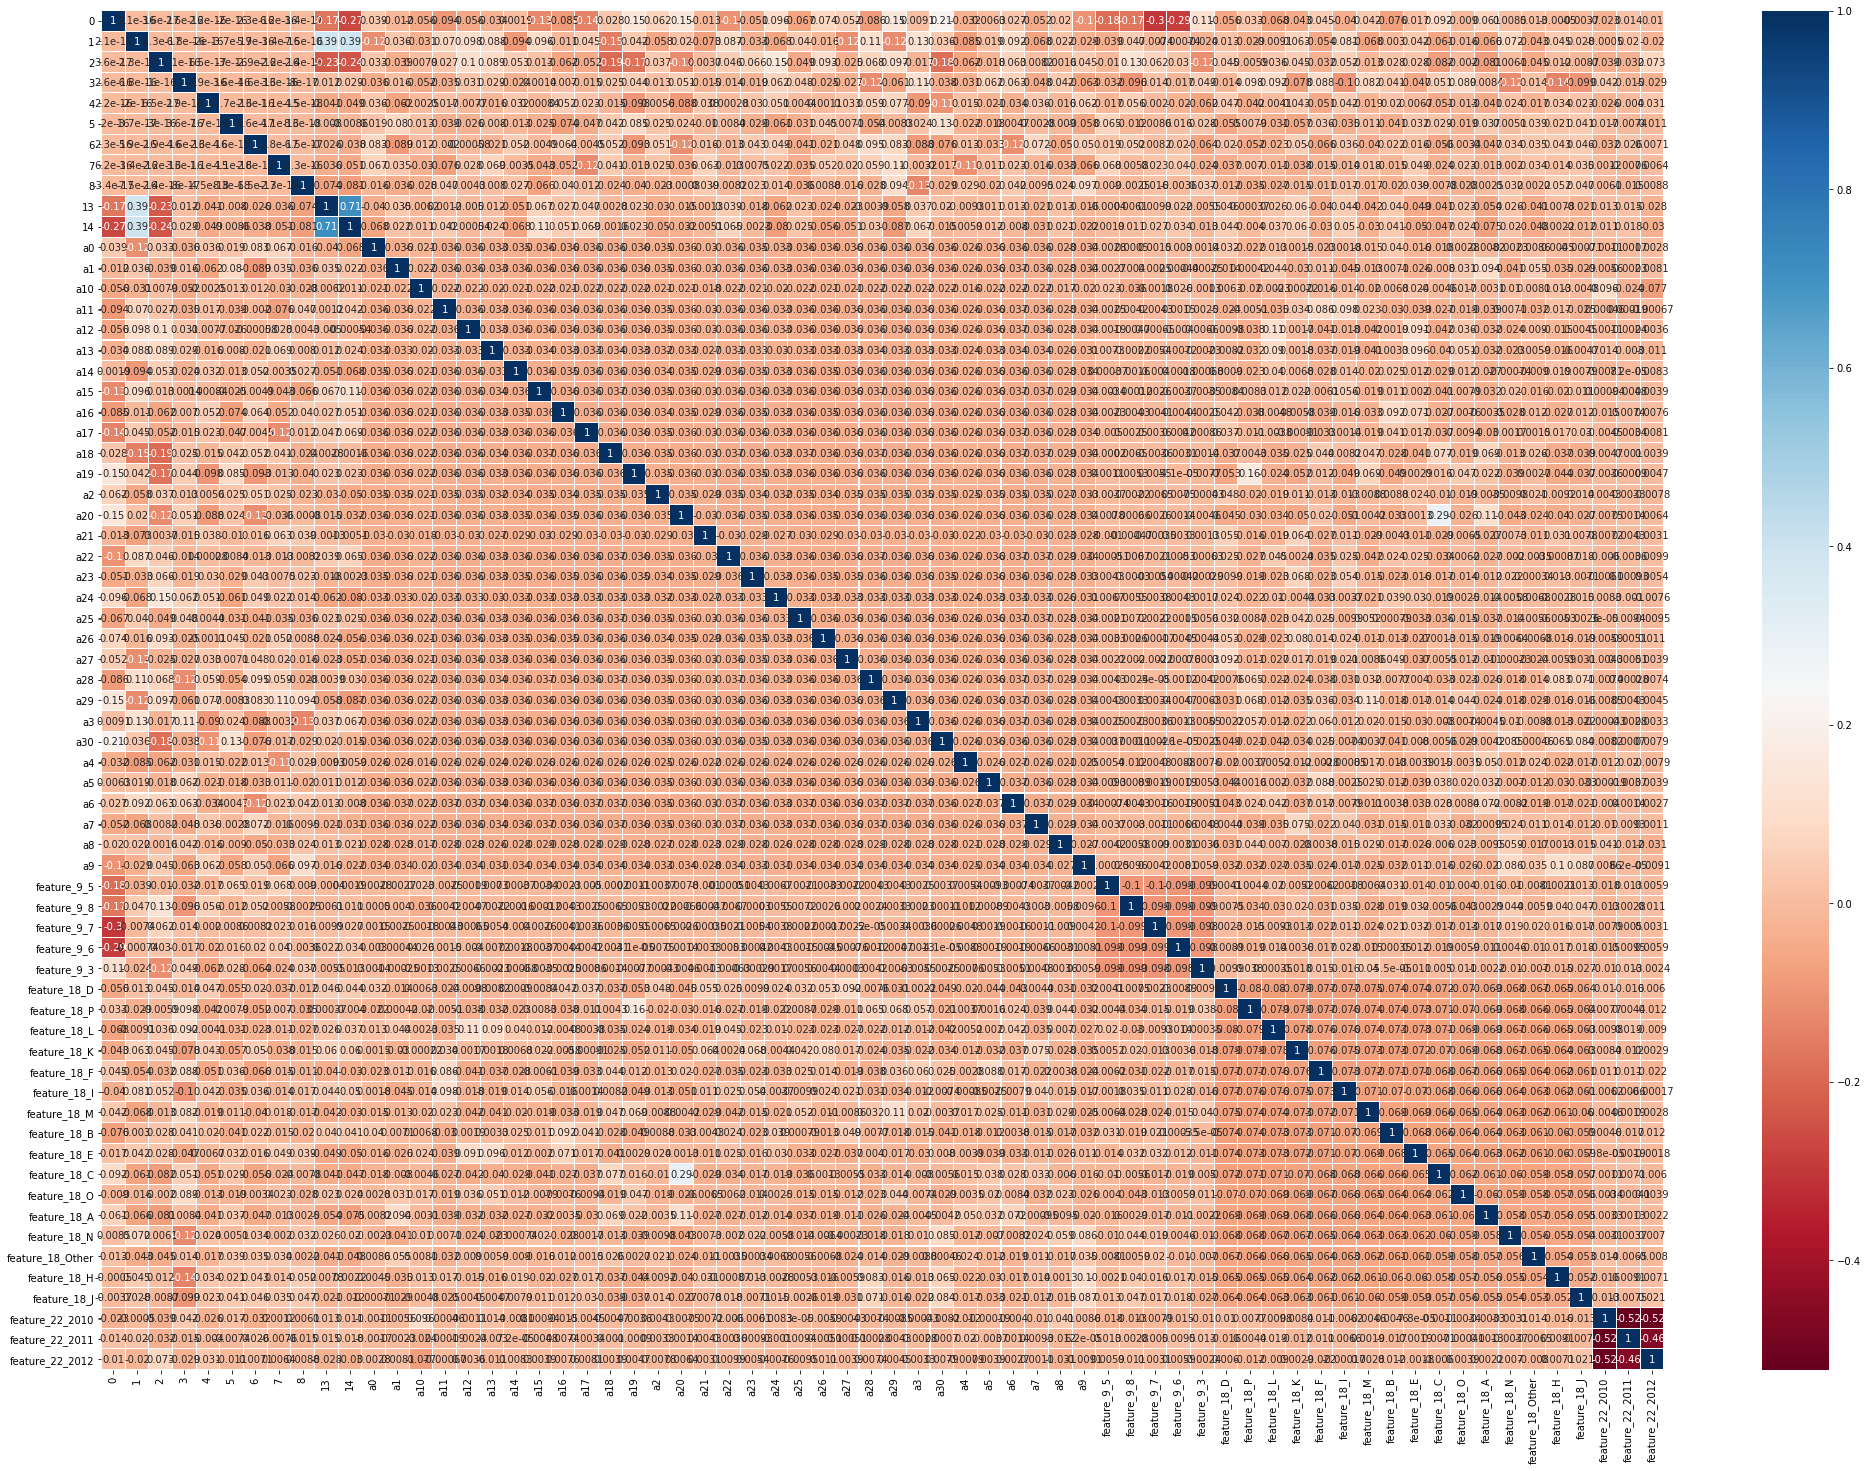

In [138]:
plt.subplots(figsize=(35,25))
sns.heatmap(final_train_set.corr(),
           annot=True, linecolor='white', linewidth='0.05', cmap="RdBu")
plt.show()

<b>Although we can see that a very small part of the features has either positive or negative correlation, we can see that the max correlation is below 0.85 and the min correlation is above -0.85.<br/>
    So we decided not to drop any feature.<br/>

---
<h2 align='center'>Final number of features: 66</h2>
<hr>


<h3>Create X_final_train and Y_final_train for the evaluation</h3>

In [139]:
X_final_train = final_train_set
Y_final_train = df['label']

<b>And now let's return the label column to the final train set:</b>

In [140]:
final_train_set = pd.concat([final_train_set,df['label']],axis=1)
final_train_set.head(3)

0         1         2         3         4         5         6  \
0 -4.184433 -0.800851 -2.098874  0.679930  2.605150  0.800504 -1.224099   
1  1.354979  2.430907  1.049586 -1.264800  0.690361 -1.095793 -0.195910   
2 -4.172393 -1.759761 -1.170518 -0.190061 -0.707972  0.821928  0.586586   

          7         8  13  14  a0  a1  a10  a11  a12  a13  a14  a15  a16  a17  \
0  1.155316 -0.548615   0   1   0   0    0    0    0    0    0    0    0    0   
1 -0.675204  1.851275   0   0   0   0    0    0    0    0    0    0    0    0   
2 -1.204634  0.068343   0   0   0   0    0    0    0    0    0    0    0    0   

   a18  a19  a2  a20  a21  a22  a23  a24  a25  a26  a27  a28  a29  a3  a30  \
0    0    0   0    0    1    0    0    0    0    0    0    0    0   0    0   
1    0    0   0    0    0    0    0    0    0    0    0    0    0   0    0   
2    0    0   0    0    0    0    0    0    0    0    0    0    0   0    0   

   a4  a5  a6  a7  a8  a9  feature_9_5  feature_9_8  feature_9_7  feature_9_6  \
0   0   0   0   0   0   0            1            0            0            0   
1   0   0   0   0   0   1            0            0            0            0   
2   1   0   0   0   0   0            0            0            0            1   

   feature_9_3  feature_18_D  feature_18_P  feature_18_L  feature_18_K  \
0            0             1             0             0             0   
1            0             0             0             0             0   
2            0             0             0             0             0   

   feature_18_F  feature_18_I  feature_18_M  feature_18_B  feature_18_E  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   

   feature_18_C  feature_18_O  feature_18_A  feature_18_N  feature_18_Other  \
0             0             0             0             0                 0   
1             0             0             0             1                 0   
2             0             0             0             0                 0   

   feature_18_H  feature_18_J  feature_22_2010  feature_22_2011  \
0             0             0                0                1   
1             0             0                0                0   
2             0             0                0                0   

   feature_22_2012  label  
0                0      1  
1                1      0  
2                1      0

In [141]:
final_train_set.shape

(21982, 67)

<h3>Features lookout</h3>

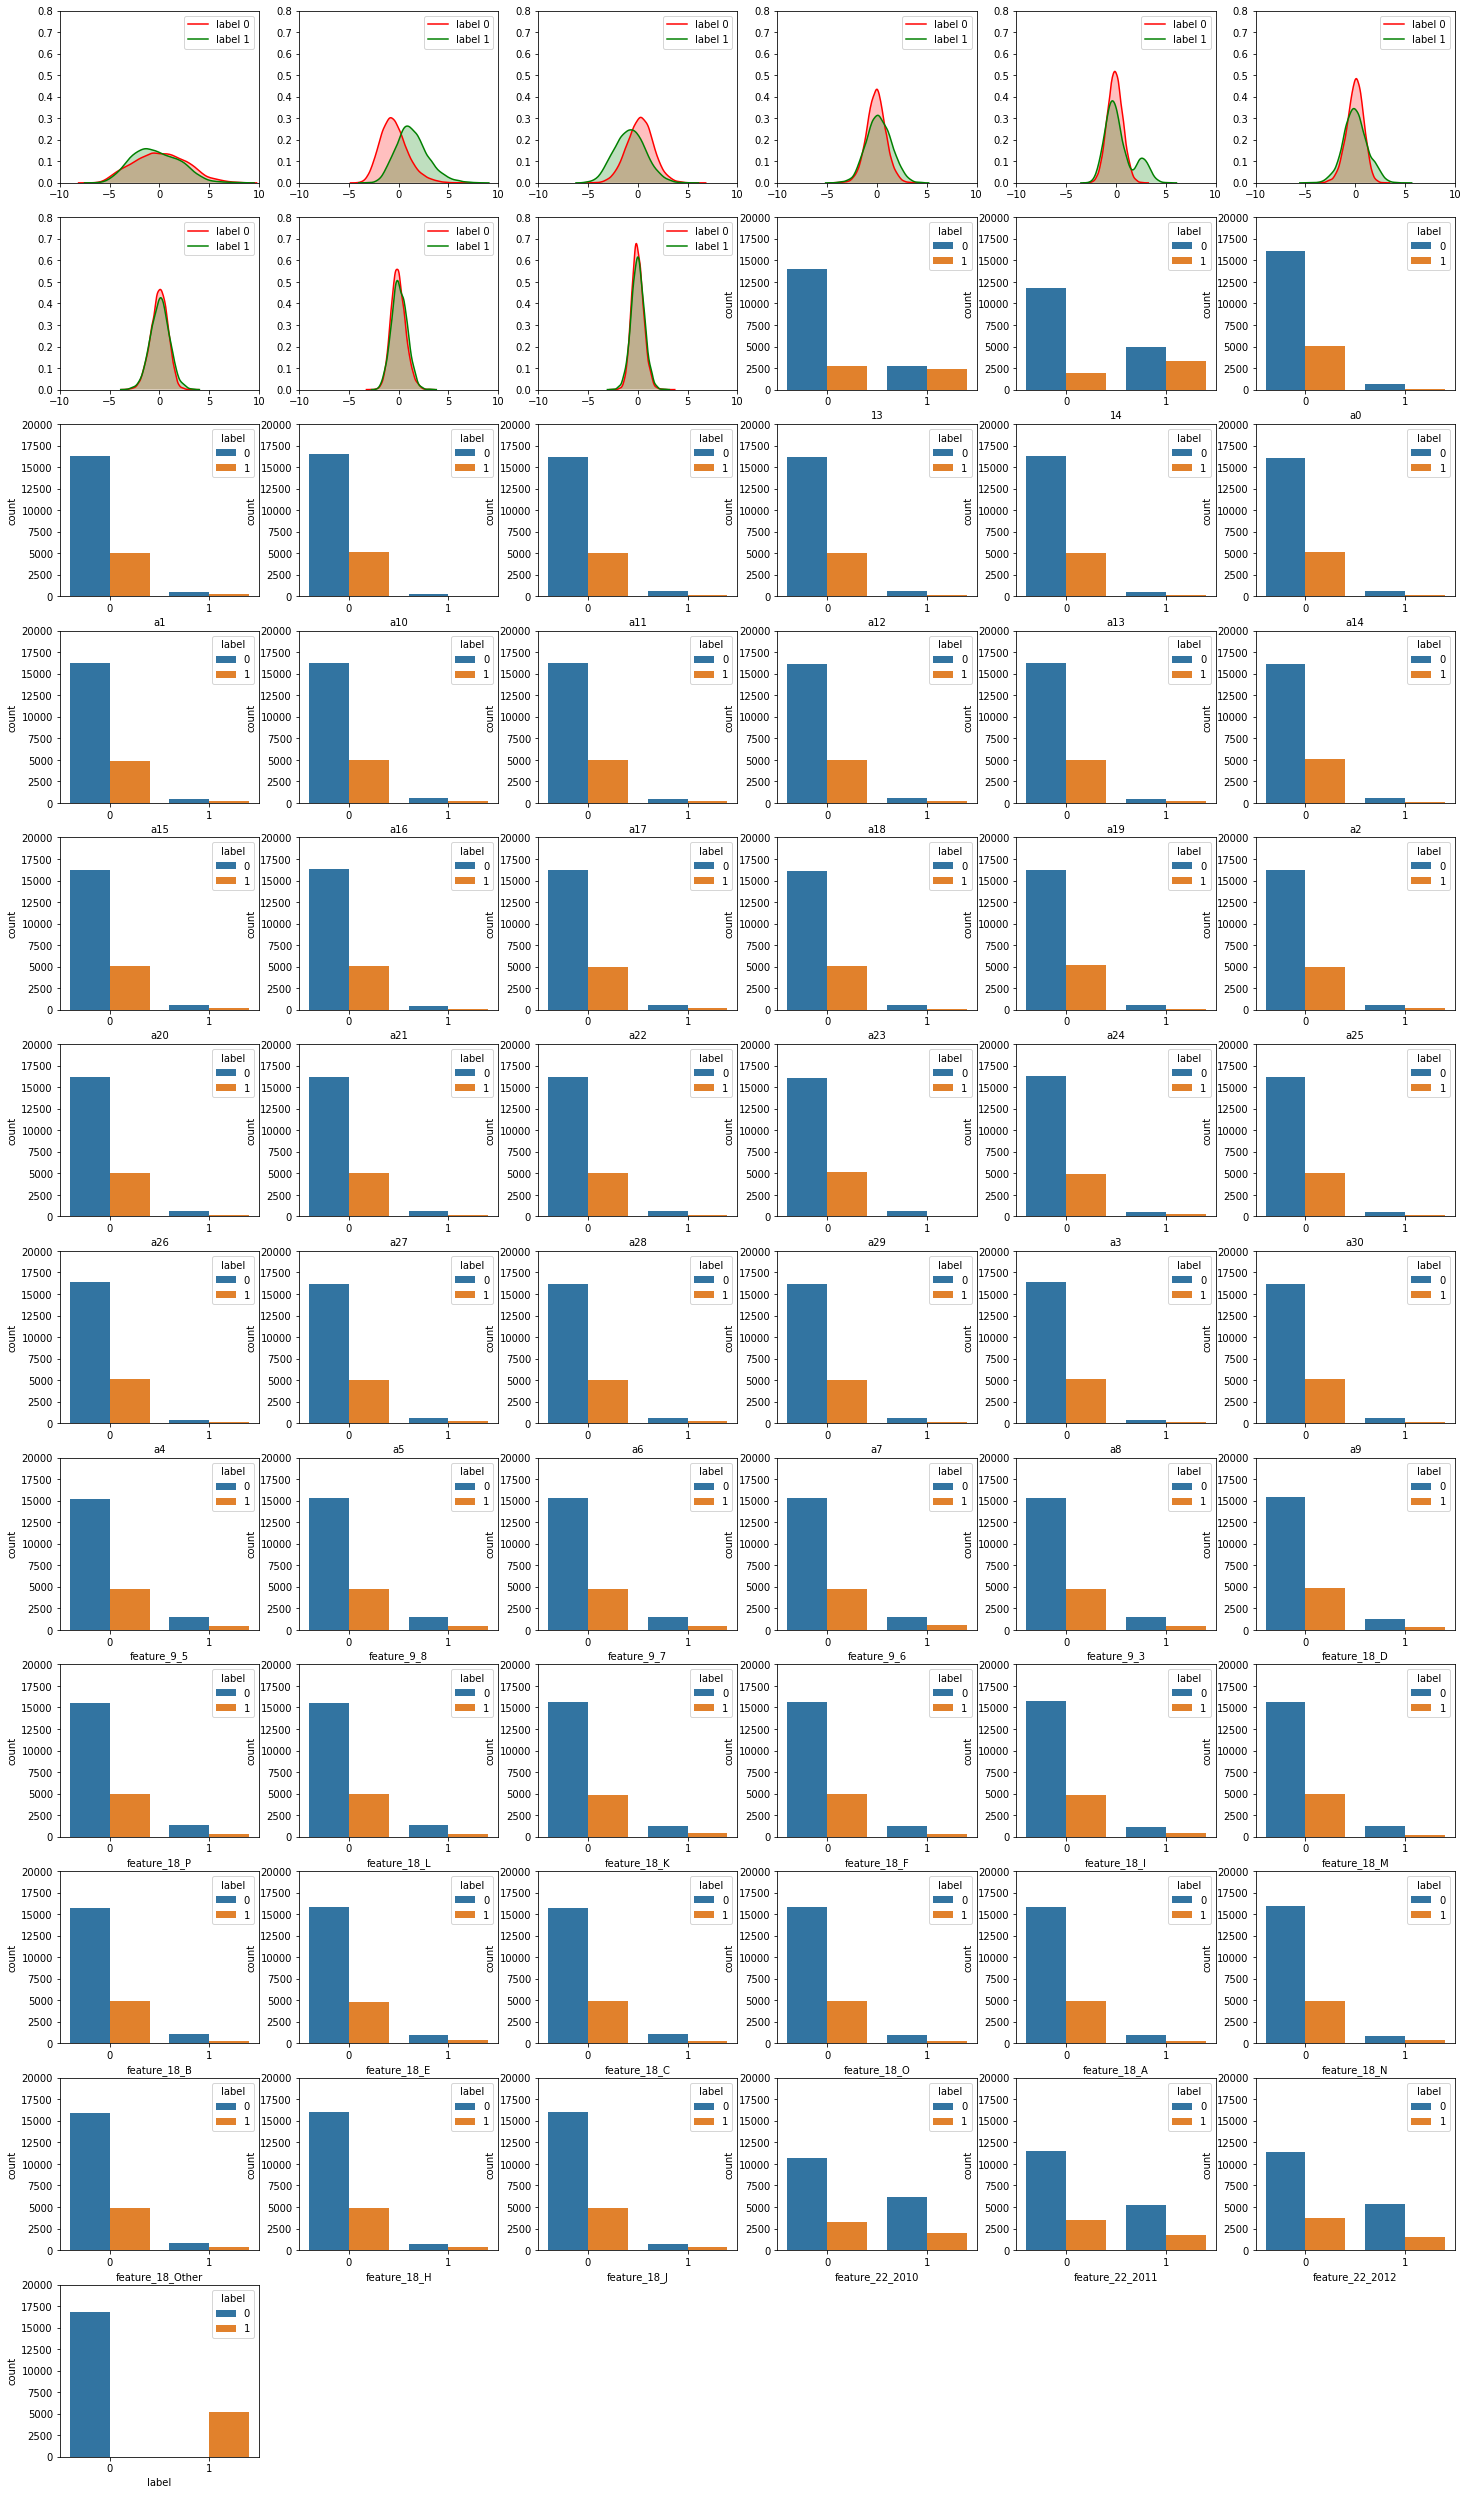

In [142]:
fig = plt.figure(figsize = (25, 45))
j = 0
for feature in final_train_set.columns:
    plt.subplot(12, 6, j+1)
    j += 1
    if final_train_set[feature].dtype == 'float64':
        sns.kdeplot(final_train_set[feature][final_train_set['label'] == 0], color='r', label = 'label 0', shade=True)  
        sns.kdeplot(final_train_set[feature][final_train_set['label'] == 1], color='g', label = 'label 1', shade=True)
        plt.legend(loc='upper right')
        plt.ylim(0,0.8)
        plt.xlim(-10,10)
    else:
        countplt = sns.countplot(x = feature, hue = 'label', data = final_train_set)
        plt.ylim(0, 20000)
        plt.legend(title='label', loc='upper right')
plt.show()

<hr>
<br/><br/><br/>

<h1>3. Bulilding Models</h1>

Let's setup a time list for time measurements:

In [143]:
running_time = []

<h2>3.1. Initial Models Setup</h2>

We have chosen two initial models: (Gaussian) Naive Bayes and Logistic Regression.

<h3>3.1.1. (Gaussian) Naive Bayes</h3>

In [144]:
start = time.time()
GaussianNaiveBayes_options = {'priors' : [None], 
          'var_smoothing' : [ 1e-9, 1e-7, 1e-5, 1e-3, 0.1, 1, 3]
              }

# Setup classifier, and find using GridsearchCV the best hyper-parameters
skf = KFold(n_splits=5)
GNB_best = GridSearchCV(GaussianNB(), GaussianNaiveBayes_options, cv=skf, scoring='roc_auc', n_jobs = -2)
GNB_best.fit(X_final_train, Y_final_train)

print ('GNB chosen parameters (recieved best AUC): {}'.format(GNB_best.best_params_))
print ("GNB AUC score with the chosen parameters: ", GNB_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)

GNB chosen parameters (recieved best AUC): {'priors': None, 'var_smoothing': 0.1}
GNB AUC score with the chosen parameters:  0.8721231309700727
Running time: 0.0400595227877299 minutes


In [145]:
# final setting
GNB = GaussianNB(**GNB_best.best_params_)

<h3>3.1.2. Logistic Regression</h3>

**In order to ensure we have the best hyperparameters chosen,<br/> Let's setup the Logistic Regression classifier with the best hyperparameters using GridSearchCV:**

In [146]:
start = time.time()
LogisticRegression_options = {'penalty' : ['l1', 'l2'],
                              'C' : [ 0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                              'tol' : [ 0.1, 0.01, 0.001 ],
                              'max_iter' : [2000],
                              'solver' : ["liblinear"]}

# Setup classifier, and find using GridsearchCV the best hyper-parameters
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
LR_best = GridSearchCV(LogisticRegression(), LogisticRegression_options,  scoring = 'roc_auc', n_jobs = -2 )
LR_best.fit(X_final_train, Y_final_train)

print ('Logistic Regression chosen parameters (recieved best AUC): {}'.format(LR_best.best_params_))
print ("Logistic Regression AUC score with the chosen parameters: ", LR_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)

Logistic Regression chosen parameters (recieved best AUC): {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Logistic Regression AUC score with the chosen parameters:  0.8822394129625357
Running time: 0.10294134616851806 minutes


In [147]:
# final setting
LR = LogisticRegression(**LR_best.best_params_)

<h3>3.1.3. KNN - Not Used</h3>

**We've found that this model doesn't fit well the data (overfitting), so we decided not to use it.**

In [148]:
"""start = time.time()
KNN_options = {'n_neighbors' : [5,15,25], 
               'weights' : [ 'uniform', 'distance'],
               'metric' : ['euclidean', 'manhattan'],
              }

# new approach: k = sqrt(num_of_samples)

# Setup classifier, and find using GridsearchCV the best hyper-parameters
kfold = KFold(n_splits = 5)
KNN_best = GridSearchCV(KNeighborsClassifier(), KNN_options, cv=kfold,  scoring='roc_auc', n_jobs = -2)

KNN_best.fit(X_final_train, Y_final_train)

print ('KNN chosen parameters (recieved best AUC): {}'.format(KNN_best.best_params_))
print ("KNN AUC score with the chosen parameters: ", KNN_best.best_score_)
total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)
"""

'start = time.time()\nKNN_options = {\'n_neighbors\' : [5,15,25], \n               \'weights\' : [ \'uniform\', \'distance\'],\n               \'metric\' : [\'euclidean\', \'manhattan\'],\n              }\n\n# new approach: k = sqrt(num_of_samples)\n\n# Setup classifier, and find using GridsearchCV the best hyper-parameters\nkfold = KFold(n_splits = 5)\nKNN_best = GridSearchCV(KNeighborsClassifier(), KNN_options, cv=kfold,  scoring=\'roc_auc\', n_jobs = -2)\n\nKNN_best.fit(X_final_train, Y_final_train)\n\nprint (\'KNN chosen parameters (recieved best AUC): {}\'.format(KNN_best.best_params_))\nprint ("KNN AUC score with the chosen parameters: ", KNN_best.best_score_)\ntotal_time = (time.time()-start)/60\nprint("Running time: %s minutes" % (total_time))\nrunning_time.append(total_time)\n'

In [149]:
# final setting
"""
KNN = KNeighborsClassifier(**KNN_best.best_params_)
"""

'\nKNN = KNeighborsClassifier(**KNN_best.best_params_)\n'

<h2>3.2. Advanced Models Setup</h2>

We have chosen two advanced models: Multi-Layer Perceptron (ANN) and Adaptive Boosting (AdaBoost).

<span id='ann'><h3>3.2.1. Multi-Layer Perceptron (ANN)</h3></span>

**In order to ensure we have the best hyperparameters chosen,<br/> Let's setup the MLP classifier with the best hyperparameters using GridSearchCV:**

In [150]:
start = time.time()
ANN_options = {'activation' : ["relu"], #
               'hidden_layer_sizes' : [(10,),                # 1 small hidden layer
                                       (20,),                # another 1 small hidden layer
                                       (50, 50),             # 2 medium size layers
                                       (20, 20, 10, 10, 10), # five small layers
                                       (100,)],              # 1 big hidden layer
               'learning_rate_init' : [0.01, 0.001], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
               'random_state' :[100], # for consistent results
               'max_iter': [2000],
              }

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
ANN_best = GridSearchCV(MLPClassifier(), ANN_options, cv=kfold, scoring = 'roc_auc', n_jobs=-2)
ANN_best.fit(X_final_train, Y_final_train)
print ('ANN chosen parameters (recieved best AUC): {}'.format(ANN_best.best_params_))
print ("ANN AUC score with the chosen parameters: ", ANN_best.best_score_)


total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)

ANN chosen parameters (recieved best AUC): {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001, 'max_iter': 2000, 'random_state': 100}
ANN AUC score with the chosen parameters:  0.9038793652782535
Running time: 7.700419616699219 minutes


In [151]:
# final setting
ANN = MLPClassifier(**ANN_best.best_params_)

<h3>3.2.2. Adaptive Boosting (AdaBoost)</h3>

**In order to ensure we have the best hyperparameters chosen,<br/> Let's setup the MLP classifier with the best hyperparameters using GridSearchCV:**

In [152]:
start = time.time()
parametersOptions = {'n_estimators':[500,1000],
                     'learning_rate': [0.01,0.1,0.3],
                    'random_state' :[100]}

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
ADB_best = GridSearchCV(AdaBoostClassifier(), parametersOptions, cv = kfold, scoring='roc_auc',n_jobs = -2)
ADB_best.fit(X_final_train, Y_final_train)
print ('Adaptive Boosting chosen parameters (recieved best AUC): {}'.format(ADB_best.best_params_))
print ("Adaptive Boosting AUC score with the chosen parameters: ", ADB_best.best_score_)


total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)

Adaptive Boosting chosen parameters (recieved best AUC): {'learning_rate': 0.1, 'n_estimators': 1000, 'random_state': 100}
Adaptive Boosting AUC score with the chosen parameters:  0.888308066475112
Running time: 5.357397683461508 minutes


In [153]:
# final setting
ADB = AdaBoostClassifier(**ADB_best.best_params_)

<h3>3.2.3. Random Forest - Not Used</h3>

**We've found that this model doesn't fit well the data (overfitting), so we decided not to use it.**

In [154]:
"""
start = time.time()
parametersOptions = {'min_samples_split':[4, 8, 16], 
                     'max_depth':[5,8,30,50],
                     'criterion':['gini', 'entropy'],
                     'n_estimators':[30,100],
                     'random_state': [100]}

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
RF_best = GridSearchCV(RandomForestClassifier(), parametersOptions, cv = kfold, scoring='roc_auc',n_jobs = -2)
RF_best.fit(X_final_train, Y_final_train)
print ('ANN chosen parameters (recieved best AUC): {}'.format(RF_best.best_params_))
print ("ANN AUC score with the chosen parameters: ", RF_best.best_score_)

total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)
"""

'\nstart = time.time()\nparametersOptions = {\'min_samples_split\':[4, 8, 16], \n                     \'max_depth\':[5,8,30,50],\n                     \'criterion\':[\'gini\', \'entropy\'],\n                     \'n_estimators\':[30,100],\n                     \'random_state\': [100]}\n\n# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default\nkfold = KFold(n_splits = 5, shuffle = True, random_state=100)\nRF_best = GridSearchCV(RandomForestClassifier(), parametersOptions, cv = kfold, scoring=\'roc_auc\',n_jobs = -2)\nRF_best.fit(X_final_train, Y_final_train)\nprint (\'ANN chosen parameters (recieved best AUC): {}\'.format(RF_best.best_params_))\nprint ("ANN AUC score with the chosen parameters: ", RF_best.best_score_)\n\ntotal_time = (time.time()-start)/60\nprint("Running time: %s minutes" % (total_time))\nrunning_time.append(total_time)\n'

In [155]:
# final setting
"""
RF = RandomForestClassifier(**RF_best.best_params_)
"""

'\nRF = RandomForestClassifier(**RF_best.best_params_)\n'

<h3>3.2.4. Support Vector Machines - Not Used</h3>

**We've found that this model doesn't fit well the data, so we decided not to use it.**

In [156]:
"""
start = time.time()
parametersOptions = {'C': [0.001, 0.01, 0.1, 1, 10],
                     'gamma' : [0.001, 0.01, 0.1, 1],
                    'kernel': ['linear'],
                    'probability': [True]}

# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default
kfold = KFold(n_splits = 5, shuffle = True, random_state=100)
SVM_best = GridSearchCV(svm.SVC(), parametersOptions, cv = kfold, scoring='roc_auc',n_jobs = -2)
SVM_best.fit(X_final_train, Y_final_train)
print ('SVM chosen parameters (recieved best AUC): {}'.format(SVM_best.best_params_))
print ("SVM AUC score with the chosen parameters: ", SVM_best.best_score_)

total_time = (time.time()-start)/60
print("Running time: %s minutes" % (total_time))
running_time.append(total_time)
"""

'\nstart = time.time()\nparametersOptions = {\'C\': [0.001, 0.01, 0.1, 1, 10],\n                     \'gamma\' : [0.001, 0.01, 0.1, 1],\n                    \'kernel\': [\'linear\'],\n                    \'probability\': [True]}\n\n# Setup classifier, and find using GridsearchCV the best hyper-parameters with kfold=5 as default\nkfold = KFold(n_splits = 5, shuffle = True, random_state=100)\nSVM_best = GridSearchCV(svm.SVC(), parametersOptions, cv = kfold, scoring=\'roc_auc\',n_jobs = -2)\nSVM_best.fit(X_final_train, Y_final_train)\nprint (\'SVM chosen parameters (recieved best AUC): {}\'.format(SVM_best.best_params_))\nprint ("SVM AUC score with the chosen parameters: ", SVM_best.best_score_)\n\ntotal_time = (time.time()-start)/60\nprint("Running time: %s minutes" % (total_time))\nrunning_time.append(total_time)\n'

In [157]:
# final setting
#SVM = svm.SVC(**SVM_best.best_params_)

---

<h2>Total Running Time measure</h2>

In [158]:
print("Total models' running time: %s minutes"% (sum(running_time)))

Total models' running time: 13.200818169116975 minutes


<hr>
<br/><br/><br/>

<h1>4. Models Evaluation</h1>

- **We will now evaluate each model using K-Fold Cross Validation. Each K-fold will be plotted in a ROC graph, where we'll calculate the AUC for the performance comparison between the models.**
- **Then, we will calculate a score for each model <br/>(where classifing wrongly a "1" target is 5 times more severe than classifing wrongly a "0" target)**
- **At the end, we will measure the performance as well as overfitting for each model, in order to decide what model will be used for prediction.**

For that matter, let's define a dedicated function for plotting a ROC graph:

In [159]:
def KfoldProcess(X, y, clf, k):
    """
    This function trains the model using the k-folds
    X - X_train, the data to train the model
    y - Y_train, the target data
    clf - The classifier to train
    k - Number of folds to process
    """
    
    ##############################################################
    # Set KFolds with a random state for consistent results
    ##############################################################
    kf = KFold(n_splits = k, shuffle = True, random_state=100)
    
    ##############################################################
    # we catch the tpr and fpr since we need to interpolate data
    ##############################################################
    # Validation set:
    tpr_test, fpr_test, auc_test = [],[],[]
    # Train set:
    tpr_train, fpr_train, auc_train = [],[],[]
    
    ##############################################################
    # mean accuracy and tpr (of test)
    ##############################################################
    accuracy_test = []
    mean_tpr,mean_fpr = 0.0, np.linspace(0,1,100)
    
    # for confusion matrix plot
    fig, ax = plt.subplots(1,5,figsize=(25,5))
    cm = 0 # counter for ax instance
    
    # for confusion matrix values capture
    confusion_matrix_values = {'tp': 0, 'fp': 0, 'fn': 0, 'tn': 0}
    
    for train_index,test_index in kf.split(X):
        ##############################################################
        #Splitting into train and validation, based on the current fold.
        ##############################################################
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        ##############################################################
        # Training the model using current fold
        ##############################################################
        clf.fit(X_train,y_train)
        
        ##############################################################
        # Predict current trained model using the validation set
        ##############################################################
        prob_prediction = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, prob_prediction) #getting fpr, tpr and threshold
                
        ##############################################################
        # Catch accuracy, tpr, fpr, auc
        ##############################################################
        prediction = clf.predict(X_test)
        accuracy_test.append(accuracy_score(prediction,y_test))
        
        ##############################################################
        # We interpolate the mean_tpr so all of the classifiers will be working under the same thersholds.
        ##############################################################
        tpr_interp = np.interp(np.linspace(0,1,100), fpr, tpr)
        fpr_interp = np.linspace(0,1,100)
        tpr_test.append(tpr)
        fpr_test.append(fpr)
        auc_test.append(auc(fpr_interp,tpr_interp))
        
        mean_tpr += interp(mean_fpr,fpr,tpr)
        mean_tpr[0] = 0.0
        
        ##############################################################
        # Check for overfitting using the train set:
        ##############################################################
        # Predict current trained model using the train set
        prob_prediction = clf.predict_proba(X_train)[:,1]
        fpr, tpr, thresholds = roc_curve(y_train, prob_prediction) #getting fpr, tpr and threshold
        
        tpr_interp = np.interp(np.linspace(0,1,100), fpr, tpr)
        fpr_interp = np.linspace(0,1,100)
        auc_train.append(auc(fpr_interp,tpr_interp))
        
        tpr_train.append(tpr)
        fpr_train.append(fpr)
        
        
        ##############################################################
        # plot confusion matrix for current fold
        ##############################################################
        plot_confusion_matrix(clf, X_test, y_test, values_format="d", ax=ax[cm]) # confusion matrix for current fold's test set
        ax[cm].set_title("Confusion Matrix for fold #%s"%(cm+1))
        ax[cm].invert_xaxis()
        ax[cm].invert_yaxis()
        cm+=1
        
        
        ##############################################################
        # catch tn, fp, fn, tp from the confusion matrix
        ##############################################################
        tn, fp, fn, tp =  confusion_matrix(prediction,y_test).ravel()
        confusion_matrix_values['tp'] += tp
        confusion_matrix_values['fp'] += fp
        confusion_matrix_values['fn'] += fn
        confusion_matrix_values['tn'] += tn
    
    ##############################################################
    # Calculation of the mean TPR, mean AUC and mean accuracy
    ##############################################################
    mean_tpr = mean_tpr/k # mean of all tpr
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr,mean_tpr) # Area Under the Curve of the ROC
    accuracy_mean = np.mean(accuracy_test, axis=0)
    plt.show()
    return [tpr_test, fpr_test, mean_tpr, mean_auc, auc_test, 
            tpr_train, fpr_train, auc_train, accuracy_mean, 
            accuracy_test, confusion_matrix_values]

In [160]:
def kFoldPlot(tpr_test, fpr_test, mean_tpr, mean_auc, auc_test,
              tpr_train, fpr_train, auc_train, accuracy_mean, accuracy_test, confusion_matrix_values):
    fig, ax = plt.subplots(2,2,figsize=(18,14))
    
    ##############################################################
    # Graph #1: Plot ROC and mean AUC of all folds
    ##############################################################
    ax[0,0].plot([0,1],[0,1],color = "blue", linestyle = '--')
    ax[0,0].set_title("ROC and mean AUC of all folds")
    ax[0,0].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_test)):
        ax[0,0].plot(fpr_test[i], tpr_test[i], color = 'grey')
    ax[0,0].plot([0],[0],color='grey', label='K-Folds')
    ax[0,0].plot(np.linspace(0,1,100), mean_tpr, color="red", linestyle='-', label='Mean ROC (area = %0.4f)' % mean_auc)
    ax[0,0].legend(loc="lower right")
    
    ##############################################################
    # Graph #2: Plot ROC and AUC for every fold - Validation set
    ##############################################################
    ax[0,1].plot([0,1],[0,1],color = "blue", linestyle = '--')
    ax[0,1].set_title("ROC and AUC for every fold - Validation set")
    ax[0,1].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_test)):
        ax[0,1].plot(fpr_test[i], tpr_test[i], label = 'Fold %s (area = %0.4f)' % (str(i+1),auc_test[i]))   
    ax[0,1].legend(loc="lower right")
    
    ##############################################################
    # Graph #3: Plot ROC and AUC for every fold - Train set
    ##############################################################
    ax[1,0].plot([0,1],[0,1],color = "blue", linestyle = '--')
    ax[1,0].set_title("OVERFITTING CHECK: ROC and AUC for every fold - Train set")
    ax[1,0].set(xlabel='False Positive Rate',ylabel='True Positive Rate')
    for i in range(len(tpr_train)):
        ax[1,0].plot(fpr_train[i], tpr_train[i], label = 'Fold %s (area = %0.4f)' % (str(i+1),auc_train[i]))
    ax[1,0].legend(loc="lower right")
    
    ##############################################################
    # Graph #4: Accuracy vs K-Folds
    ##############################################################
    ax[1,1].bar(range(1,len(accuracy_test)+1),accuracy_test)
    for index, value in enumerate(accuracy_test): # print the value on each bar
        current_accuracy = '{:.2%}'.format(value)
        plt.text(x=index+0.78, y=value+0.01, s=current_accuracy)
    ax[1,1].set_ylim([0.65,1])
    ax[1,1].axhline(0.85,c='g')
    ax[1,1].set_title("Accuracy vs. K-Folds")
    ax[1,1].set(xlabel='K-Folds',ylabel='Accuracy')
    
    plt.show()
    print("Mean Accuracy: %0.8f" %(accuracy_mean))
    
    ##############################################################
    # the 2nd accuracy measurement calculation
    ##############################################################
    extra_accuracy = (confusion_matrix_values['tp']+confusion_matrix_values['tn'])/\
          (confusion_matrix_values['tp']+confusion_matrix_values['tn']+confusion_matrix_values['fp']+5*confusion_matrix_values['fn'])
    
    print("Mean accuracy, where classifing wrongly a 1 target is 5 times more severe than classifying wrongly a 0 target: %0.8f"\
          %(extra_accuracy))

    print("Mean AUC Test: %0.8f\nMean AUC Train: %0.8f\nDifference between AUC: %0.8f" % (mean_auc,np.mean(auc_train),abs(mean_auc-np.mean(auc_train))))
    
    # overfitting string
    overfitting = ""
    if np.mean(auc_train) - mean_auc >= 0.1: # overfitting occurs where the difference between the test AUC and the train AUC is at least 0.1
        overfitting = "Overfitting"
    else:
        overfitting = "No Overfitting"
    
    return [mean_tpr,mean_auc],[mean_auc, np.mean(auc_train), overfitting, accuracy_mean, extra_accuracy]

<h4>Define models evaluation dictionary + an auc graph summary</h4>

In [161]:
models_evaluation = {}
rocauc_final_graph = {}

---

<h2>4.1. Initial Models Evaluation</h2>

<h2>4.1.1. Evaluating (Gaussian) Naive Bayes</h2>

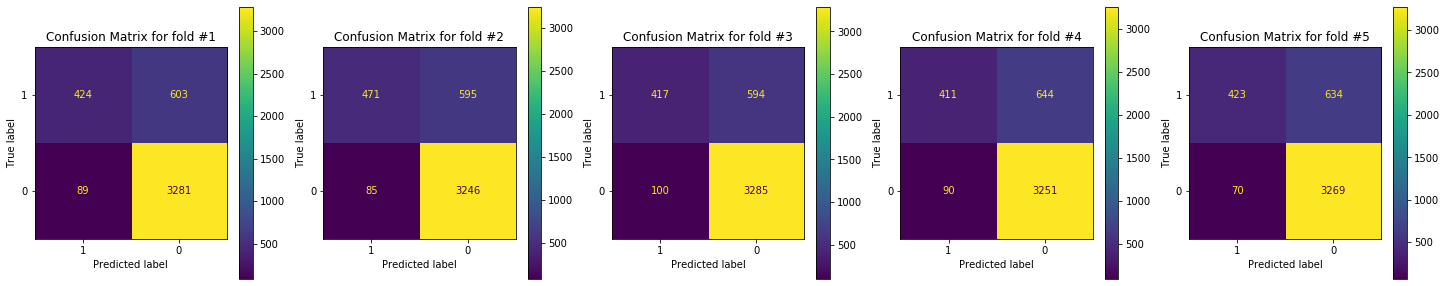

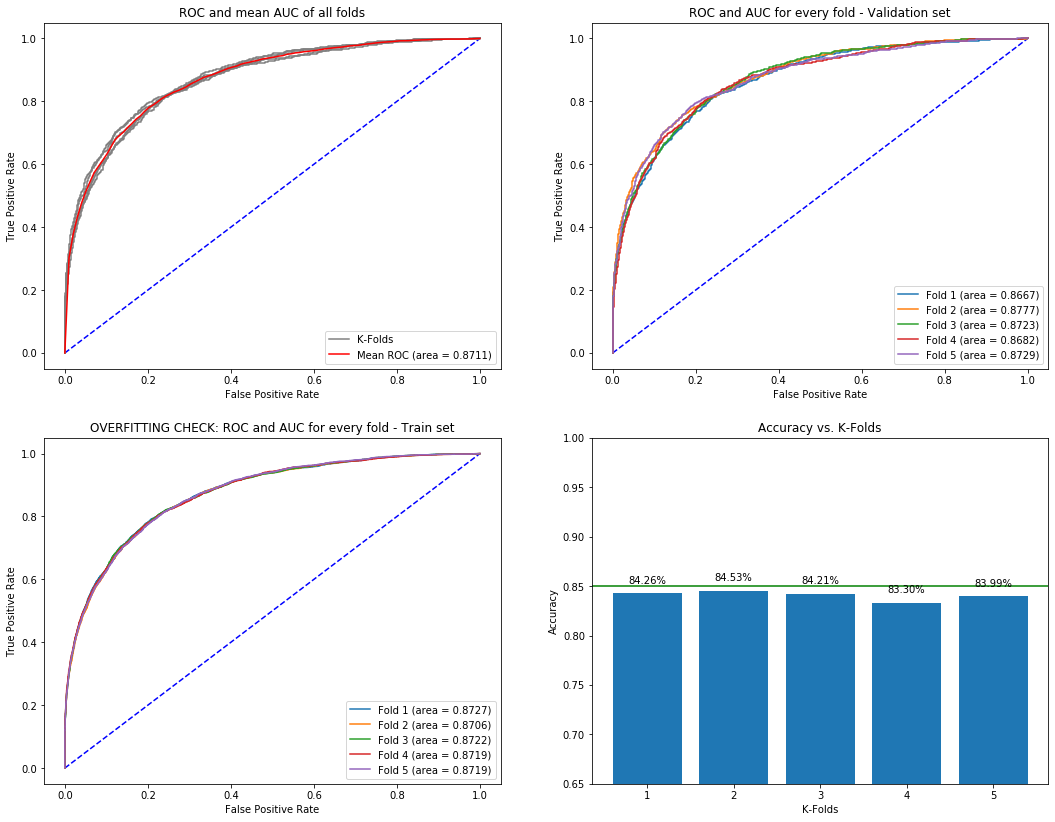

Mean Accuracy: 0.84059654
Mean accuracy, where classifing wrongly a 1 target is 5 times more severe than classifying wrongly a 0 target: 0.77907075
Mean AUC Test: 0.87111697
Mean AUC Train: 0.87184609
Difference between AUC: 0.00072912


In [162]:
parameters = KfoldProcess(X_final_train.values, Y_final_train.values, GNB, 5)
rocauc_final_graph["Gaussian Naive Bayes"], models_evaluation["Gaussian Naive Bayes"] = kFoldPlot(*parameters)

<h2>4.1.2. Evaluating Logistic Regression</h2>

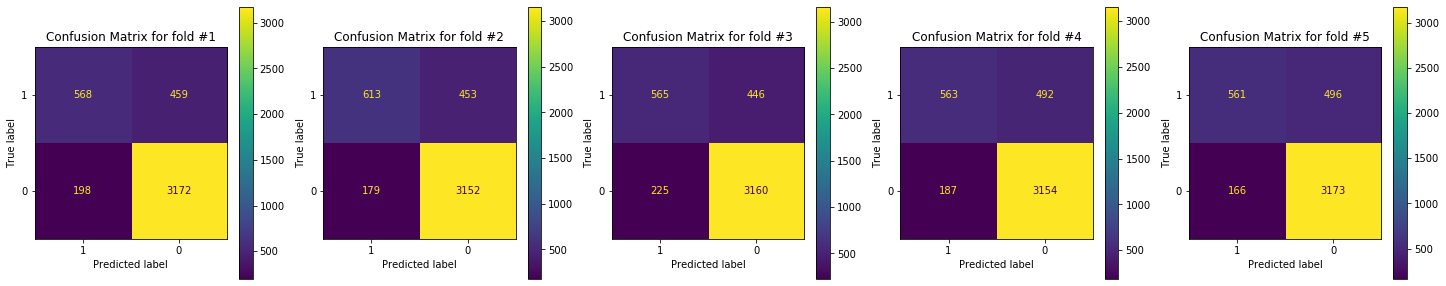

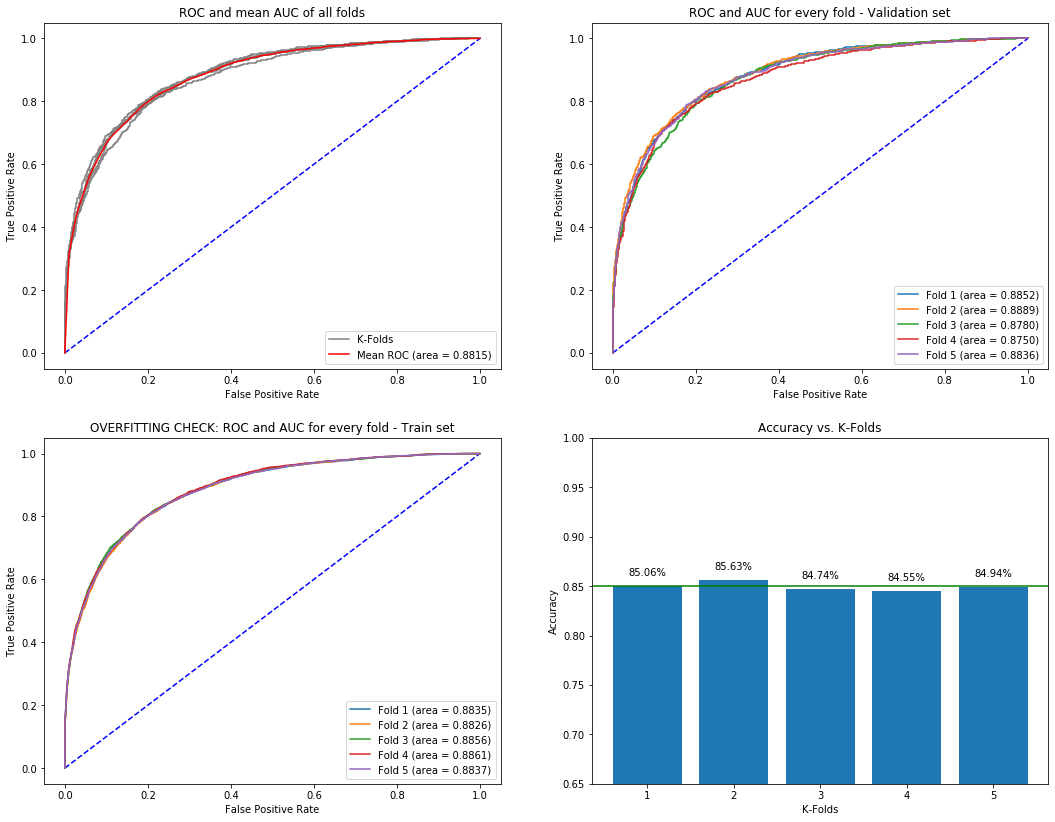

Mean Accuracy: 0.84983135
Mean accuracy, where classifing wrongly a 1 target is 5 times more severe than classifying wrongly a 0 target: 0.72401364
Mean AUC Test: 0.88154591
Mean AUC Train: 0.88432259
Difference between AUC: 0.00277668


In [163]:
parameters = KfoldProcess(X_final_train.values, Y_final_train.values, LR, 5)
rocauc_final_graph["Logistic Regression"], models_evaluation["Logistic Regression"] = kFoldPlot(*parameters)

<h2><i>4.1.3 Evaluating KNN - Not Used</i></h2>

In [164]:
#parameters = KfoldProcess(X_final_train.values, Y_final_train.values, KNN, 5)
#rocauc_final_graph["K Nearest Neighbors"], models_evaluation["K Nearest Neighbors"] = kFoldPlot(*parameters)

---

<h2>4.2. Advanced Models Evaluation</h2>

<h2>4.2.1. Evaluating Multi-Layer Perceptron (ANN)</h2>

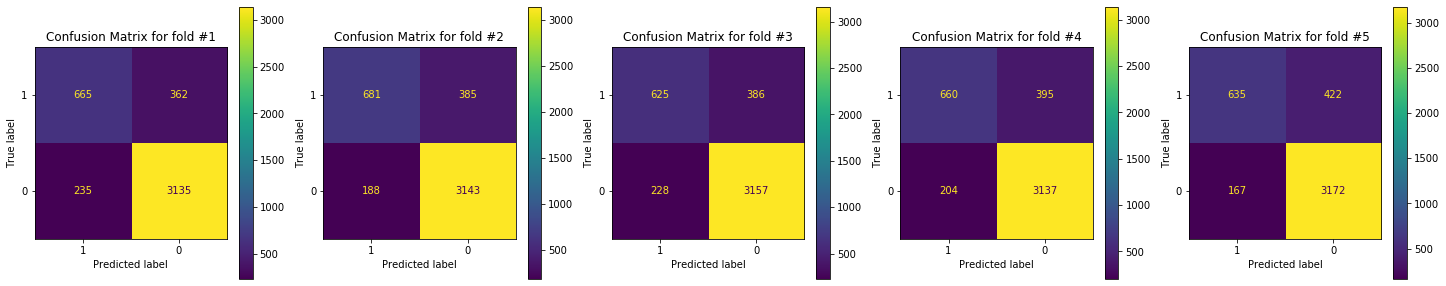

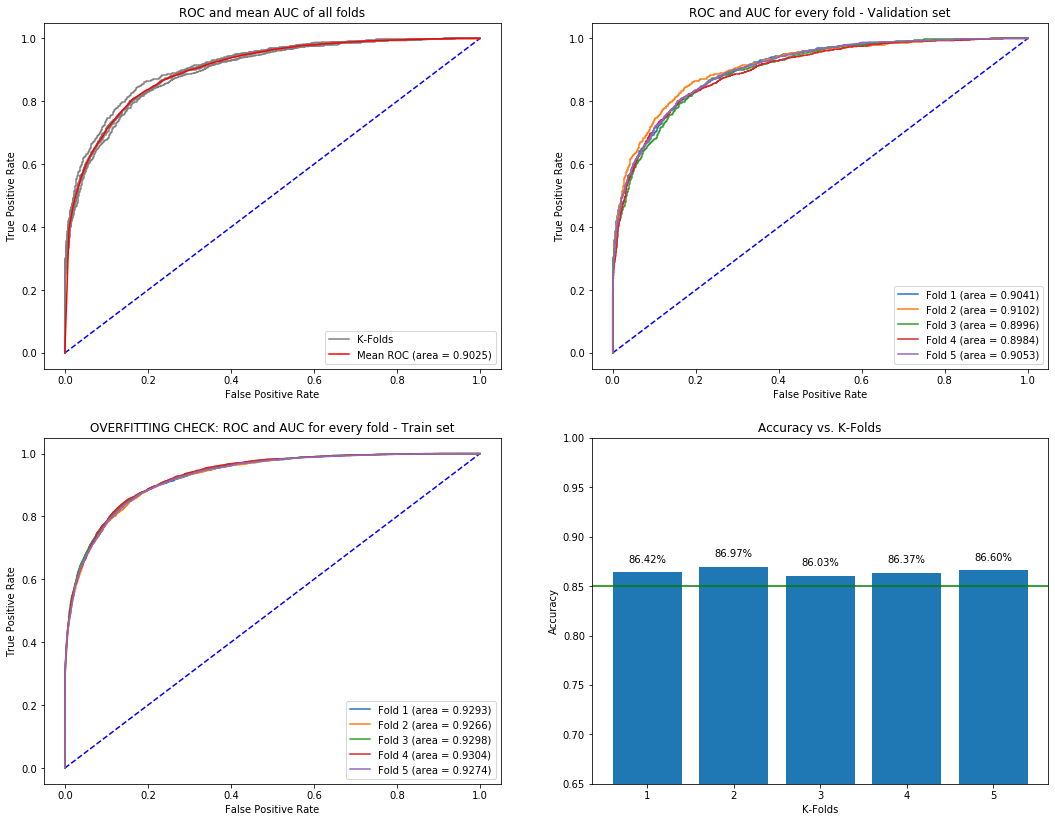

Mean Accuracy: 0.86479828
Mean accuracy, where classifing wrongly a 1 target is 5 times more severe than classifying wrongly a 0 target: 0.72919064
Mean AUC Test: 0.90248486
Mean AUC Train: 0.92869046
Difference between AUC: 0.02620560


In [165]:
parameters = KfoldProcess(X_final_train.values, Y_final_train.values, ANN, 5)
rocauc_final_graph["Artificial Neural Networks"], models_evaluation["Artificial Neural Networks"] = kFoldPlot(*parameters)

<h2>4.2.2. Evaluating Adaptive Boosting (AdaBoost)</h2>

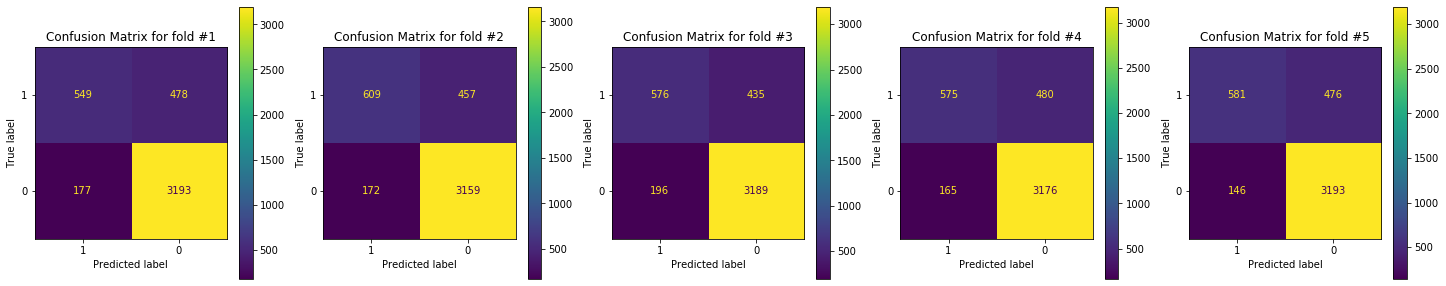

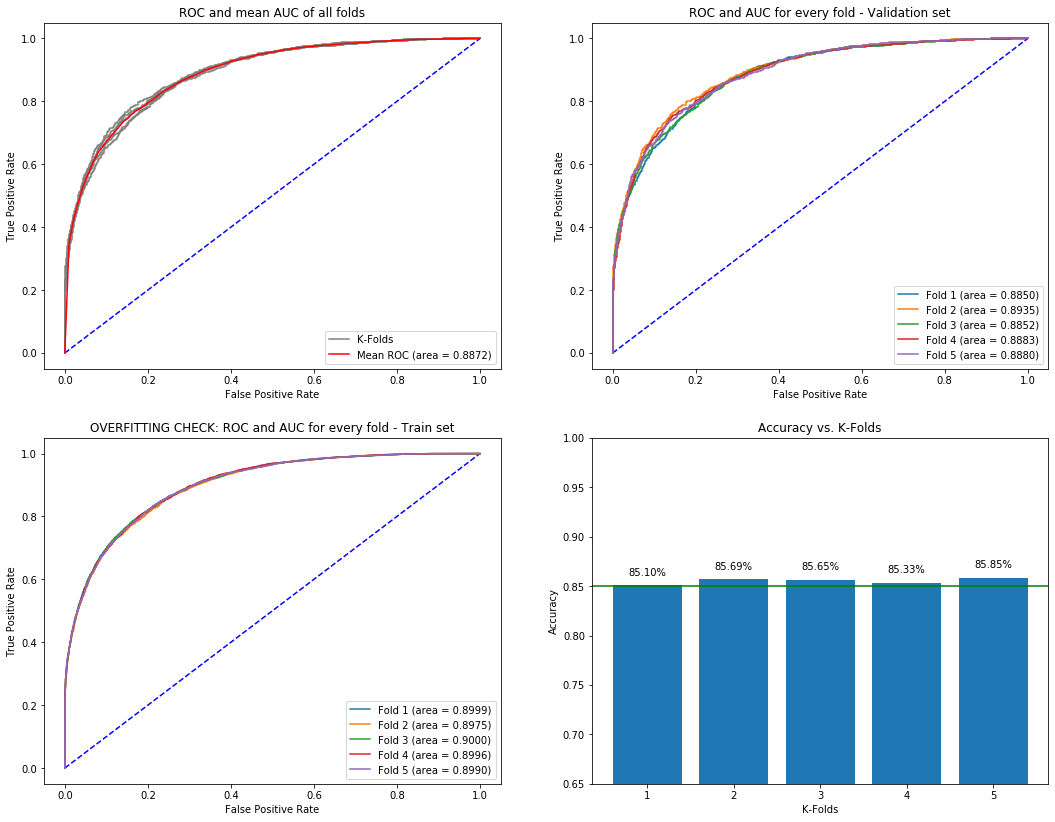

Mean Accuracy: 0.85524531
Mean accuracy, where classifing wrongly a 1 target is 5 times more severe than classifying wrongly a 0 target: 0.73998268
Mean AUC Test: 0.88720830
Mean AUC Train: 0.89919722
Difference between AUC: 0.01198892


In [166]:
parameters = KfoldProcess(X_final_train.values, Y_final_train.values, ADB, 5)
rocauc_final_graph["Adaptive Boosting"], models_evaluation["Adaptive Boosting"] = kFoldPlot(*parameters)

<h2><i>4.2.3. Evaluating Random Forest - Not Used</i></h2>

In [167]:
#parameters = KfoldProcess(X_final_train.values, Y_final_train.values, RF, 5)
#rocauc_final_graph["Random Forest"], models_evaluation["Random Forest"] = kFoldPlot(*parameters)

<h2><i>4.2.4. Evaluating Support Vector Machines - Not Used</i></h2>

In [168]:
#parameters = KfoldProcess(X_final_train.values, Y_final_train.values, SVM, 5)
#rocauc_final_graph["Random Forest"], models_evaluation["Support Vector Machines"] = kFoldPlot(*parameters)

<hr>
<br/><br/><br/>

<h1>5. Chosen Model + Prediction Probabilities</h1>

<b>Let's overview our models:</b><br/>
<h3>Mean ROC and AUC graph comparison</h3>

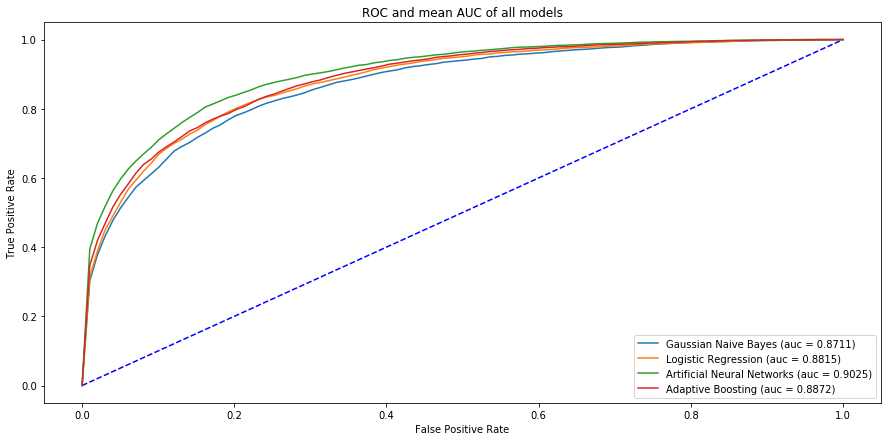

In [169]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot([0,1],[0,1],color = "blue", linestyle = '--')
plt.title("ROC and mean AUC of all models")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for model in rocauc_final_graph:
    plt.plot(np.linspace(0,1,100), rocauc_final_graph[model][0], linestyle='-', label='%s (auc = %0.4f)' % (model,rocauc_final_graph[model][1]))
    plt.legend(loc="lower right")

plt.show()

<h3>Evaluation Summary Table</h3>

In [170]:
evaluation_table = pd.DataFrame.from_dict(models_evaluation, orient='index',
                       columns=['Mean AUC on test', 'Mean AUC on train', 'Overfitting Status', 'Accuracy', '2nd Accuracy'])

<h3>Evaluation by AUC</h3>

In [171]:
evaluation_table.sort_values(by='Mean AUC on test', ascending=False, inplace=True)
evaluation_table

Mean AUC on test  Mean AUC on train  \
Artificial Neural Networks          0.902485           0.928690   
Adaptive Boosting                   0.887208           0.899197   
Logistic Regression                 0.881546           0.884323   
Gaussian Naive Bayes                0.871117           0.871846   

                           Overfitting Status  Accuracy  2nd Accuracy  
Artificial Neural Networks     No Overfitting  0.864798      0.729191  
Adaptive Boosting              No Overfitting  0.855245      0.739983  
Logistic Regression            No Overfitting  0.849831      0.724014  
Gaussian Naive Bayes           No Overfitting  0.840597      0.779071

In [172]:
print("The model with the best mean AUC: %s"%(evaluation_table.index[0]))

The model with the best mean AUC: Artificial Neural Networks


<h3>Evaluation by the 2nd Accuracy Measurement</h3>

In [173]:
evaluation_table.sort_values(by='2nd Accuracy', ascending=False, inplace=True)
evaluation_table

Mean AUC on test  Mean AUC on train  \
Gaussian Naive Bayes                0.871117           0.871846   
Adaptive Boosting                   0.887208           0.899197   
Artificial Neural Networks          0.902485           0.928690   
Logistic Regression                 0.881546           0.884323   

                           Overfitting Status  Accuracy  2nd Accuracy  
Gaussian Naive Bayes           No Overfitting  0.840597      0.779071  
Adaptive Boosting              No Overfitting  0.855245      0.739983  
Artificial Neural Networks     No Overfitting  0.864798      0.729191  
Logistic Regression            No Overfitting  0.849831      0.724014

In [174]:
print("The model with the best 2nd accuracy measure is: %s"%(evaluation_table.index[0]))

The model with the best 2nd accuracy measure is: Gaussian Naive Bayes


<b>We can see that the ANN model is the best among the evaluated models by the AUC measurement, <br/>However in the second accuracy measure the leader is (Gaussian) Naive Bayes.<br/> We'll choose our model according to the AUC, so:
    <hr>
    <h1 align="center" style='background-color: yellow'>The winner is: Multi-Layer Perceptron (ANN)</h1>
    <hr>
We'll use this model in our predictions</b>

In [175]:
chosen_model = ANN

<h2>5.1. Final Model Fitting</h2>

In [176]:
chosen_model.fit(X_final_train, Y_final_train) # fit on all train

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [177]:
predictions = chosen_model.predict_proba(final_test_set)[:,1] # the predictions to classify as "1" on the test set
predictions_DF = pd.DataFrame(predictions)
predictions_DF.rename(columns = {0 : 'pred_proba'}, inplace = True)
predictions_DF.head(5)

pred_proba
0    0.050167
1    0.637781
2    0.043327
3    0.033999
4    0.046085

<h3>Write to a csv file</h3>

In [178]:
predictions_DF.to_csv('Submission_group_05.csv')

<h1>Done!</h1>

In [179]:
print("It took %s minutes to finish running this jupyter notebook from the first cell."%((time.time()-starting)/60))

It took 20.160823512077332 minutes to finish running this jupyter notebook from the first cell.
